In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

import glob, re, csv


In [2]:
def findAllFiles(t): return glob.glob(t, recursive=True)

In [3]:
findAllFiles('data/daily-data/london/**/*.csv')[:5]

['data/daily-data/london/2019/MIDAS Site -  2806 at M4 eastbound between J4 and J3 (199128901)feburary.csv',
 'data/daily-data/london/2019/MIDAS Site -  2806 at M4 eastbound between J4 and J3 (199128901)april.csv',
 'data/daily-data/london/2019/MIDAS Site -  3470 at M4 eastbound between J4 and J3 (199128901)october.csv',
 'data/daily-data/london/2019/MIDAS Site -  3470 at M4 eastbound between J4 and J3 (199128901)november.csv',
 'data/daily-data/london/2019/MIDAS Site -  2806 at M4 eastbound between J4 and J3 (199128901)june.csv']

## Data Wrangling

In [4]:
def load_read_csv(globs_path):

    daily_dict = {'Local Date': [],
    ' Local Time': [],
    ' Day Type ID': [],
    ' Total Carriageway Flow': [],
    ' Total Flow vehicles less than 5.2m': [],
    ' Total Flow vehicles 5.21m - 6.6m': [],
    ' Total Flow vehicles 6.61m - 11.6m': [],
    ' Total Flow vehicles above 11.6m': [],
    ' Speed Value': [],
    ' Quality Index': [],
    ' Network Link Id': [],
    }

    dict_list = list(daily_dict.keys())

    for csv_path in globs_path:
        rows = []

        with open(csv_path, 'r', encoding='unicode_escape') as file:

            csvreader = csv.reader(file)
            header = next(csvreader)
            for row in csvreader:
                rows.append(row)

        for item in rows[3:]:
            if len(item) == 0:
                break
            for i in range(len(item)-1):
                daily_dict[dict_list[i]].append(item[i])
    
    return pd.DataFrame(daily_dict)#headers=daily_dict.keys())

In [5]:
london_df = load_read_csv(findAllFiles('data/daily-data/london/**/*.csv'))

london_df.head()

Local Date  Local Time  Day Type ID  Total Carriageway Flow  \
0  2019-02-01    00:14:00            4                     218   
1  2019-02-01    00:29:00            4                     166   
2  2019-02-01    00:44:00            4                     161   
3  2019-02-01    00:59:00            4                     120   
4  2019-02-01    01:14:00            4                     107   

   Total Flow vehicles less than 5.2m  Total Flow vehicles 5.21m - 6.6m  \
0                                 162                                27   
1                                 130                                20   
2                                 127                                14   
3                                  89                                15   
4                                  78                                14   

   Total Flow vehicles 6.61m - 11.6m  Total Flow vehicles above 11.6m  \
0                                 19                               10   
1                                 10                                6   
2                                 11                                9   
3                                  6                               10   
4                                  9                                6   

   Speed Value  Quality Index  Network Link Id  
0        88.08             15        199128901  
1        86.40             15        199128901  
2        89.38             15        199128901  
3        90.86             15        199128901  
4        94.62             15        199128901

In [6]:
bristol_df = load_read_csv(findAllFiles('data/daily-data/bristol/**/*.csv'))

bristol_df.head()

Local Date  Local Time  Day Type ID  Total Carriageway Flow  \
0  2019-12-01    00:14:00            6                     175   
1  2019-12-01    00:29:00            6                     140   
2  2019-12-01    00:44:00            6                     115   
3  2019-12-01    00:59:00            6                     114   
4  2019-12-01    01:14:00            6                     102   

   Total Flow vehicles less than 5.2m  Total Flow vehicles 5.21m - 6.6m  \
0                                 129                                19   
1                                 110                                16   
2                                  85                                15   
3                                  89                                12   
4                                  70                                16   

   Total Flow vehicles 6.61m - 11.6m  Total Flow vehicles above 11.6m  \
0                                  8                               19   
1                                  2                               12   
2                                  3                               12   
3                                  5                                8   
4                                  4                               12   

   Speed Value  Quality Index  Network Link Id  
0        97.04             15        102003601  
1        97.67             15        102003601  
2        97.65             15        102003601  
3        96.23             15        102003601  
4        98.95             15        102003601

In [7]:
# set a dictionary for column names
format_headers = {
    'Local Date': 'date',
    ' Local Time': 'time',
    ' Day Type ID': 'day_type_id',    
    ' Total Carriageway Flow': 'total_carriageway_flow',
    ' Total Flow vehicles less than 5.2m': 'tfv_52m',
     ' Total Flow vehicles 5.21m - 6.6m': 'tfv_521m_66m',
    ' Total Flow vehicles 6.61m - 11.6m': 'tfv_661m_116m',
    ' Total Flow vehicles above 11.6m': 'tfv_116m',
    ' Speed Value': 'speed_value',
    ' Quality Index': 'quality_index',
    ' Network Link Id': 'network_link_id'
    
    
}

In [8]:
# get columns name from dictionary and replace with the new name
prefered_headers = []
for i in london_df.columns:
    if i in format_headers:
        prefered_headers.append(format_headers[i])
    else:
        prefered_headers.append(i)
        
london_df.columns = prefered_headers
bristol_df.columns = prefered_headers

In [9]:
london_df.head()

date      time day_type_id total_carriageway_flow tfv_52m  \
0  2019-02-01  00:14:00           4                    218     162   
1  2019-02-01  00:29:00           4                    166     130   
2  2019-02-01  00:44:00           4                    161     127   
3  2019-02-01  00:59:00           4                    120      89   
4  2019-02-01  01:14:00           4                    107      78   

  tfv_521m_66m tfv_661m_116m tfv_116m speed_value quality_index  \
0           27            19       10       88.08            15   
1           20            10        6       86.40            15   
2           14            11        9       89.38            15   
3           15             6       10       90.86            15   
4           14             9        6       94.62            15   

  network_link_id  
0       199128901  
1       199128901  
2       199128901  
3       199128901  
4       199128901

In [10]:
bristol_df.head()

date      time day_type_id total_carriageway_flow tfv_52m  \
0  2019-12-01  00:14:00           6                    175     129   
1  2019-12-01  00:29:00           6                    140     110   
2  2019-12-01  00:44:00           6                    115      85   
3  2019-12-01  00:59:00           6                    114      89   
4  2019-12-01  01:14:00           6                    102      70   

  tfv_521m_66m tfv_661m_116m tfv_116m speed_value quality_index  \
0           19             8       19       97.04            15   
1           16             2       12       97.67            15   
2           15             3       12       97.65            15   
3           12             5        8       96.23            15   
4           16             4       12       98.95            15   

  network_link_id  
0       102003601  
1       102003601  
2       102003601  
3       102003601  
4       102003601

let make the datetime to index


In [11]:
london_df['datetime'] = pd.to_datetime(london_df['date'] + ' ' + london_df['time'])
# london_df = london_df.set_index('datetime')
london_df['day_name'] = london_df['datetime'].dt.day_name()

london_df.drop(['date'],axis=1, inplace=True)
# london_df.drop(['date','time'],axis=1, inplace=True)



In [12]:
bristol_df['datetime'] = pd.to_datetime(bristol_df['date'] + ' ' + bristol_df['time'])
# bristol_df = bristol_df.set_index('datetime')
bristol_df['day_name'] = bristol_df['datetime'].dt.day_name()

bristol_df.drop(['date'],axis=1, inplace=True)
# bristol_df.drop(['date','time'],axis=1, inplace=True)



In [13]:
london_df.head(2)

time day_type_id total_carriageway_flow tfv_52m tfv_521m_66m  \
0  00:14:00           4                    218     162           27   
1  00:29:00           4                    166     130           20   

  tfv_661m_116m tfv_116m speed_value quality_index network_link_id  \
0            19       10       88.08            15       199128901   
1            10        6       86.40            15       199128901   

             datetime day_name  
0 2019-02-01 00:14:00   Friday  
1 2019-02-01 00:29:00   Friday

In [14]:
for c in london_df[['total_carriageway_flow', 'tfv_52m', 
                    'tfv_521m_66m', 'tfv_661m_116m', 'tfv_116m', 'speed_value']]:
    london_df[c] = pd.to_numeric(london_df[c])#.astype(float)
    



In [15]:
london_df.head()

time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
0  00:14:00           4                   218.0    162.0          27.0   
1  00:29:00           4                   166.0    130.0          20.0   
2  00:44:00           4                   161.0    127.0          14.0   
3  00:59:00           4                   120.0     89.0          15.0   
4  01:14:00           4                   107.0     78.0          14.0   

   tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
0           19.0      10.0        88.08            15       199128901   
1           10.0       6.0        86.40            15       199128901   
2           11.0       9.0        89.38            15       199128901   
3            6.0      10.0        90.86            15       199128901   
4            9.0       6.0        94.62            15       199128901   

             datetime day_name  
0 2019-02-01 00:14:00   Friday  
1 2019-02-01 00:29:00   Friday  
2 2019-02-01 00:44:00   Friday  
3 2019-02-01 00:59:00   Friday  
4 2019-02-01 01:14:00   Friday

In [16]:
for c in bristol_df[['total_carriageway_flow', 'tfv_52m',
                     'tfv_521m_66m', 'tfv_661m_116m', 'tfv_116m', 'speed_value']]:
    bristol_df[c] = pd.to_numeric(bristol_df[c])
    
    

In [17]:
bristol_df.head()

time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
0  00:14:00           6                   175.0    129.0          19.0   
1  00:29:00           6                   140.0    110.0          16.0   
2  00:44:00           6                   115.0     85.0          15.0   
3  00:59:00           6                   114.0     89.0          12.0   
4  01:14:00           6                   102.0     70.0          16.0   

   tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
0            8.0      19.0        97.04            15       102003601   
1            2.0      12.0        97.67            15       102003601   
2            3.0      12.0        97.65            15       102003601   
3            5.0       8.0        96.23            15       102003601   
4            4.0      12.0        98.95            15       102003601   

             datetime day_name  
0 2019-12-01 00:14:00   Sunday  
1 2019-12-01 00:29:00   Sunday  
2 2019-12-01 00:44:00   Sunday  
3 2019-12-01 00:59:00   Sunday  
4 2019-12-01 01:14:00   Sunday

general view

In [18]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68736 entries, 0 to 68735
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    68736 non-null  object        
 1   day_type_id             68736 non-null  object        
 2   total_carriageway_flow  44129 non-null  float64       
 3   tfv_52m                 44129 non-null  float64       
 4   tfv_521m_66m            44129 non-null  float64       
 5   tfv_661m_116m           44129 non-null  float64       
 6   tfv_116m                44129 non-null  float64       
 7   speed_value             44002 non-null  float64       
 8   quality_index           68736 non-null  object        
 9   network_link_id         68736 non-null  object        
 10  datetime                68736 non-null  datetime64[ns]
 11  day_name                68736 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(5)
me

In [19]:
bristol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69888 entries, 0 to 69887
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    69888 non-null  object        
 1   day_type_id             69888 non-null  object        
 2   total_carriageway_flow  69792 non-null  float64       
 3   tfv_52m                 69792 non-null  float64       
 4   tfv_521m_66m            69792 non-null  float64       
 5   tfv_661m_116m           69792 non-null  float64       
 6   tfv_116m                69792 non-null  float64       
 7   speed_value             69551 non-null  float64       
 8   quality_index           69888 non-null  object        
 9   network_link_id         69888 non-null  object        
 10  datetime                69888 non-null  datetime64[ns]
 11  day_name                69888 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(5)
me

We should know that 
- total_carriageway_flow is the traffic volume.
- tfv_52m,tfv_521m_66m, tfv_661m_116m, tfv_116m are the number of vehicles that used that road.
- speed value tells us at that time the speed limit that was recorded.

In [20]:
# drop nans
london_df.dropna(inplace=True)
bristol_df.dropna(inplace=True)

## Exploratory Data Analysis

In [21]:
time_begin = london_df['datetime'].min()
time_end = london_df['datetime'].max()
time_range = time_end-time_begin

print("First date: ", str(time_begin)[:11])
print("Last date: ", str(time_end)[:11])
print("Time range in days:", time_range.days)
print("Time range in months:", time_range/np.timedelta64(1,"M"))

First date:  2019-01-04 
Last date:  2020-12-31 
Time range in days: 727
Time range in months: 23.893714449988707


In [22]:
time_begin = bristol_df['datetime'].min()
time_end = bristol_df['datetime'].max()
time_range = time_end-time_begin

print("First date: ", str(time_begin)[:11])
print("Last date: ", str(time_end)[:11])
print("Time range in days:", time_range.days)
print("Time range in months:", time_range/np.timedelta64(1,"M"))

First date:  2019-01-01 
Last date:  2020-12-31 
Time range in days: 730
Time range in months: 24.016578026927316


In [23]:
# 'total_carriageway_flow',
cols = [ 'tfv_52m', 'tfv_521m_66m',
       'tfv_661m_116m', 'tfv_116m']

/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


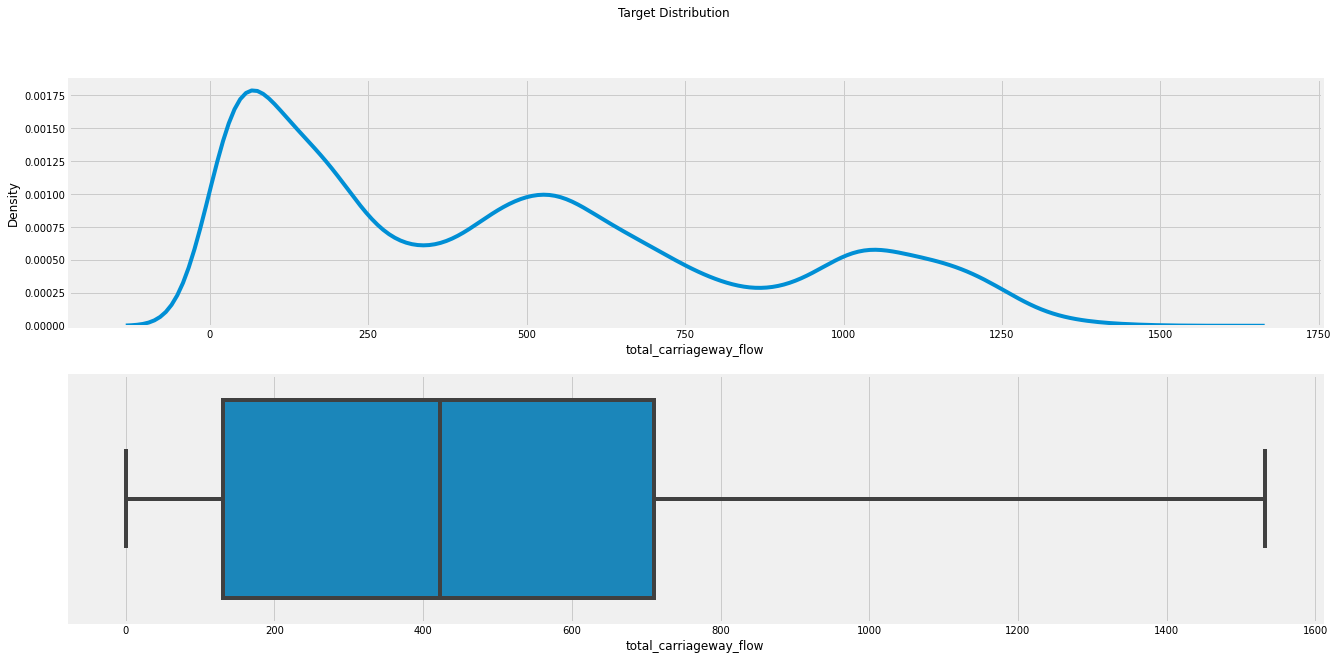

In [24]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
fig.suptitle('Target Distribution')

sns.kdeplot(london_df['total_carriageway_flow'], ax=ax[0])
sns.boxplot(london_df['total_carriageway_flow'], ax=ax[1])

plt.show();

`Notes`
- The distribution of the target is not normally distributed. We can see that the distribution has two spikes.

/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


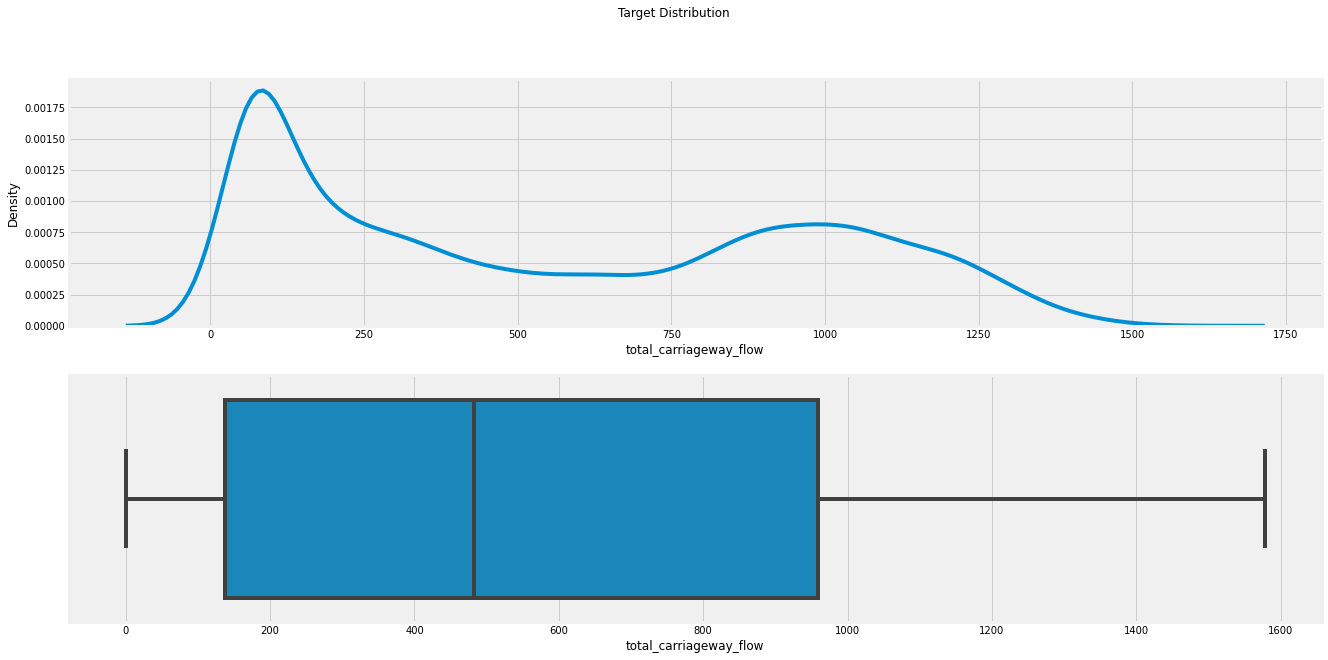

In [25]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
fig.suptitle('Target Distribution')

sns.kdeplot(bristol_df['total_carriageway_flow'], ax=ax[0])
sns.boxplot(bristol_df['total_carriageway_flow'], ax=ax[1])

plt.show();

`Notes`
- The distribution of the target is not normally distributed. We can see that the distribution has two spikes.

We can standardize it and use inverse transformation for training.

In [26]:
# fig, ax = plt.subplots(figsize=(20,10))

# # sns.lineplot(x=london_df.index, y=london_df['total_carriageway_flow'])
# sns.lineplot(x=london_df.set_index('datetime').index, y=london_df['total_carriageway_flow'])

# plt.title('Traffic V/S Time')

# plt.show()

`Notes`

There is a small gap in the data timeline, and it is not recommended to use rolling or lag features without taking this gap into account.

In [27]:
# fig, ax = plt.subplots(figsize=(20,10))

# # sns.lineplot(x=bristol_df.index, y=bristol_df['total_carriageway_flow'])
# sns.lineplot(x=bristol_df['datetime'], y=bristol_df['total_carriageway_flow'])

# plt.title('Traffic V/S Time')

# plt.show()

`Notes`

There is a small gap in the bristol data timeline, and it is not recommended to use rolling or lag features without taking this gap into account.

In [28]:
cols

['tfv_52m', 'tfv_521m_66m', 'tfv_661m_116m', 'tfv_116m']

In [29]:
def make_hist(df_, search=None):
    assert search != None, 'search needs a value not None'
    
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(df_[search], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in {search} ')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()


---LONDON---



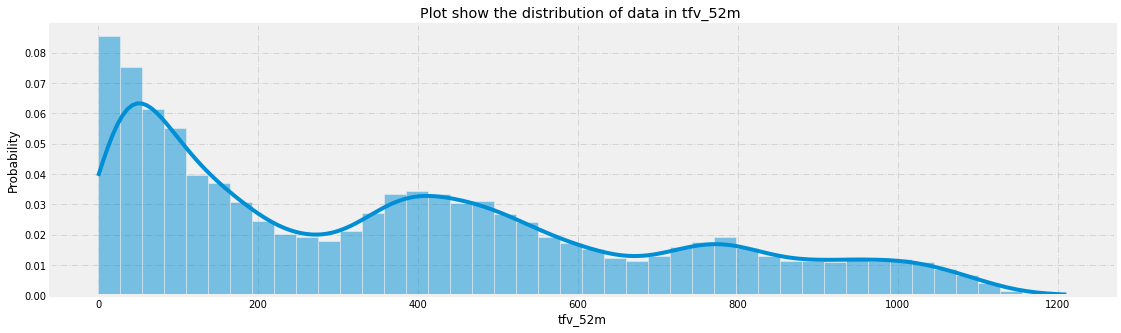

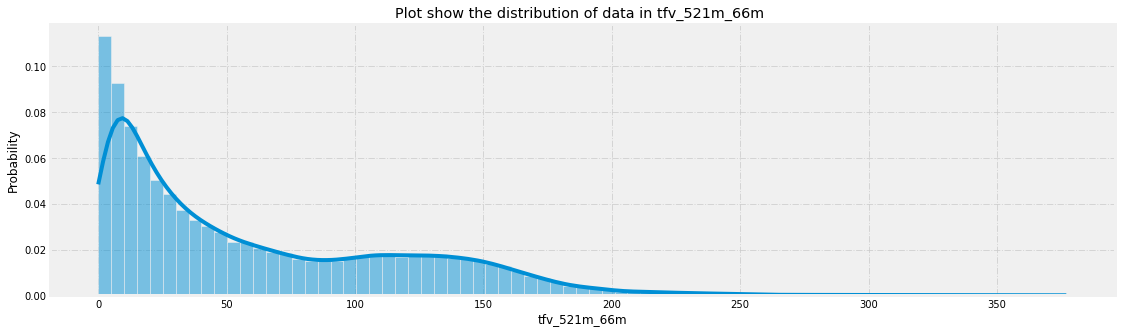

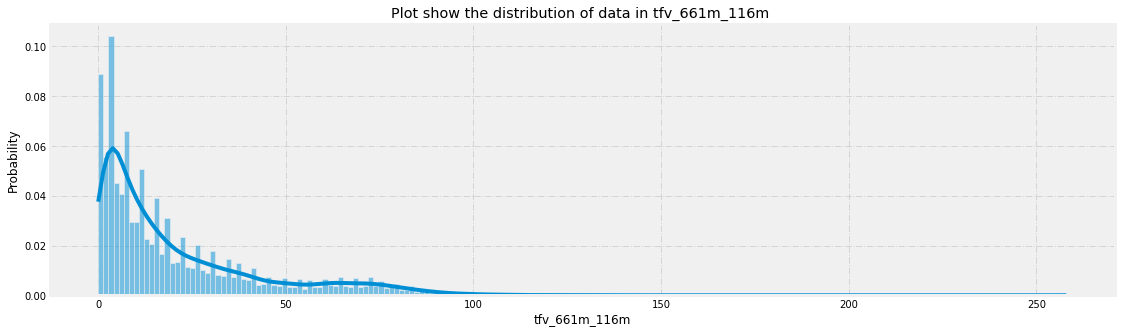

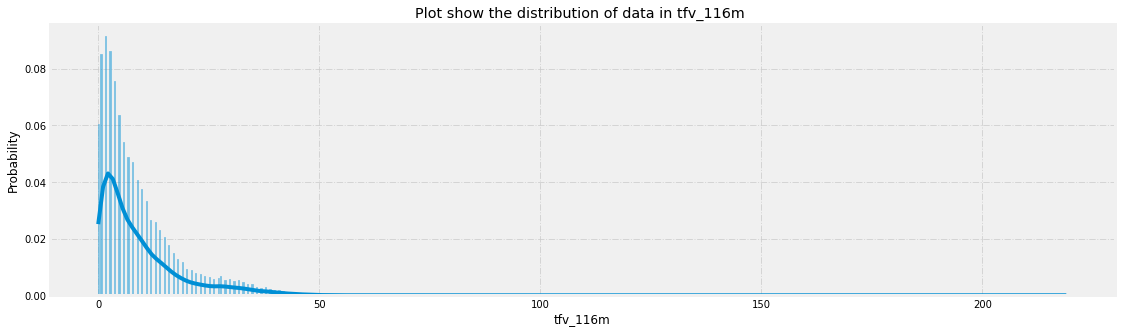

In [30]:
print('---LONDON---\n')
for i in cols:
    make_hist(london_df, i)



---BRISTOL---



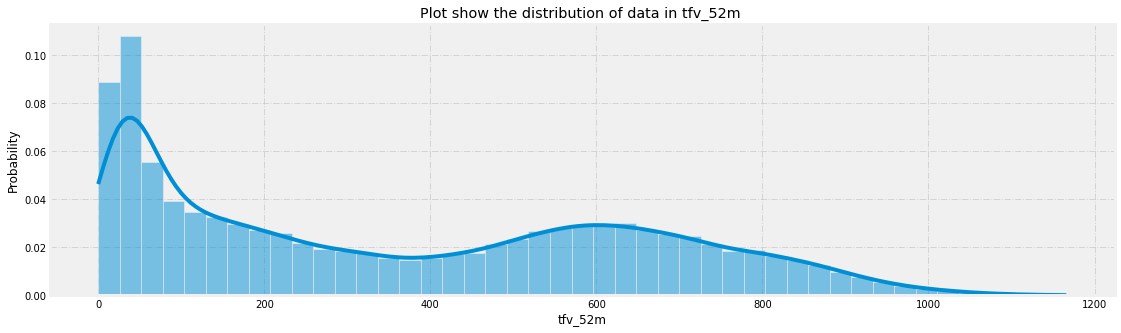

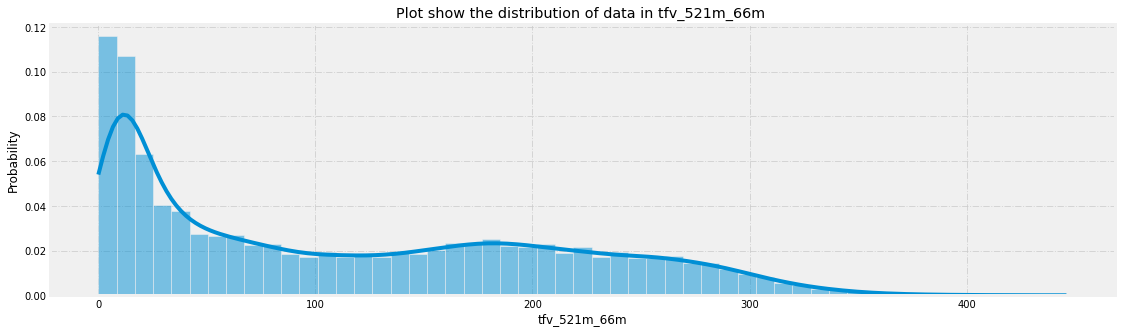

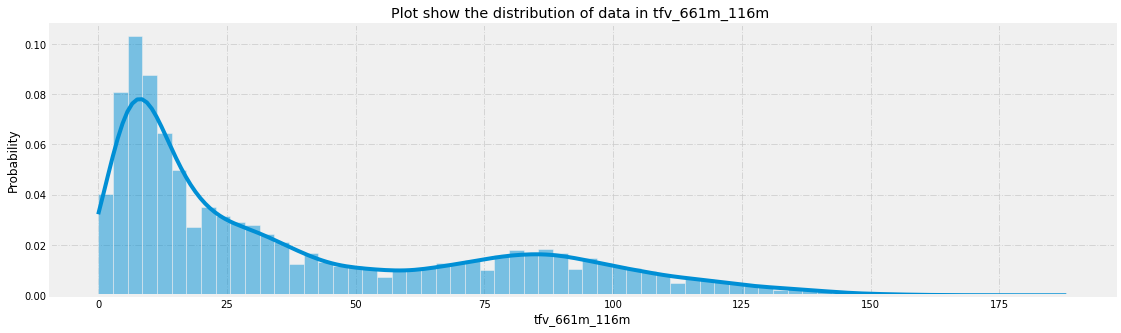

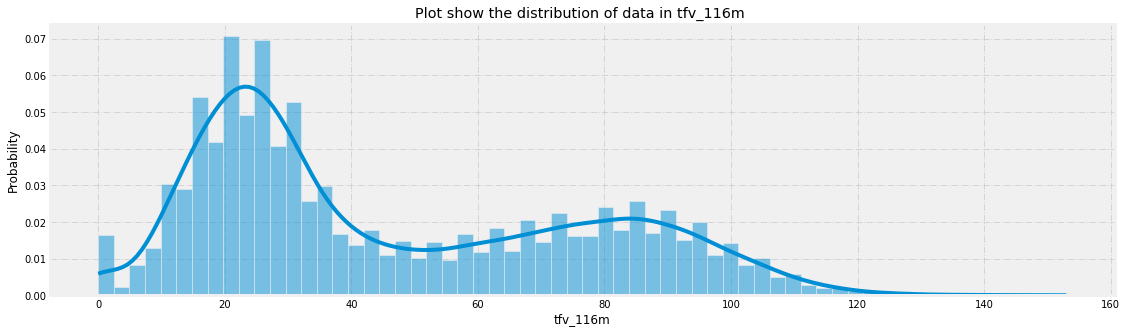

In [31]:
print('---BRISTOL---\n')
for i in cols:
    make_hist(bristol_df, i)


## Feature Engineering

#### Date-Time Feature

In [32]:
london_df['day'] = london_df.datetime.dt.day
london_df['month'] = london_df.datetime.dt.month_name()
london_df['year'] = london_df.datetime.dt.year
london_df['weekday'] = london_df.datetime.dt.day_name()
london_df['hour'] = london_df.datetime.dt.hour

london_df['week'] = london_df['datetime'].dt.isocalendar().week

In [33]:
bristol_df['day'] = bristol_df.datetime.dt.day
bristol_df['month'] = bristol_df.datetime.dt.month_name()
bristol_df['year'] = bristol_df.datetime.dt.year
bristol_df['weekday'] = bristol_df.datetime.dt.day_name()
bristol_df['hour'] = bristol_df.datetime.dt.hour
bristol_df['week'] = bristol_df['datetime'].dt.isocalendar().week

In [34]:
# Binning hour feature

def getDayTime(hour):
    
    if hour<4:
        return "Late Night"
    elif hour<8:
        return "Early Morning"
    elif hour<12:
        return "Morning"
    elif hour<16:
        return "Afternoon"
    elif hour<19:
        return "Evening"
    elif hour<24:
        return "Night"
    


In [35]:
london_df['day_time'] = london_df[['hour']].applymap(getDayTime)

london_df.head()

time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
0  00:14:00           4                   218.0    162.0          27.0   
1  00:29:00           4                   166.0    130.0          20.0   
2  00:44:00           4                   161.0    127.0          14.0   
3  00:59:00           4                   120.0     89.0          15.0   
4  01:14:00           4                   107.0     78.0          14.0   

   tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
0           19.0      10.0        88.08            15       199128901   
1           10.0       6.0        86.40            15       199128901   
2           11.0       9.0        89.38            15       199128901   
3            6.0      10.0        90.86            15       199128901   
4            9.0       6.0        94.62            15       199128901   

             datetime day_name  day     month  year weekday  hour  week  \
0 2019-02-01 00:14:00   Friday    1  February  2019  Friday     0     5   
1 2019-02-01 00:29:00   Friday    1  February  2019  Friday     0     5   
2 2019-02-01 00:44:00   Friday    1  February  2019  Friday     0     5   
3 2019-02-01 00:59:00   Friday    1  February  2019  Friday     0     5   
4 2019-02-01 01:14:00   Friday    1  February  2019  Friday     1     5   

     day_time  
0  Late Night  
1  Late Night  
2  Late Night  
3  Late Night  
4  Late Night

In [36]:
bristol_df['day_time'] = bristol_df[['hour']].applymap(getDayTime)

bristol_df.head()

time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
0  00:14:00           6                   175.0    129.0          19.0   
1  00:29:00           6                   140.0    110.0          16.0   
2  00:44:00           6                   115.0     85.0          15.0   
3  00:59:00           6                   114.0     89.0          12.0   
4  01:14:00           6                   102.0     70.0          16.0   

   tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
0            8.0      19.0        97.04            15       102003601   
1            2.0      12.0        97.67            15       102003601   
2            3.0      12.0        97.65            15       102003601   
3            5.0       8.0        96.23            15       102003601   
4            4.0      12.0        98.95            15       102003601   

             datetime day_name  day     month  year weekday  hour  week  \
0 2019-12-01 00:14:00   Sunday    1  December  2019  Sunday     0    48   
1 2019-12-01 00:29:00   Sunday    1  December  2019  Sunday     0    48   
2 2019-12-01 00:44:00   Sunday    1  December  2019  Sunday     0    48   
3 2019-12-01 00:59:00   Sunday    1  December  2019  Sunday     0    48   
4 2019-12-01 01:14:00   Sunday    1  December  2019  Sunday     1    48   

     day_time  
0  Late Night  
1  Late Night  
2  Late Night  
3  Late Night  
4  Late Night

In [37]:
# join time and day_time
london_df['time_daytime'] = london_df['time'] +' - '+ london_df['day_time']
bristol_df['time_daytime'] = bristol_df['time'] +' - '+ bristol_df['day_time']



## EDA

Why use voilin plot?

It depicts the shape of a data set through the use of a density plot, which is essentially a smoothed-over histogram. It describes the frequency with which a value appears in the data set.

reference: https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1

In [38]:
# set 2019 and 2020 of each city
london_df_2019 = london_df.query('year==2019')
london_df_2020 = london_df.query('year==2020')

bristol_df_2019 = bristol_df.query('year==2019')
bristol_df_2020 = bristol_df.query('year==2020')


In [39]:
def plot_violinplot(df_, x, y, title=None):
    plt.figure(figsize=(20,15))
    
    # Show each distribution with both violins and points
    sns.violinplot(x=df_[x], y=df_[y])
    sns.despine(left=True)
    plt.title(f'Traffic Volume by {x} | {title}')

    plt.show()
    

Month

Using Februay, march and june

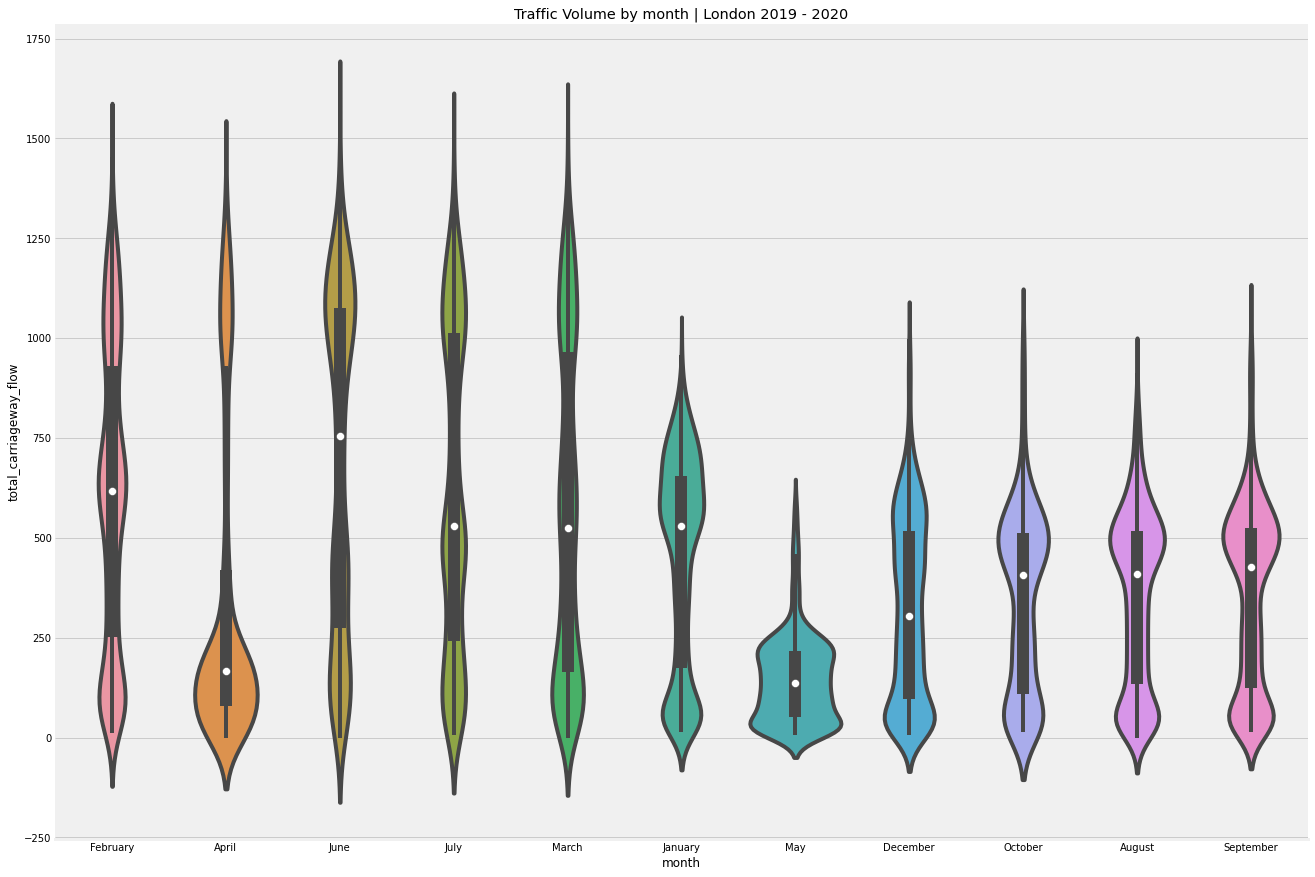

In [40]:
# for london 2019 + 2020
plot_violinplot(london_df, x='month', y='total_carriageway_flow', title='London 2019 - 2020')

`Notes`

This violin plot shows the relationship of month in a year. 

- The plot elements show the median weight for may is lower than for other months. 
- The month June's median is taller than the other months, next is to march.
- Comparing the February shape of the distribution (extremely skinny on each end and wide in the middle) to that of March and June, it indicates the weight of carriage flow are high around the median.



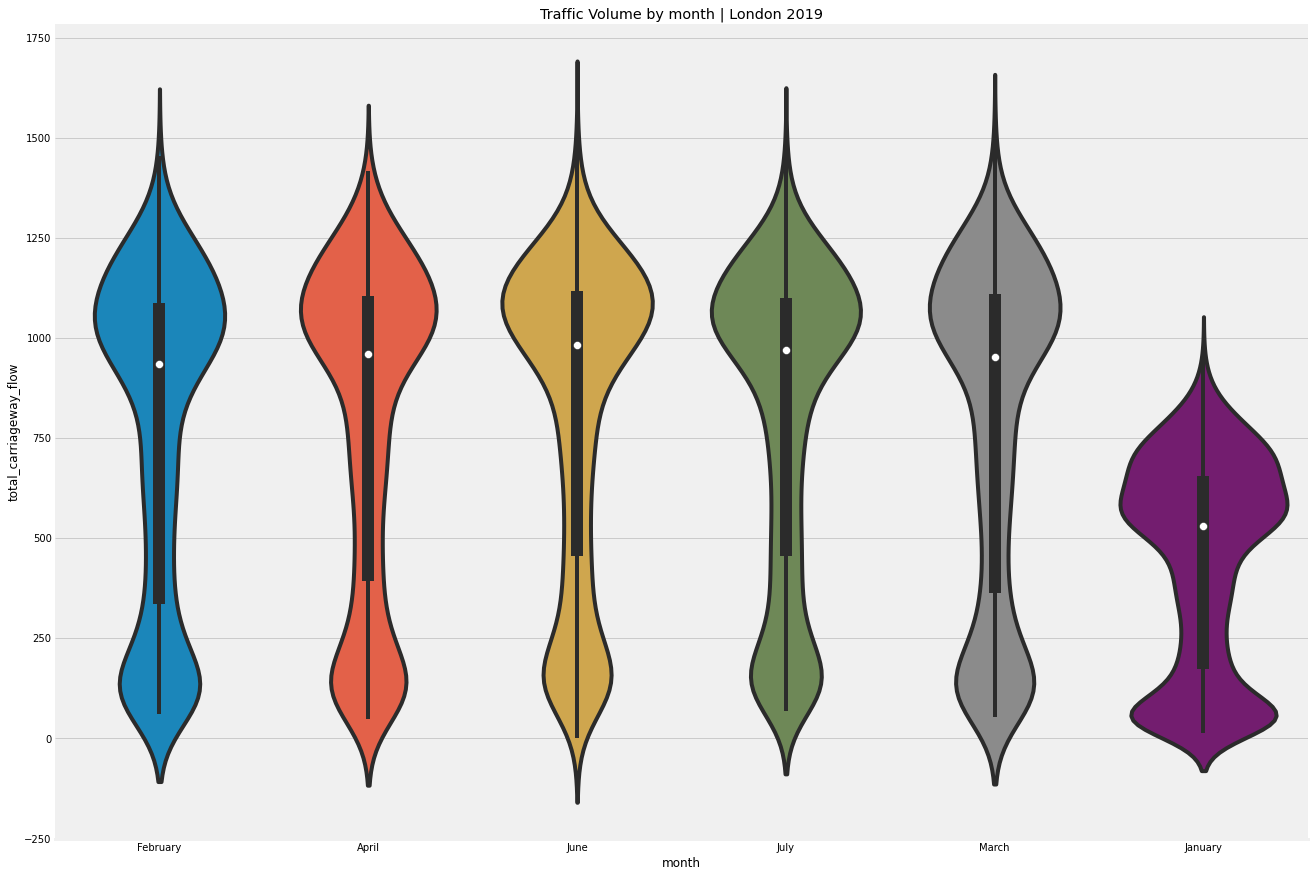

In [41]:
# for 2019
plot_violinplot(london_df_2019, x='month', y='total_carriageway_flow', title='London 2019')


`Notes`

This violin plot shows the relationship of month in a year. 

- The plot elements show the median weight for January is lower than the other months. 
- The month June's median is taller than the other months, next is to march.
- Comparing the shape of the distribution of all the month, it indicates the weight of carriage flow are high around the median.



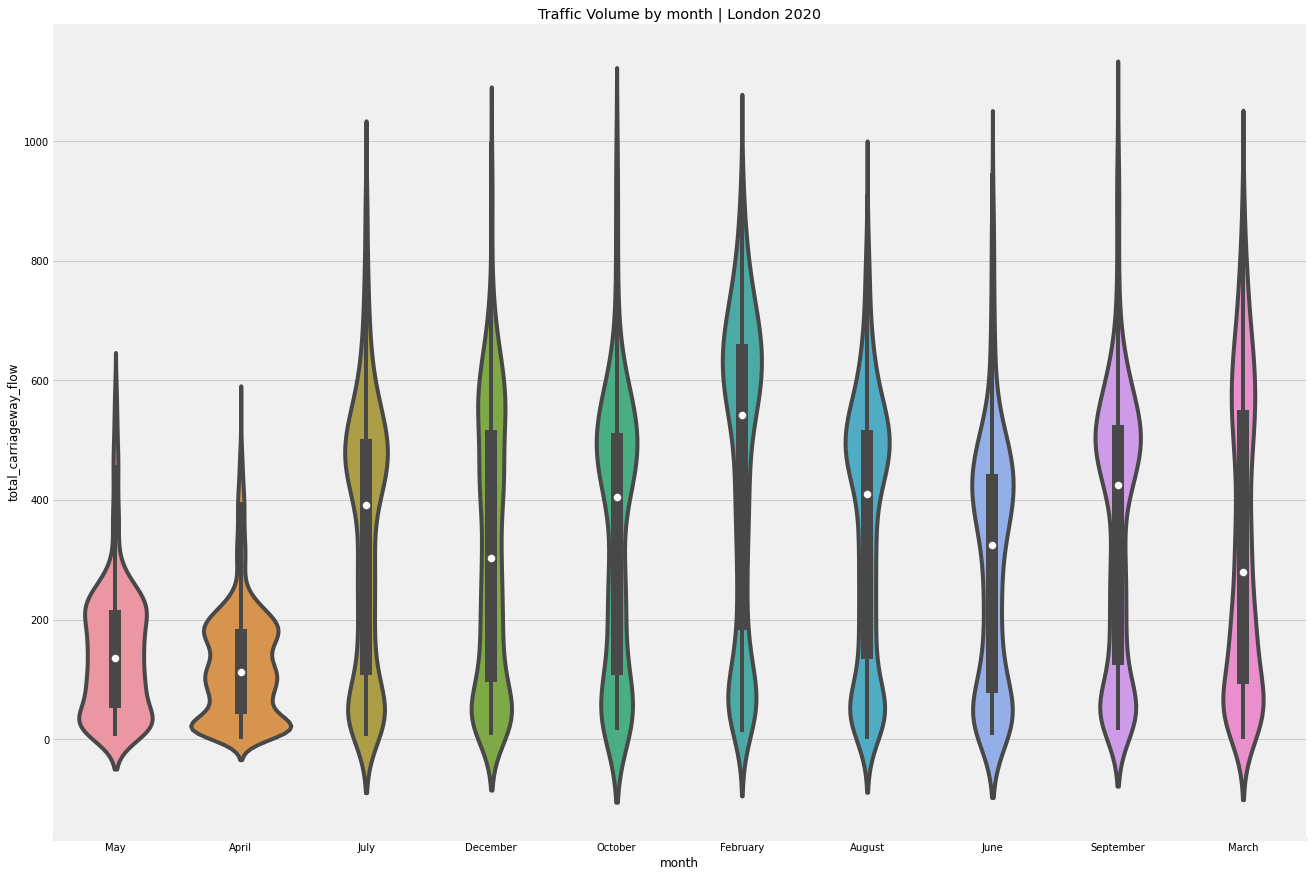

In [42]:
# for 2020
plot_violinplot(london_df_2020, x='month', y='total_carriageway_flow', title='London 2020')


`Notes`

This violin plot shows the relationship of month in a year. 

- The plot elements show the median weight for April is lower than for other months. 
- The month September's median is taller than the other months, next is to October.
- Comparing the May and April shape of the distribution to that of September, it indicates the weight of carriage flow are high around the median.



For bristol

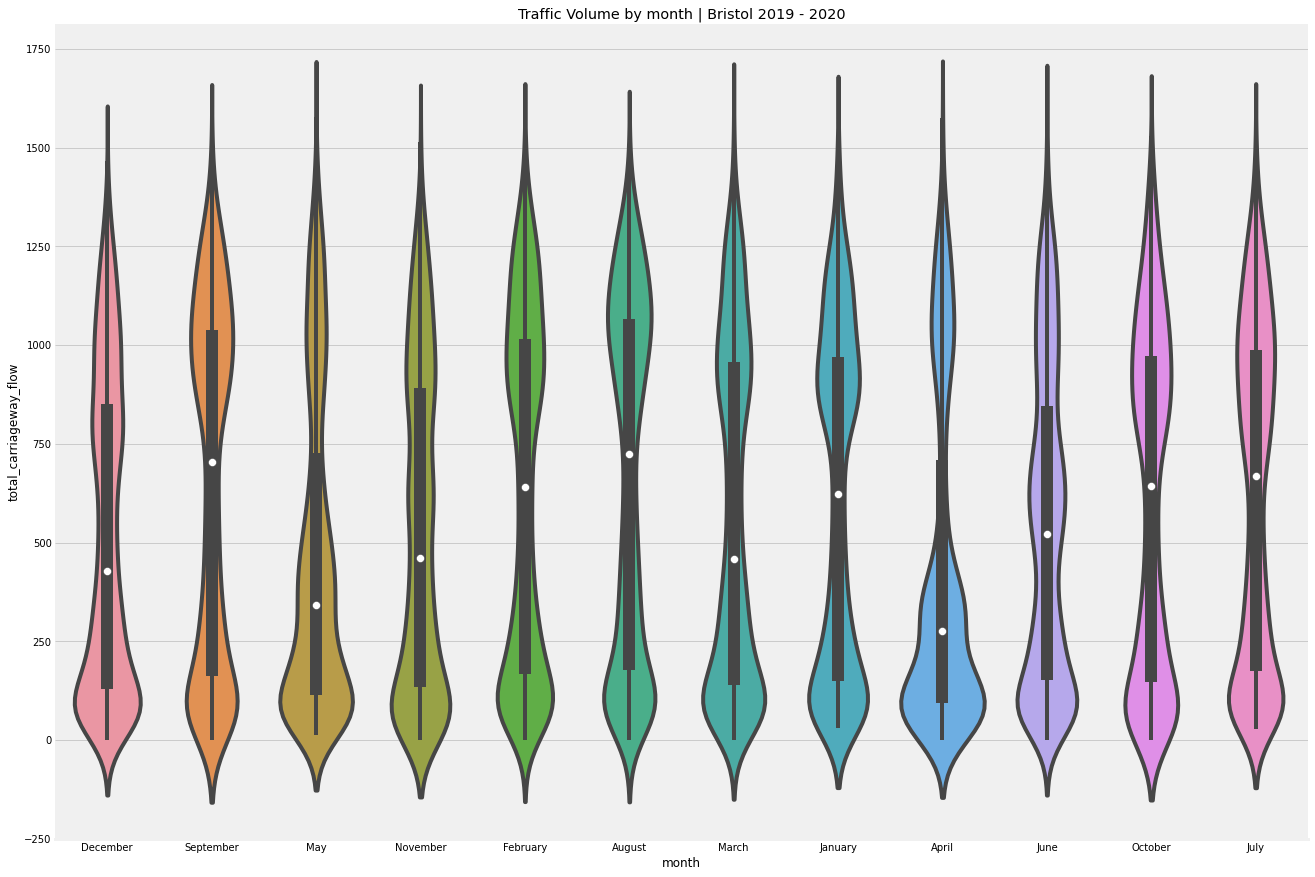

In [43]:
# for bristol 2019 + 2020
plot_violinplot(bristol_df, x='month', y='total_carriageway_flow', title='Bristol 2019 - 2020')

`Notes`

This violin plot shows the relationship of month in a year. 

- The plot elements show the median weight for December is lower than for other months. 
- The month  May and April's median is taller than the other months, next is to march.
- Comparing the September shape of the distribution to that of August and October, it indicates the weight of carriage flow are low around the median.



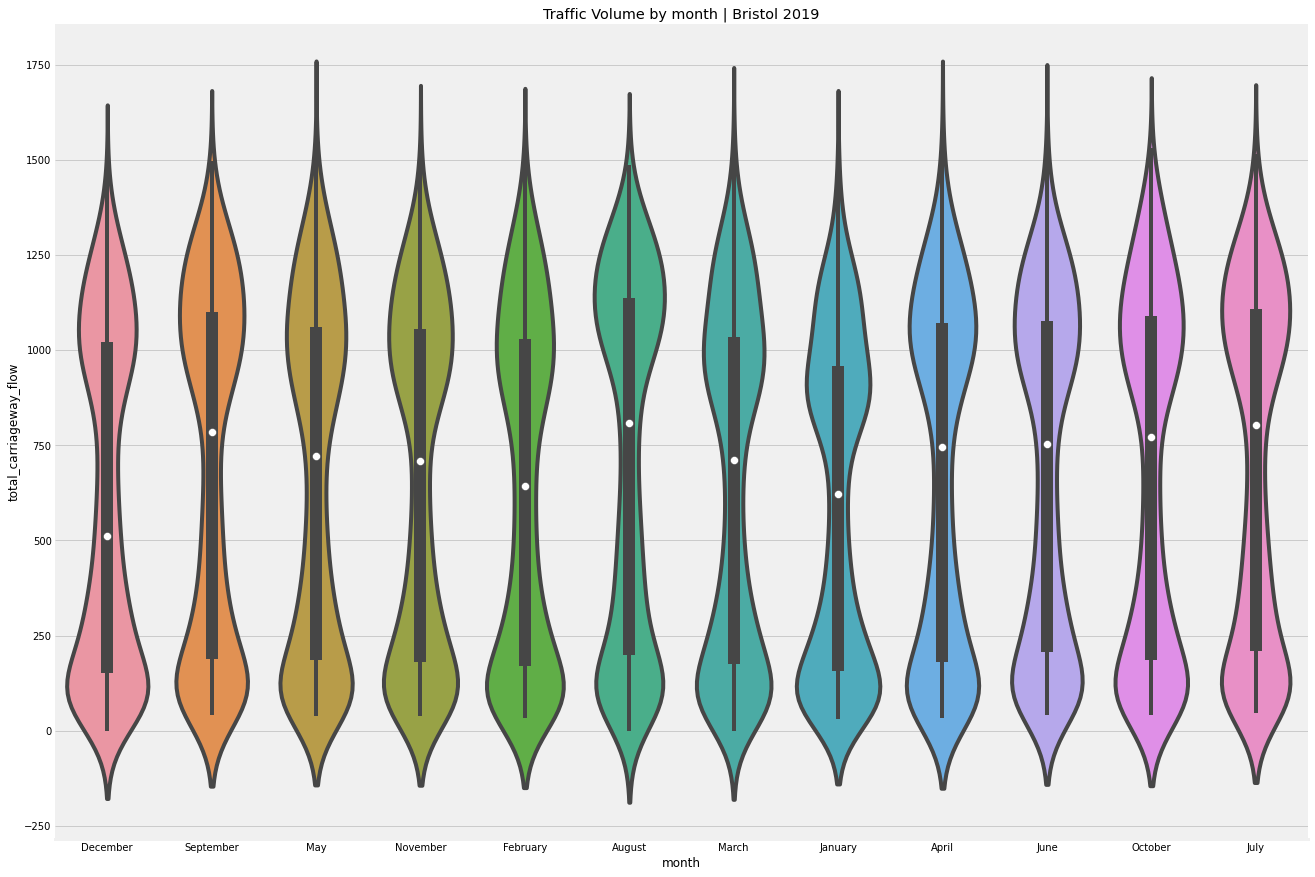

In [44]:
# for 2019
plot_violinplot(bristol_df_2019, x='month', y='total_carriageway_flow', title='Bristol 2019')


`Notes`

This violin plot shows the relationship of month in a year. 

- The month  May and April's median is taller than the other months, next is to march.
- The plot elements show the median weight for December is lower than for other months. 
- Comparing the January shape of the distribution to that of December and January, it indicates the weight of carriage flow are high around the median.



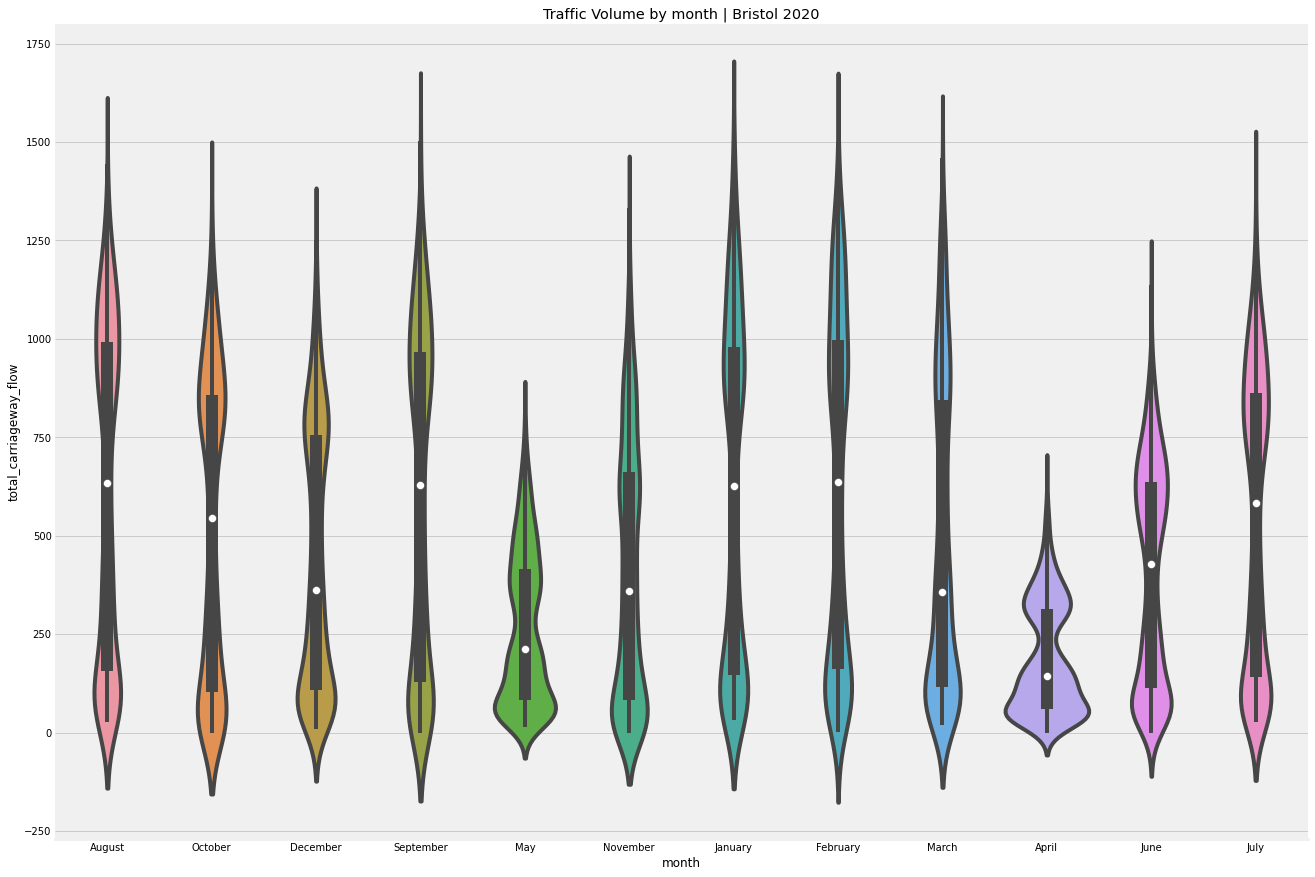

In [45]:
# for 2020
plot_violinplot(bristol_df_2020, x='month', y='total_carriageway_flow', title='Bristol 2020')


`Notes`

This violin plot shows the relationship of month in a year. 

- The plot elements show the median weight for April is lower than the other months. 
- The month  January and February's median is taller than the other months, next is to September.
- Comparing the April shape of the distribution to that of May and December, it indicates the weight of carriage flow are low around the median.



Years

for london


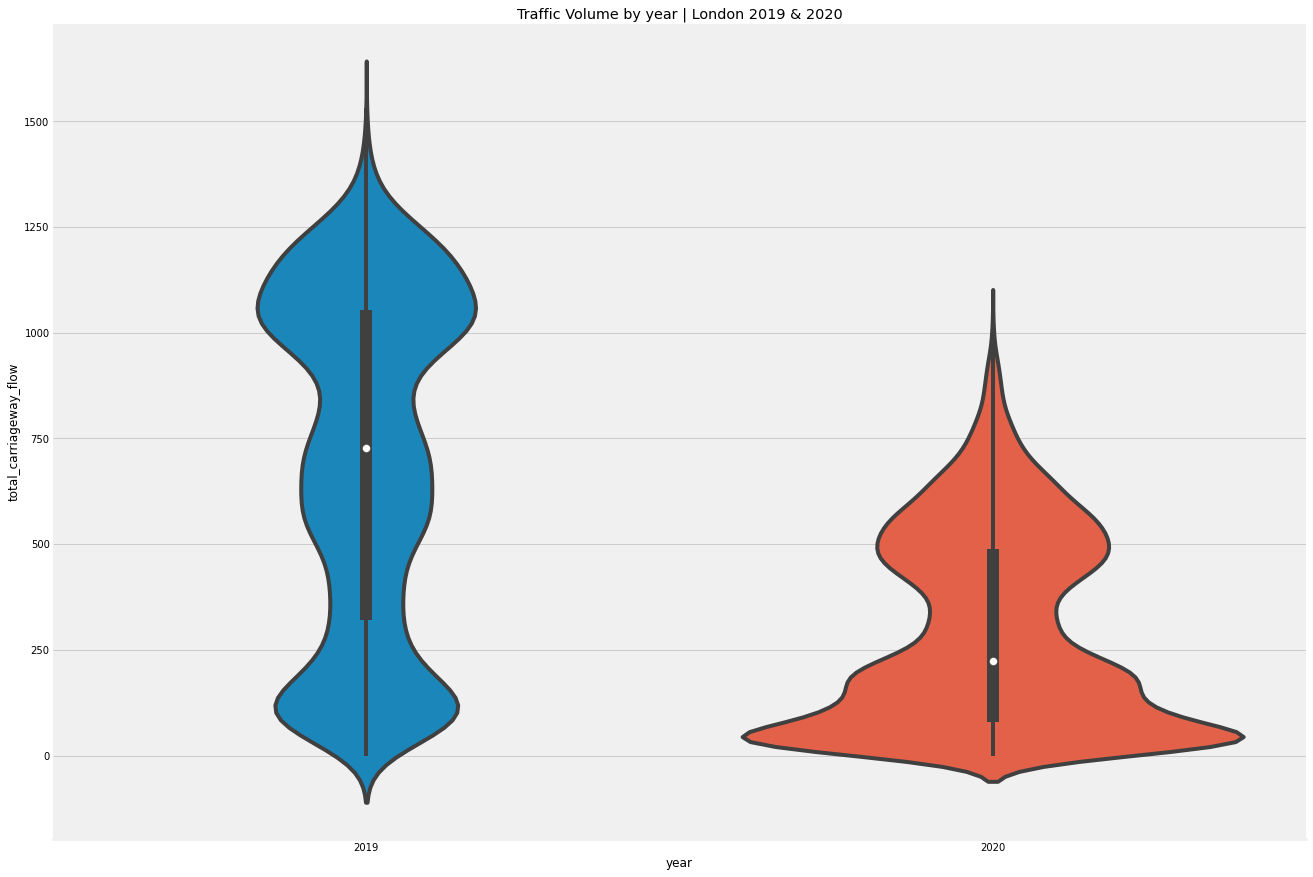

In [46]:
# for bristol 2019 + 2020
plot_violinplot(london_df, x='year', y='total_carriageway_flow', title='London 2019 & 2020')

`Notes`

This violin plot shows the relationship of month in a year. 

- The plot elements show the median weight for 2020 is lower than 2019. 
- Comparing the 2019 shape of the distribution (extremely skinny on each end and wide in the middle) to that of 2020, it indicates the weight of carriage flow are high around the median.



For bristol

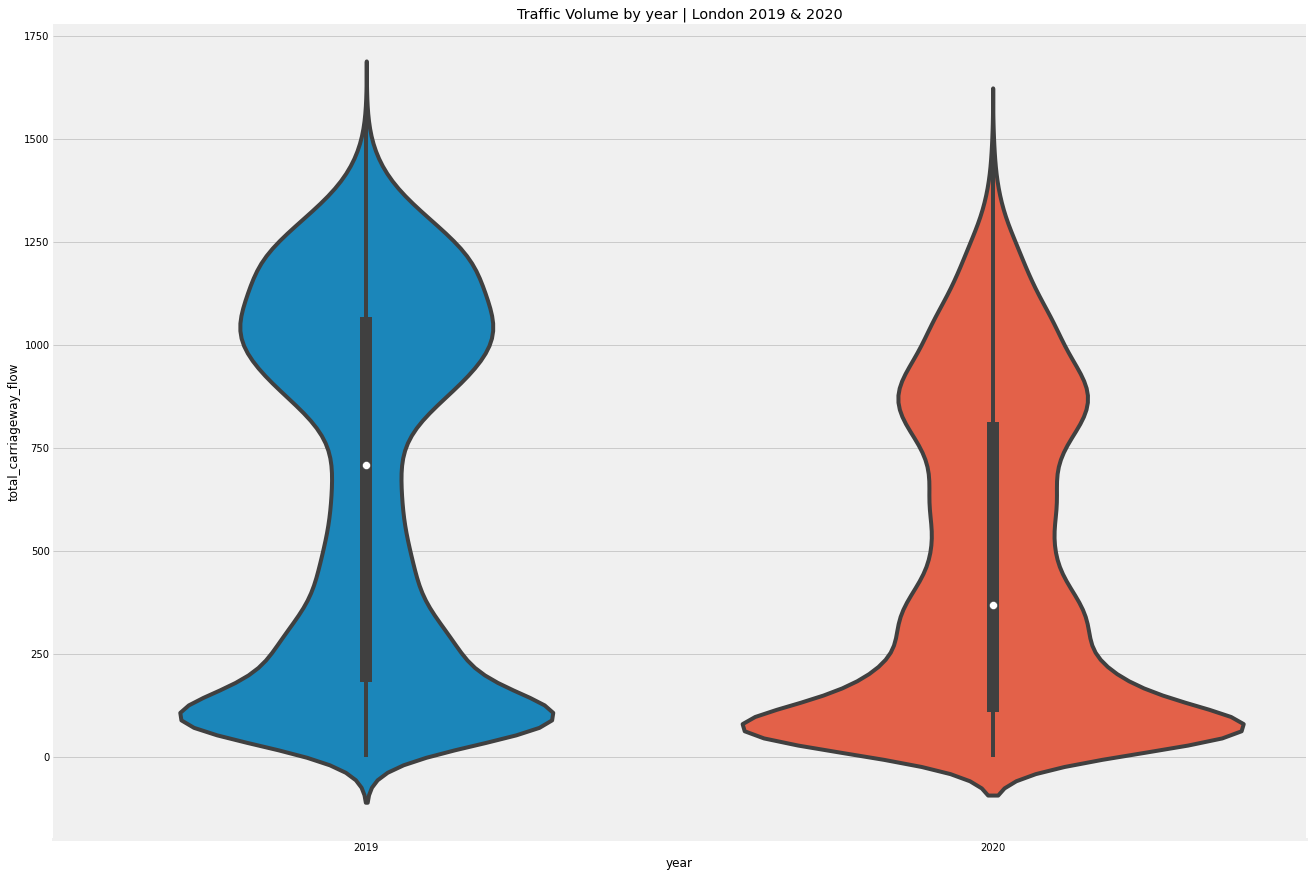

In [47]:
# for bristol 2019 + 2020
plot_violinplot(bristol_df, x='year', y='total_carriageway_flow', title='London 2019 & 2020')

`Notes`

This violin plot shows the relationship of month in a year. 

- The plot elements show the median weight for 2020 is lower than 2019. 

- Comparing the 2019 shape of the distribution (extremely skinny on each end and wide in the middle) to that of 2020, it indicates the weight of carriage flow are high around the median.

- The upper spike of the distribution is getting thinner from 2019 to 2020.


### day_time

for london

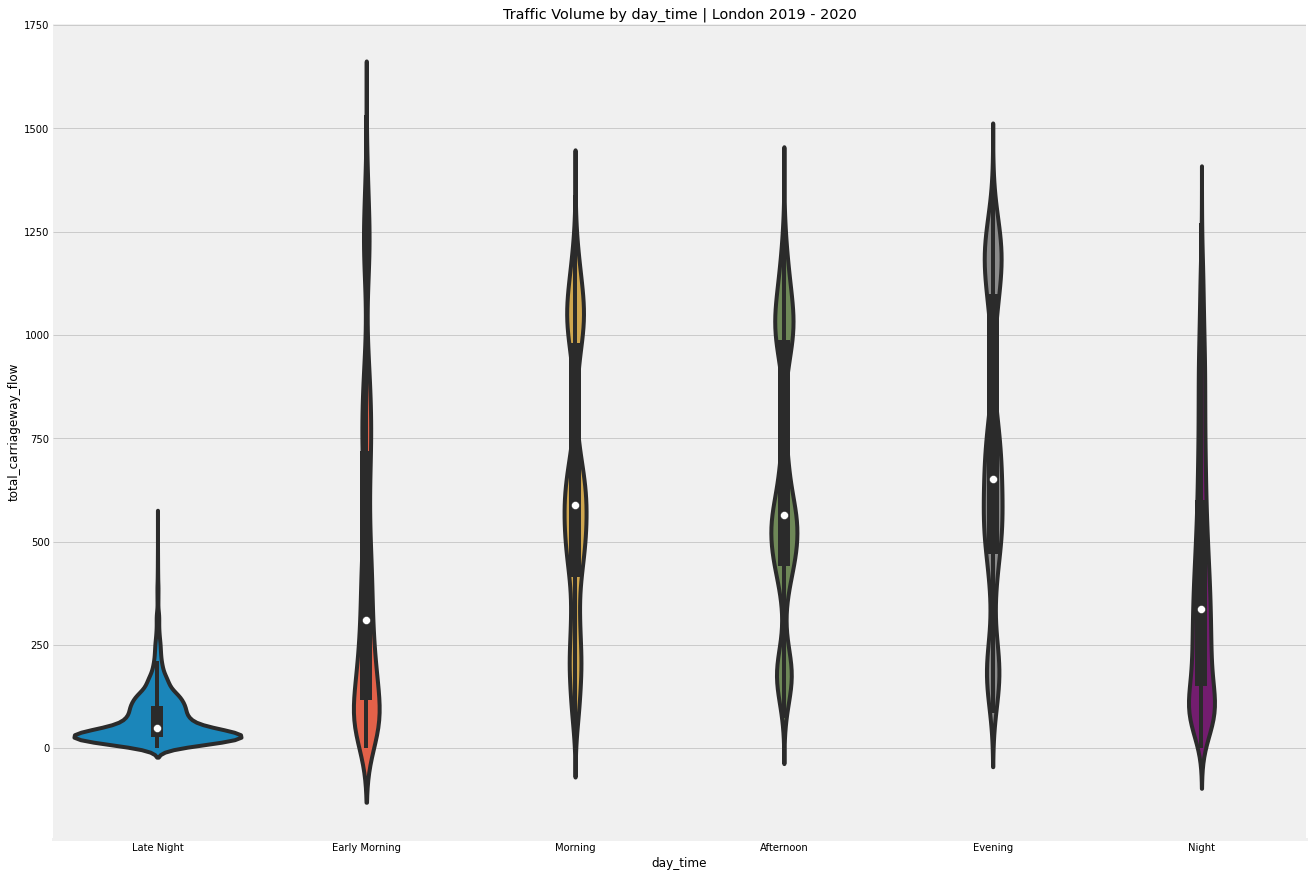

In [48]:
# for london 2019 + 2020
plot_violinplot(london_df, x='day_time', y='total_carriageway_flow', title='London 2019 - 2020')

`Note`

- We can see a nice trend here: traffic volume increases from early morning to peak hours (afternoon and evening) and then decreases.
- For late at night the traffic volume decrease.

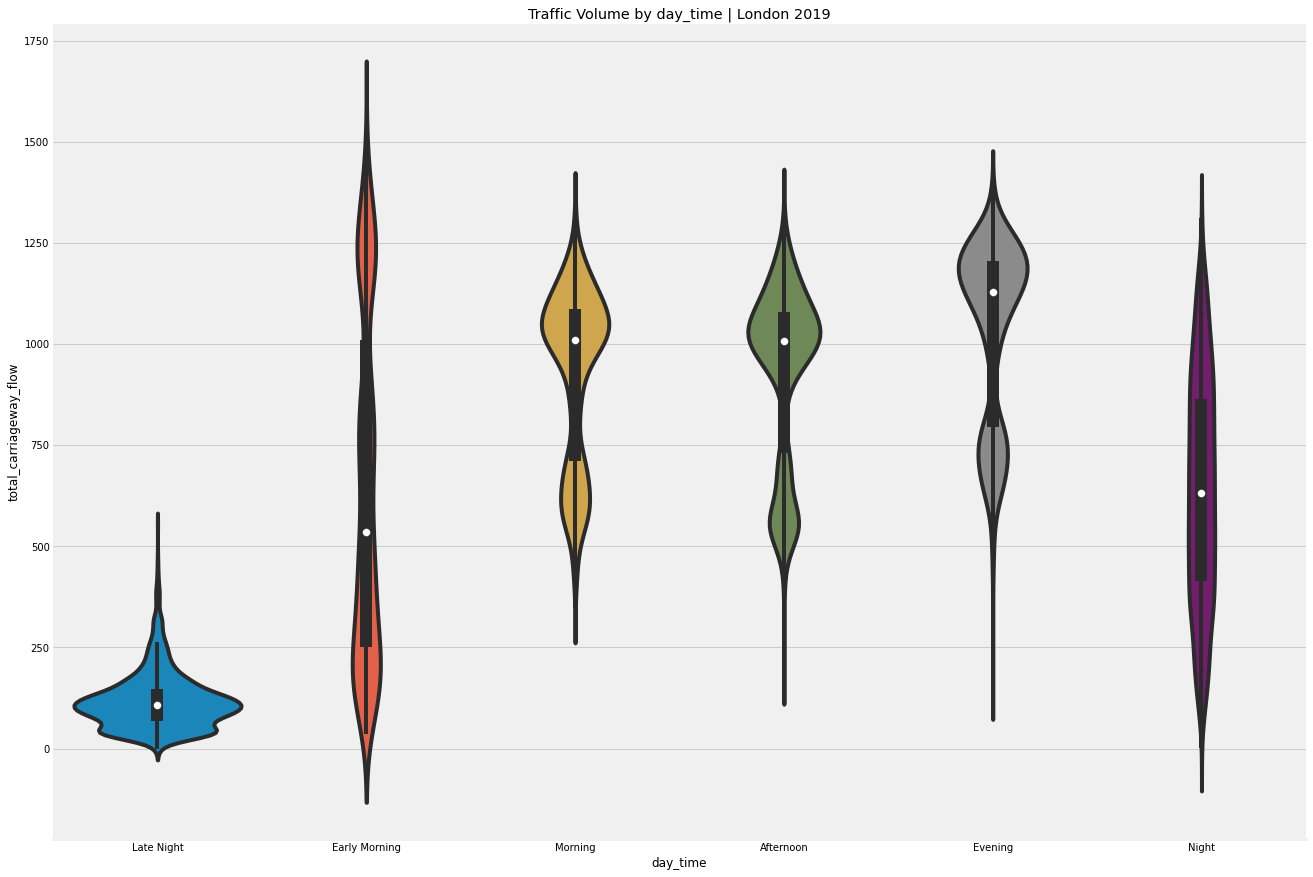

In [49]:
# for 2019
plot_violinplot(london_df_2019, x='day_time', y='total_carriageway_flow', title='London 2019')


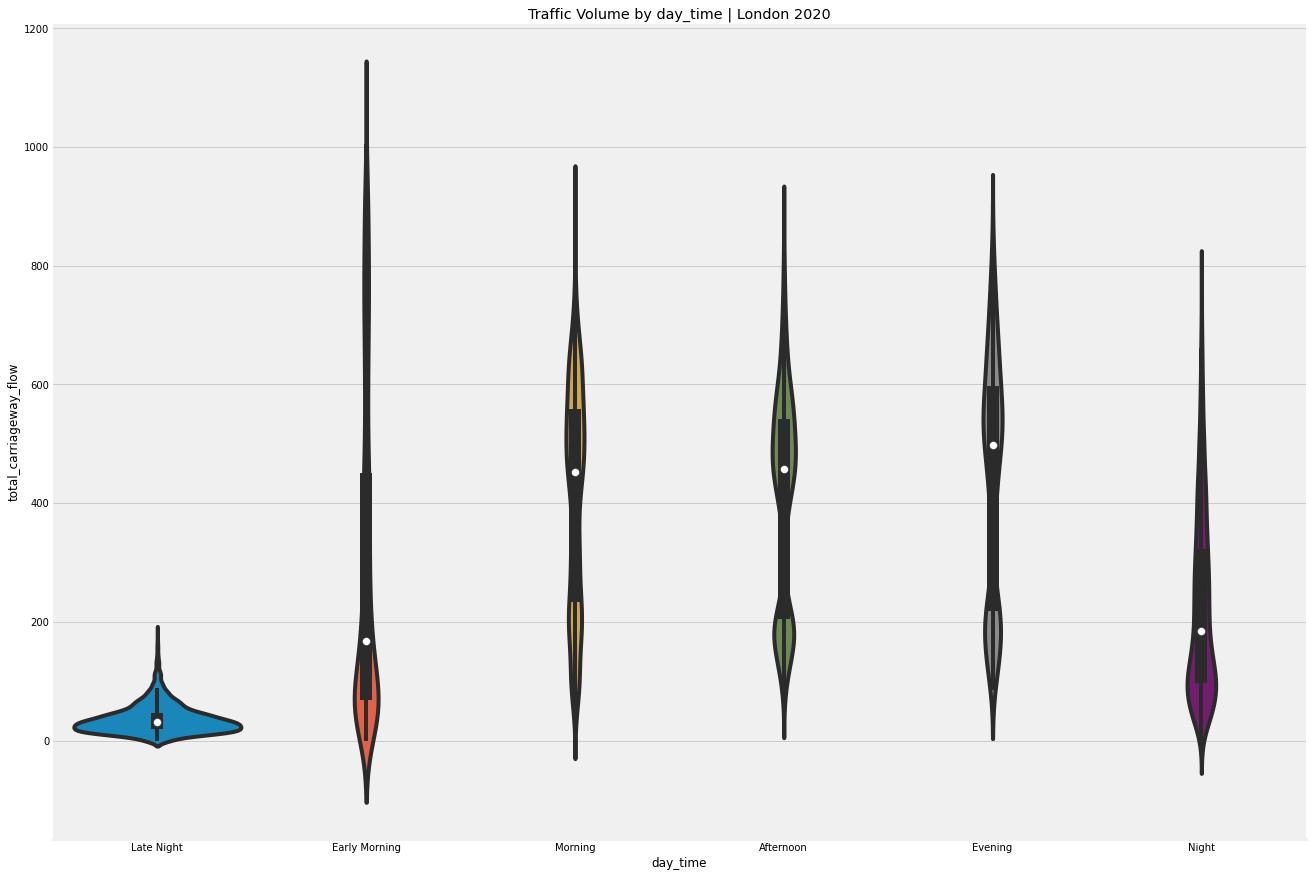

In [50]:
# for 2020
plot_violinplot(london_df_2020, x='day_time', y='total_carriageway_flow', title='London 2020')


For bristol

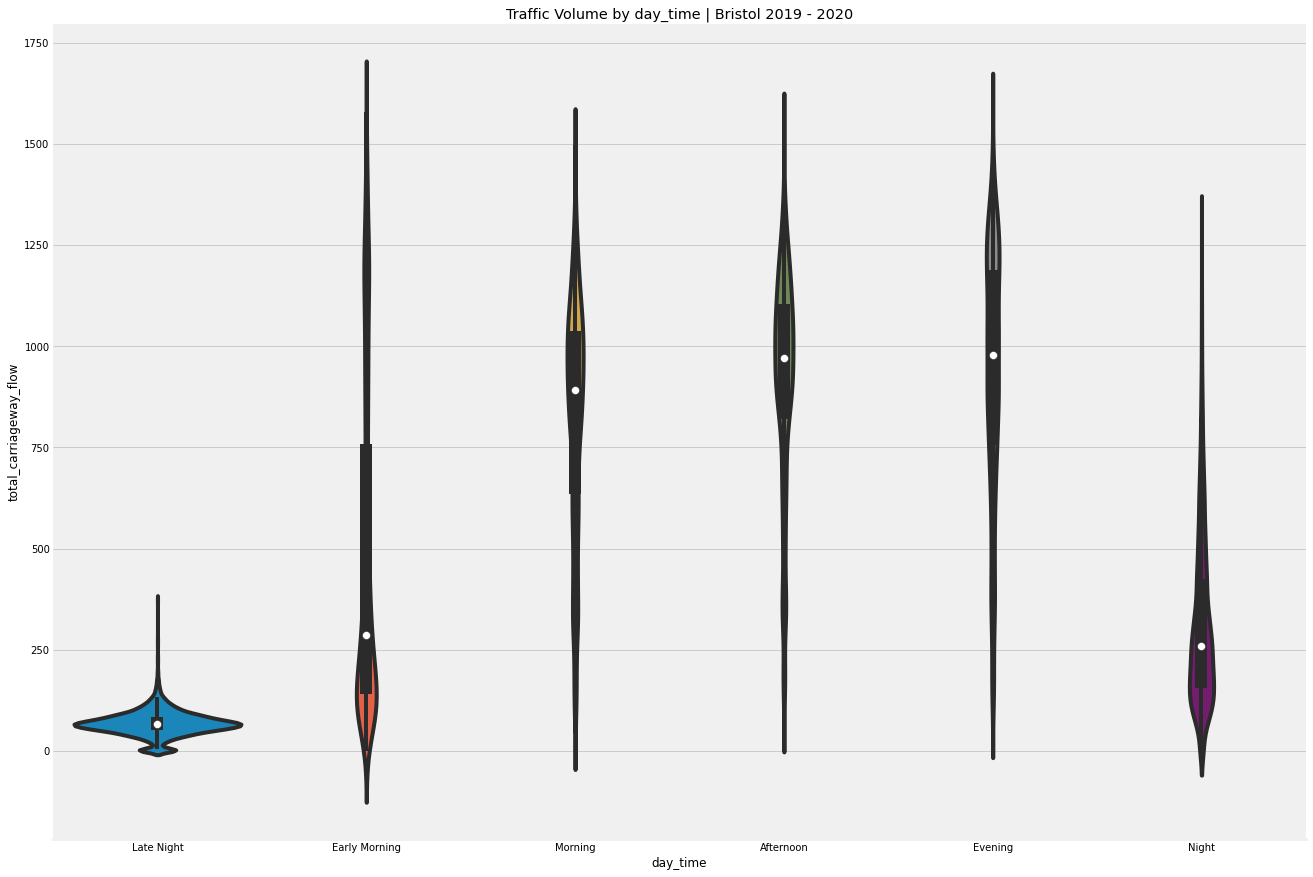

In [51]:
# for bristol 2019 + 2020
plot_violinplot(bristol_df, x='day_time', y='total_carriageway_flow', title='Bristol 2019 - 2020')

`Note`

- There is a nice trend here: The total carriage flow rises from early morning to peak hours (afternoon and evening) and then falls which is a bit similar to that of London.

- Similar to London, we can see that the violin plots show that there is more movement late at night in Bristol.- 

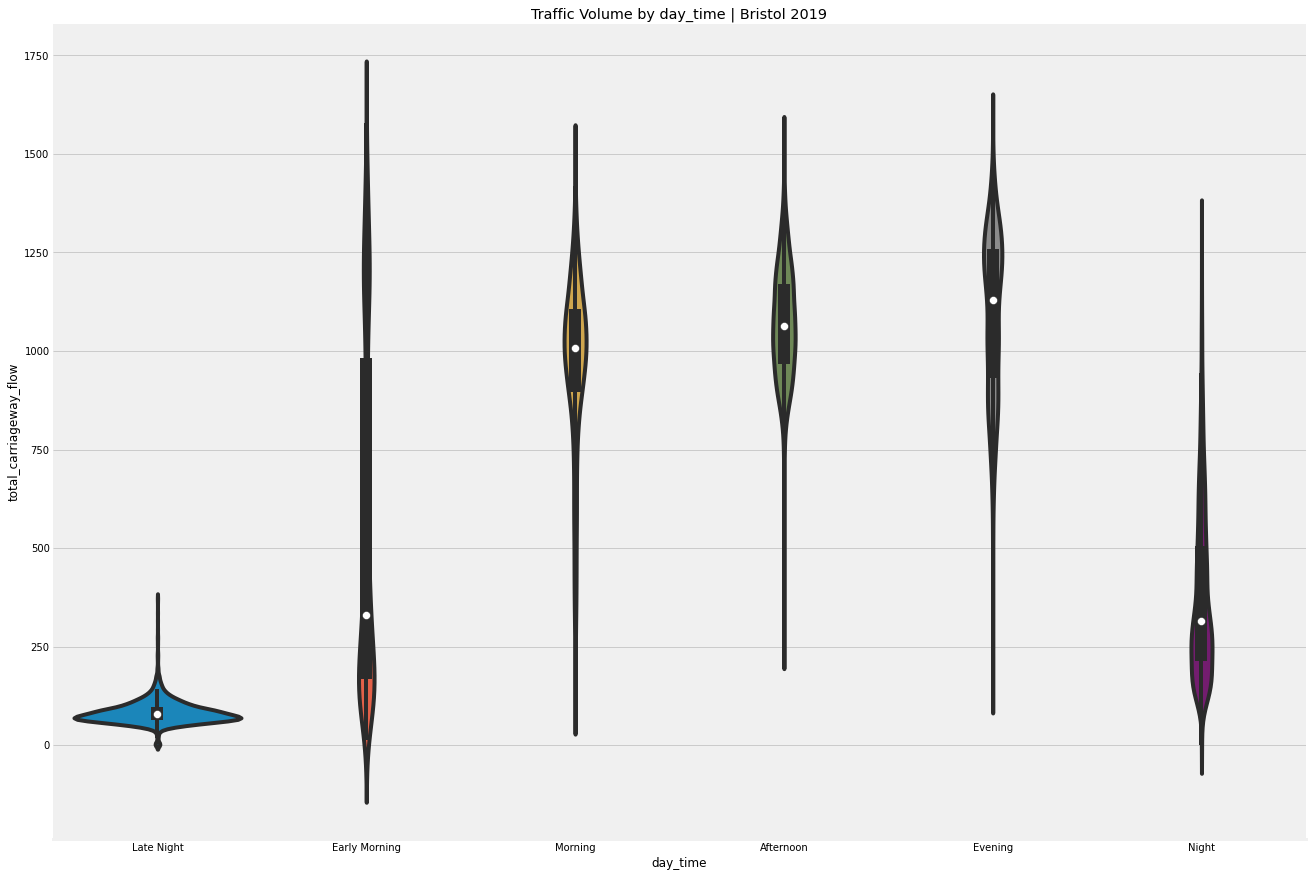

In [52]:
# for 2019
plot_violinplot(bristol_df_2019, x='day_time', y='total_carriageway_flow', title='Bristol 2019')


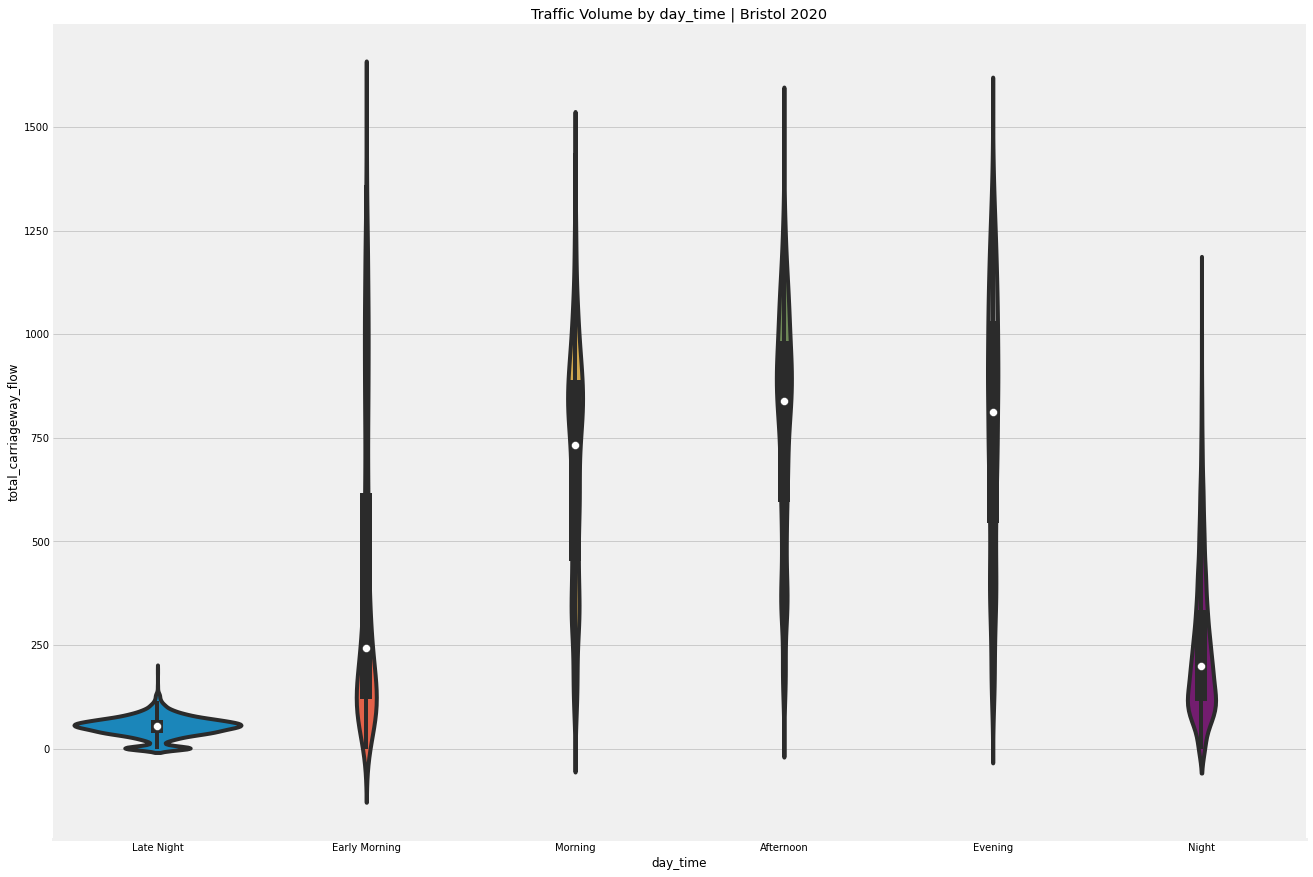

In [53]:
# for 2020
plot_violinplot(bristol_df_2020, x='day_time', y='total_carriageway_flow', title='Bristol 2020')


Total Carriage Flow 

In [54]:
def plot_lineplot(df_, x, y, title=None):
    temp = df_.groupby([x])[y].mean()

    plt.figure(figsize=(20,8))

    sns.lineplot(y=temp.values, x=temp.index)

    plt.title(f'Mean of {y} V/S {x} | {title}')

    plt.show()

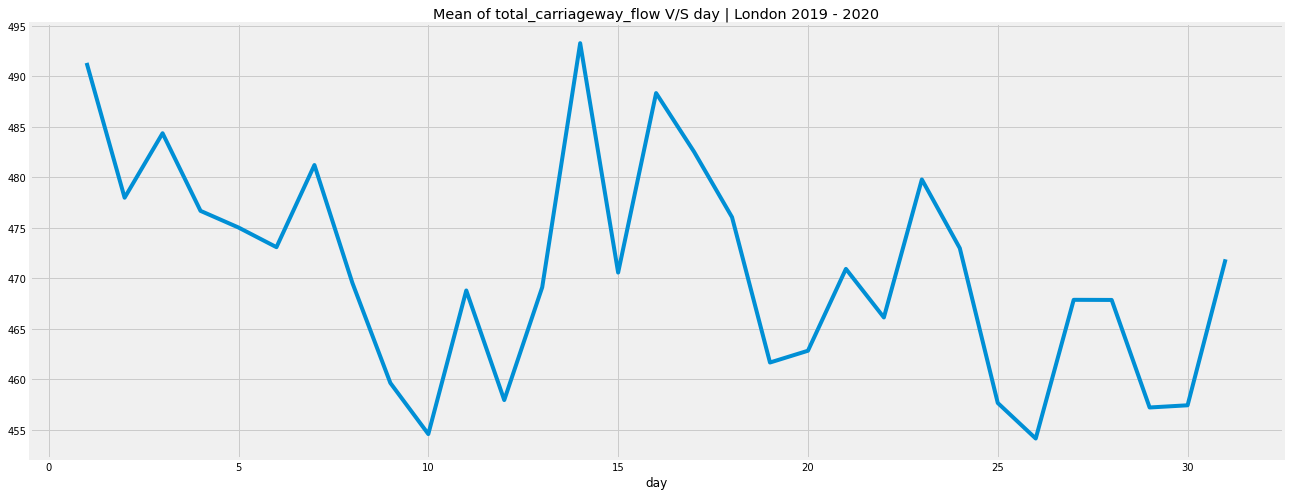

In [55]:
plot_lineplot(london_df, 'day', 'total_carriageway_flow', 'London 2019 - 2020')

`Note`

- For london, we can see a drastic decrease in traffic-volume from 23-26.

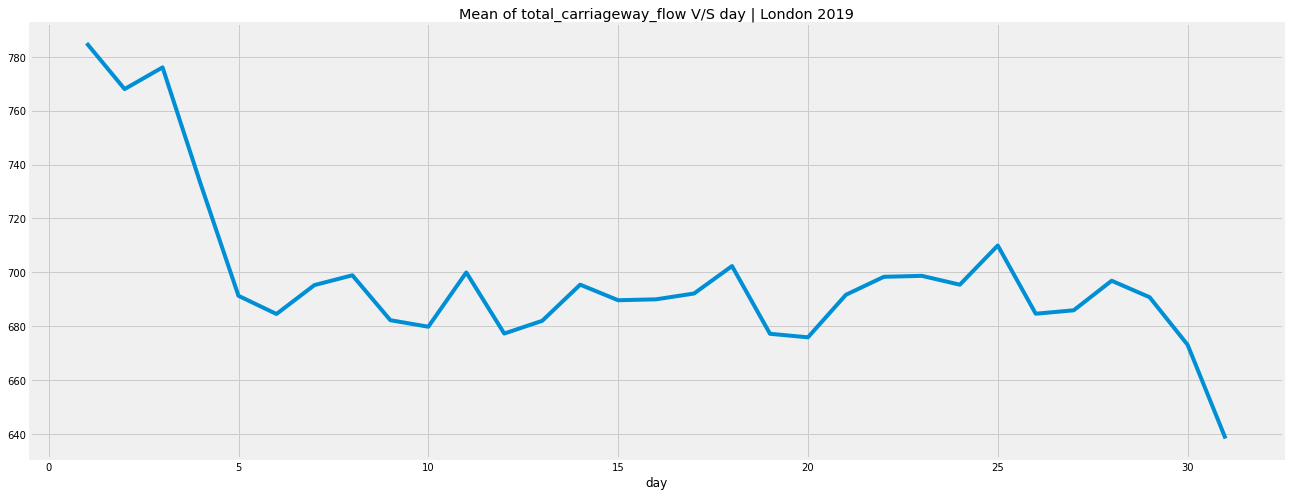

In [56]:
plot_lineplot(london_df_2019, 'day', 'total_carriageway_flow', 'London 2019')

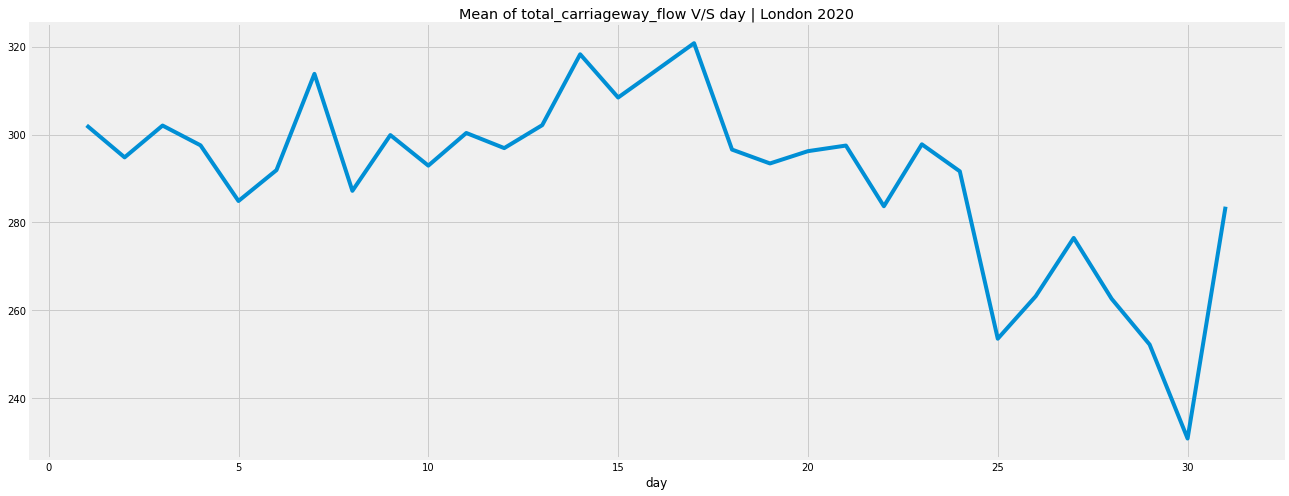

In [57]:
plot_lineplot(london_df_2020, 'day', 'total_carriageway_flow', 'London 2020')

#### For bristol

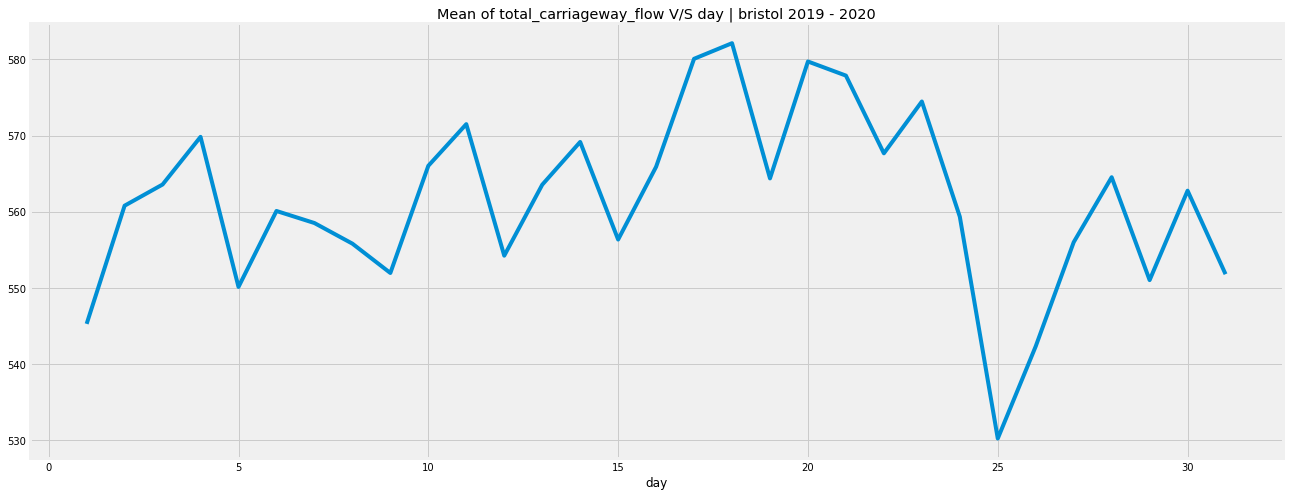

In [58]:
plot_lineplot(bristol_df, 'day', 'total_carriageway_flow', 'bristol 2019 - 2020')

`Note`

- For bristol, we can see a drastic decrease in traffic-volume from 23-25

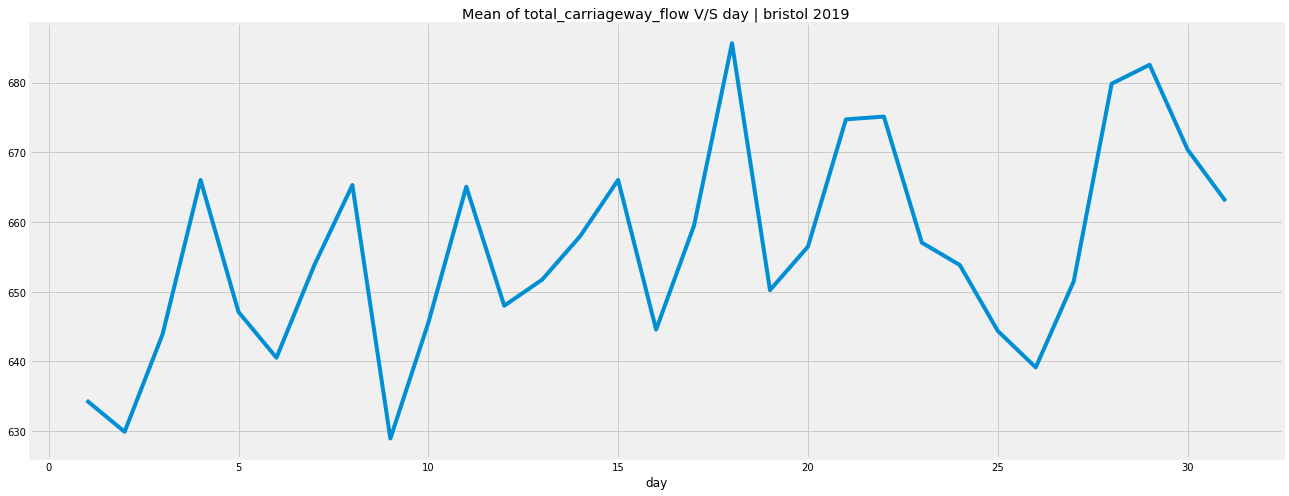

In [59]:
plot_lineplot(bristol_df_2019, 'day', 'total_carriageway_flow', 'bristol 2019')

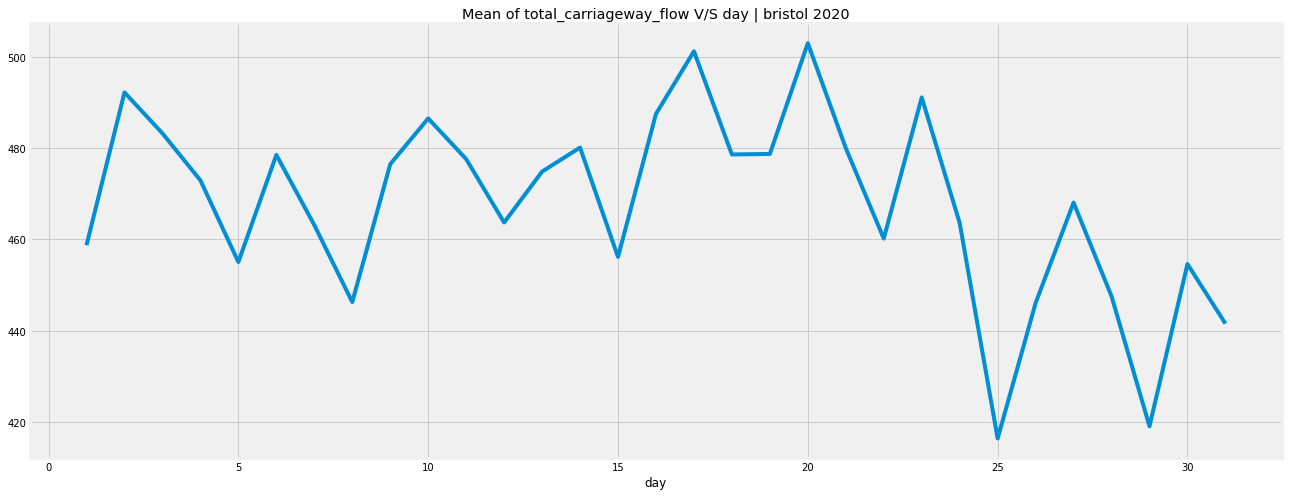

In [60]:
plot_lineplot(bristol_df_2020, 'day', 'total_carriageway_flow', 'bristol 2020')

#### Compare both.

<AxesSubplot:xlabel='day'>

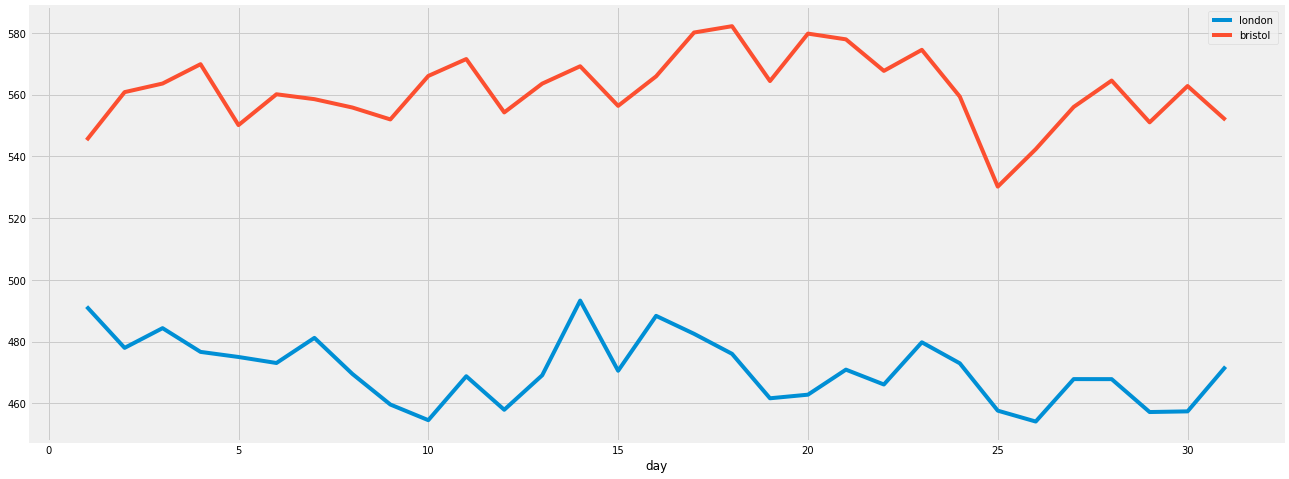

In [61]:
l_temp = london_df.groupby(['day'])['total_carriageway_flow'].mean()
b_temp = bristol_df.groupby(['day'])['total_carriageway_flow'].mean()

plt.figure(figsize=(20,8))

sns.lineplot(y=l_temp.values, x=l_temp.index, label='london')
sns.lineplot(y=b_temp.values, x=b_temp.index, label='bristol')

`Notes`

- Bristol's total carriage flow is higher than that of London, which is above 500.

#### Vehicles

Here we only used a few data point **(1000)** to help get insights.

For london

In [62]:
vehicles_type = ['datetime','tfv_52m',
       'tfv_521m_66m', 'tfv_661m_116m', 'tfv_116m']#,'speed_value']

In [63]:
inverse_header=['datetime', ' Total Flow vehicles less than 5.2m',
 ' Total Flow vehicles 5.21m - 6.6m',
 ' Total Flow vehicles 6.61m - 11.6m',
 ' Total Flow vehicles above 11.6m']

In [64]:
london_vehicles_df = london_df[vehicles_type][:1000]#.set_index('datetime')
london_vehicles_df_2019 = london_df_2019[vehicles_type][:1000]#.set_index('datetime')
london_vehicles_df_2020 = london_df_2020[vehicles_type][:1000]#.set_index('datetime')

london_vehicles_df.columns=inverse_header
london_vehicles_df_2019.columns=inverse_header
london_vehicles_df_2020.columns=inverse_header

Text(0.5, 1.0, 'Vehicle Flows')

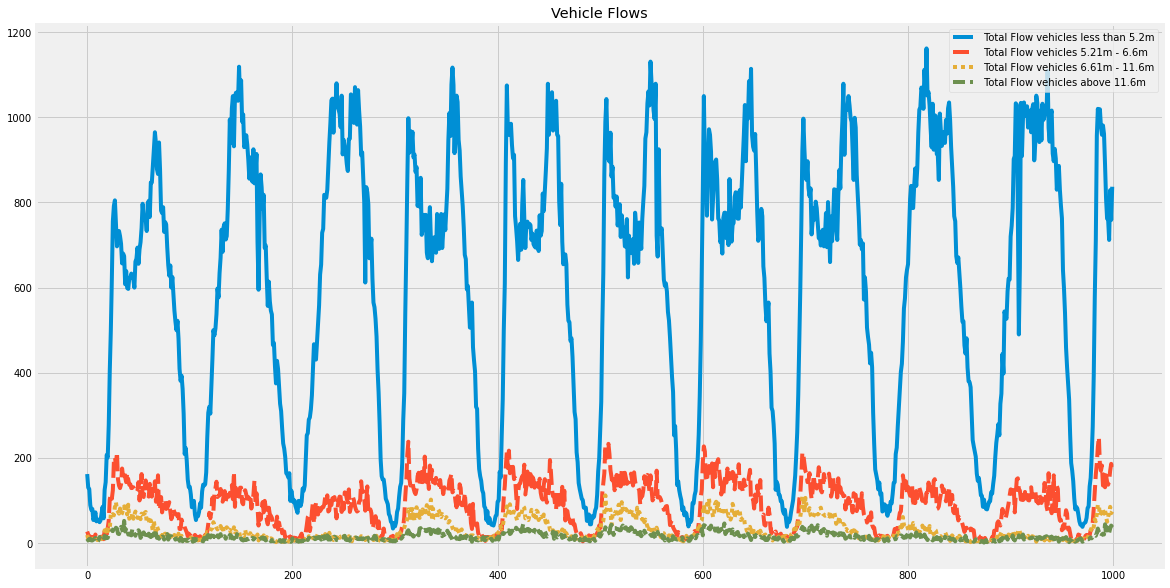

In [65]:
plt.figure(figsize=(18,10))
sns.lineplot( data=london_vehicles_df)
plt.title('Vehicle Flows')

`Notes`

- We can see a visible upward flow, which means that many vehicles shorter than 5.2m were detected.
- Vehicles above than 11.6m were detected less frequently.
- The number of detected vehicles between 5.21m and 6.6m was higher but similar to those between 6.61m and 11.6m.


Text(0.5, 1.0, 'Vehicle Flows')

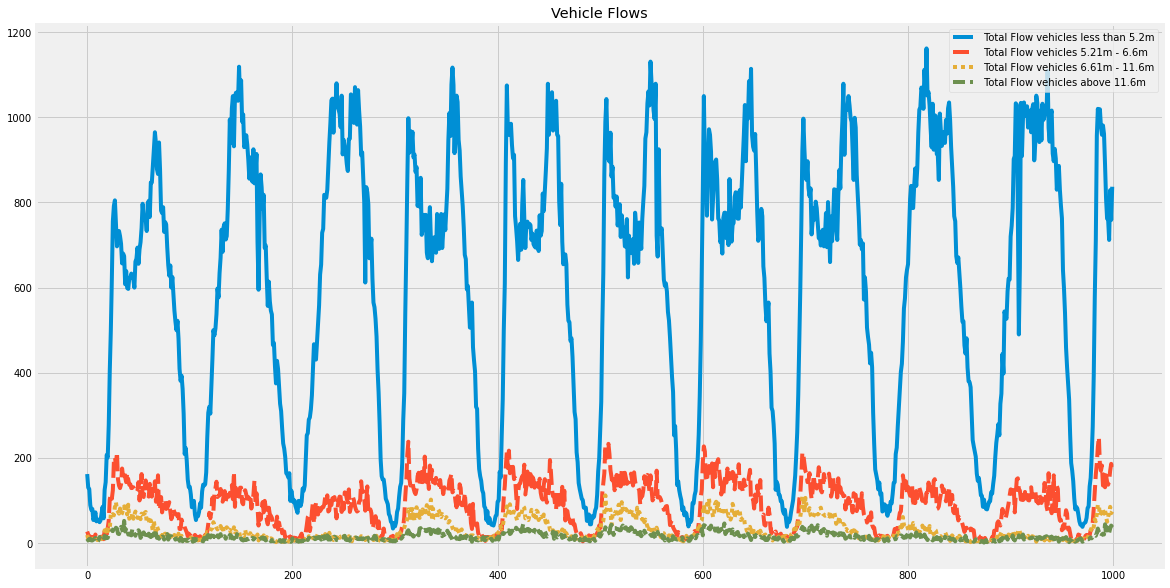

In [66]:
# 2019
plt.figure(figsize=(18,10))
sns.lineplot( data=london_vehicles_df_2019)
plt.title('Vehicle Flows')

Text(0.5, 1.0, 'Vehicle Flows')

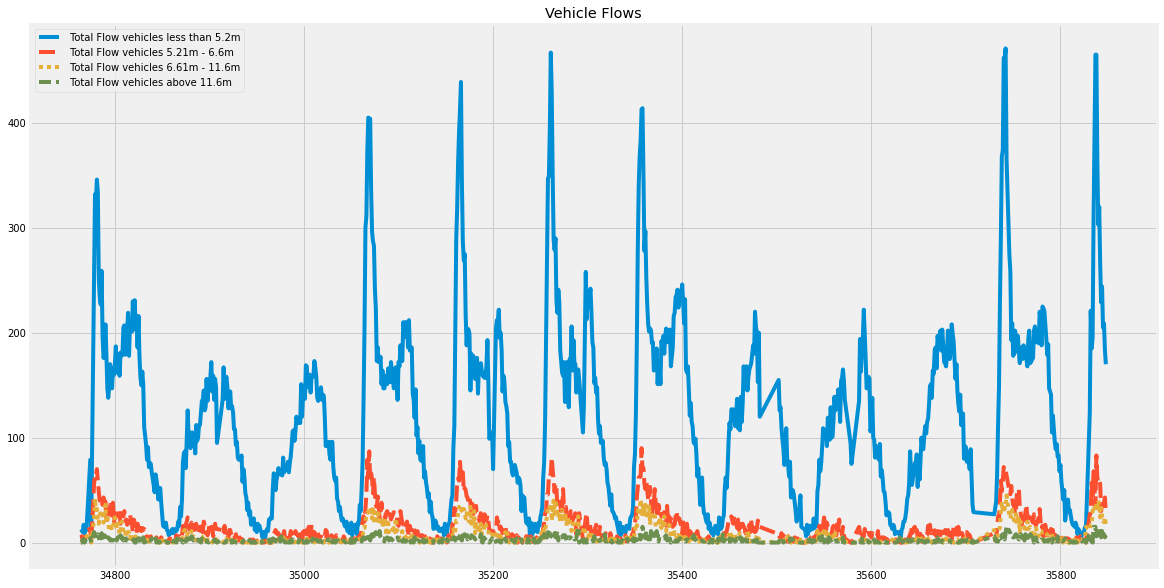

In [67]:
# 2020
plt.figure(figsize=(18,10))
sns.lineplot( data=london_vehicles_df_2020)
plt.title('Vehicle Flows')

In [68]:
# unpivots the DataFrame from wide format to long format
london_melt_vechicle_df = pd.melt(london_vehicles_df,
                                  id_vars =['datetime']).drop('datetime',axis=1)

london_melt_vechicle_df_2019 = pd.melt(london_vehicles_df_2019,
                                  id_vars =['datetime']).drop('datetime',axis=1)

london_melt_vechicle_df_2020 = pd.melt(london_vehicles_df_2020,
                                  id_vars =['datetime']).drop('datetime',axis=1)
# london_melt_vechicle_df.head()

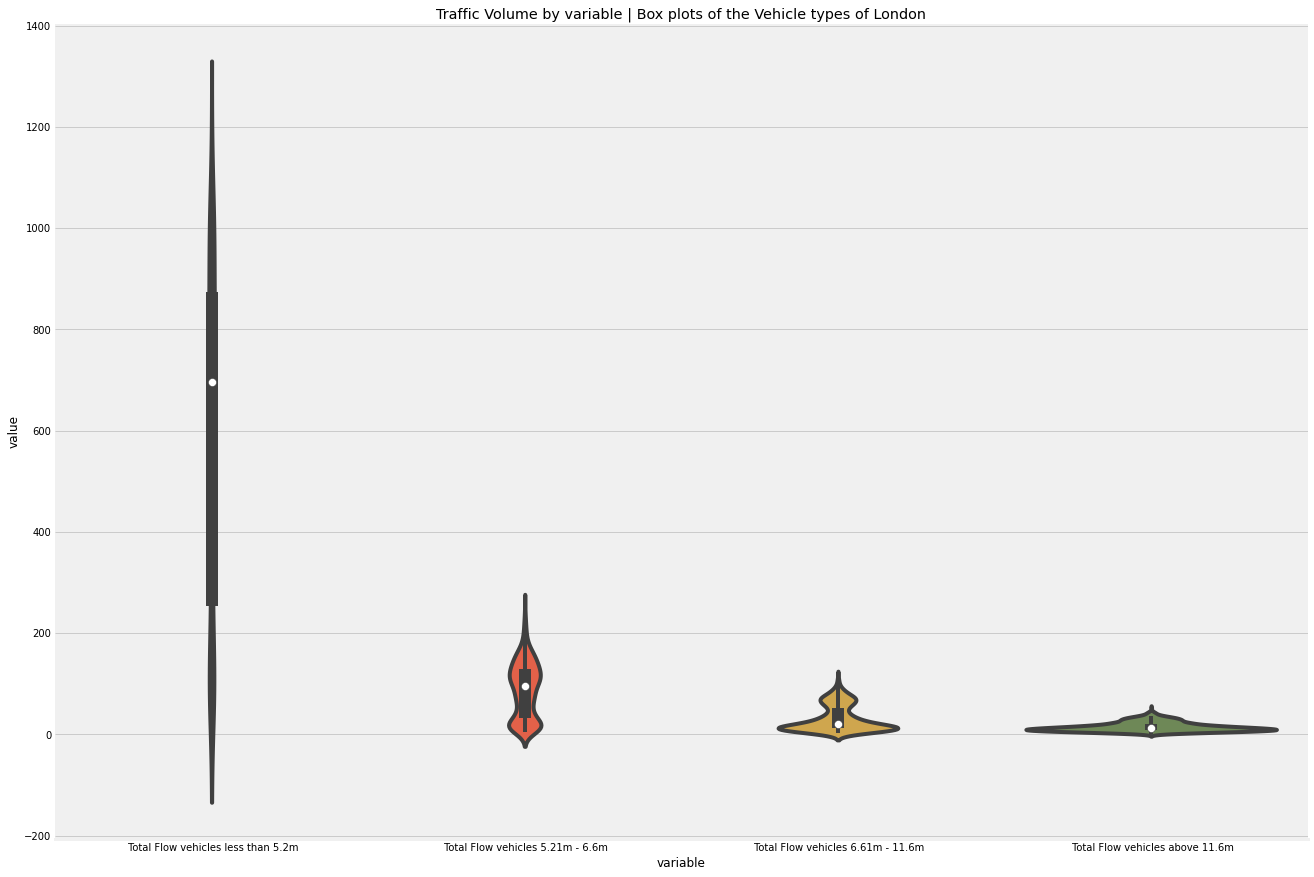

In [69]:
plot_violinplot(london_melt_vechicle_df,x="variable", y="value", title='Box plots of the Vehicle types of London')

`Notes`

- Vehicles with a length of less than 5.2m have a much wider range than the rest.

- Vehicles 5.21m - 6.6m, the probability density frequency (PDF) is greater, and the value occurs more frequently (i.e, with a higher probability).

- Vehicles 11.6m has a narrower PDF, which means the value occurs less frequently (i.e., with a lower probability), and is followed by Vehicles 5.61m - 11.6m.

- In summary, the maximum values in all of the vehicles studied are: 5.2m, 5.21m-6.6m, 6.61m-11.6m, and 11.6m.

In [70]:
# plt.figure(figsize=(18,10))

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="variable", y="value", data=london_melt_vechicle_df)
# plt.title('Box plots of the Vehicle types of London')

# plt.show()

# `Notes`

# - The minimum and maximum values of vehicles shorter than 5.2m have a much wider range than the rest. Furthermore, the first and third quartiles have a wider range of values than the rest of the vehicles.

# - In summary, the maximum values in all analyzed vehicles are: 5.2m, 5.21m-6.6m, 6.61m-11.6m, and 11.6m.

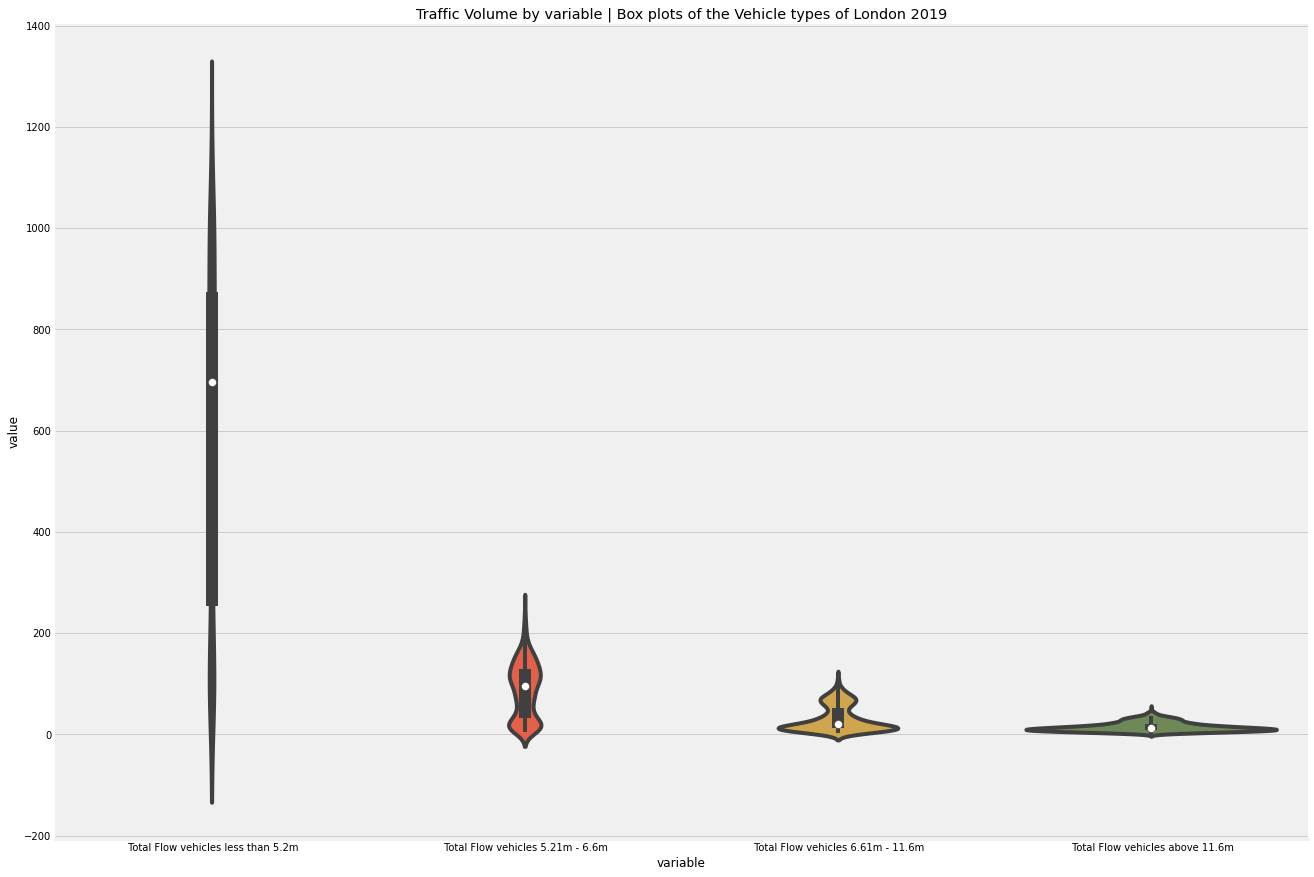

In [71]:
# 2019
plot_violinplot(london_melt_vechicle_df_2019,x="variable", y="value", 
                title='Box plots of the Vehicle types of London 2019')

`Notes`

- Vehicles with a length of less than 5.2m have a much wider range than the rest.

- Vehicles 5.21m - 6.6m, the probability density frequency (PDF) is greater, and the value occurs more frequently (i.e, with a higher probability).

- Vehicles 11.6m has a narrower PDF, which means the value occurs less frequently (i.e., with a lower probability), and is followed by Vehicles 5.61m - 11.6m.



In [72]:
# # 2019
# plt.figure(figsize=(18,10))

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="variable", y="value", data=london_melt_vechicle_df_2019)
# plt.title('Box plots of the Vehicle types of London')

# plt.show()

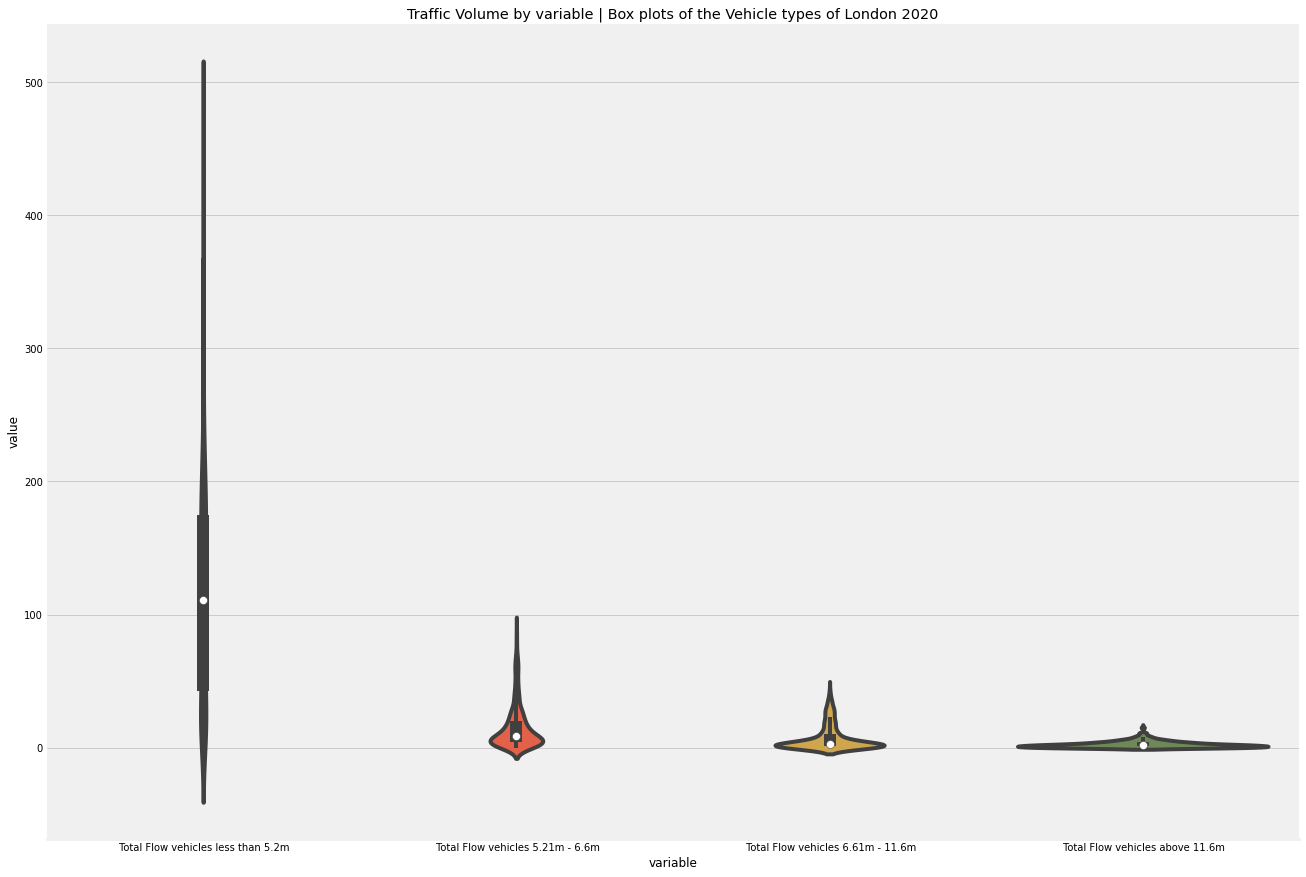

In [73]:
# 2020
plot_violinplot(london_melt_vechicle_df_2020,x="variable", y="value",
                title='Box plots of the Vehicle types of London 2020')

`Notes`

- Vehicles with a length of less than 5.2m have a much wider range than the rest.

- Vehicles 11.6m has a narrower PDF, which means the value occurs less frequently (i.e., with a lower probability), and is followed by Vehicles 5.61m - 11.6m and Vehicles 5.21m - 6.6m.



In [74]:
# # 2020
# plt.figure(figsize=(18,10))

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="variable", y="value", data=london_melt_vechicle_df_2020)
# plt.title('Box plots of the Vehicle types of London')

# plt.show()

For Bristol

In [75]:
bristol_vehicles_df = bristol_df[vehicles_type][:1000]#.set_index('datetime')
bristol_vehicles_df_2019 = bristol_df_2019[vehicles_type][:1000]#.set_index('datetime')
bristol_vehicles_df_2020 = bristol_df_2020[vehicles_type][:1000]#.set_index('datetime')

bristol_vehicles_df.columns=inverse_header
bristol_vehicles_df_2019.columns=inverse_header
bristol_vehicles_df_2020.columns=inverse_header

Text(0.5, 1.0, 'Vehicle Flows')

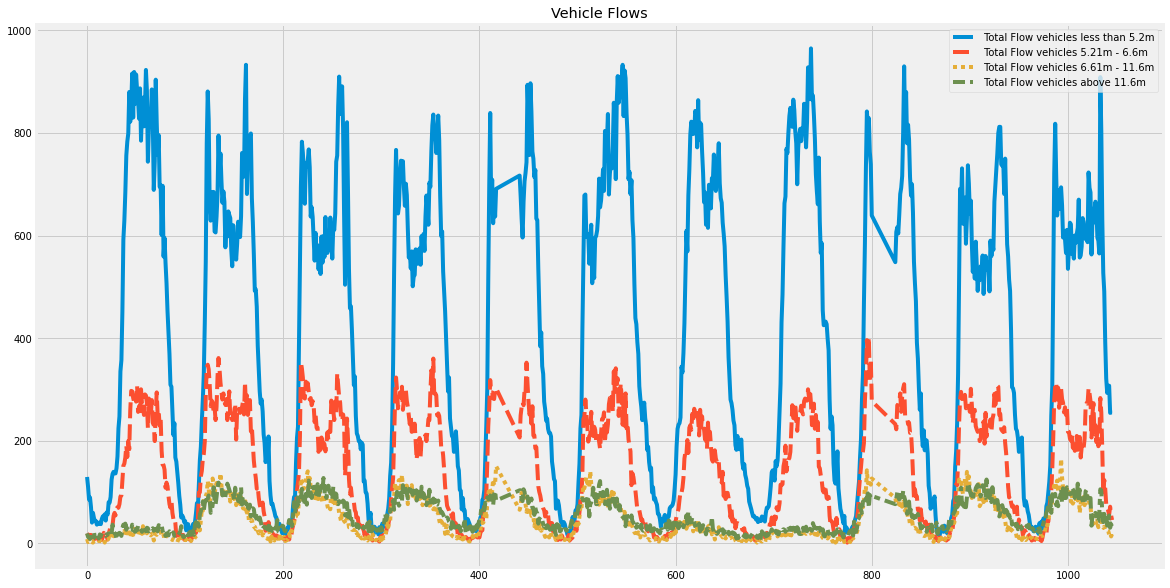

In [76]:
plt.figure(figsize=(18,10))
sns.lineplot(data=bristol_vehicles_df)
plt.title('Vehicle Flows')

`Notes`

- We can see a visible upward flow, which means that many vehicles shorter than 5.2m were detected.
- Vehicles shorter than 11.6m were detected less frequently.
- The number of detected vehicles between 5.21m and 6.6m was higher but similar to those between 6.61m and 11.6m.


Text(0.5, 1.0, 'Vehicle Flows')

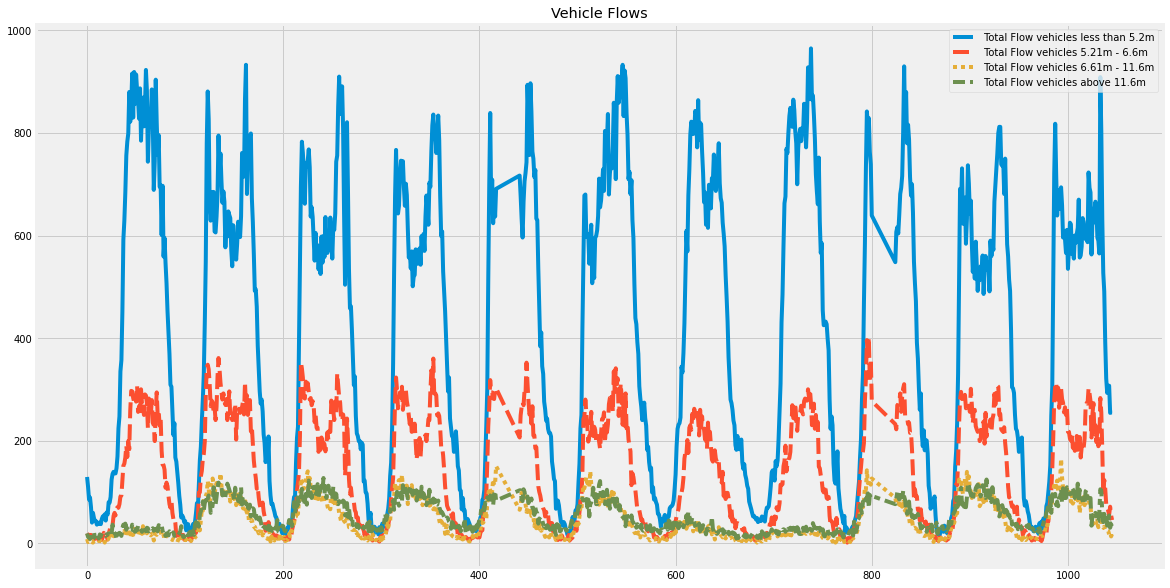

In [77]:
plt.figure(figsize=(18,10))
sns.lineplot(data=bristol_vehicles_df_2019)
plt.title('Vehicle Flows')

Text(0.5, 1.0, 'Vehicle Flows')

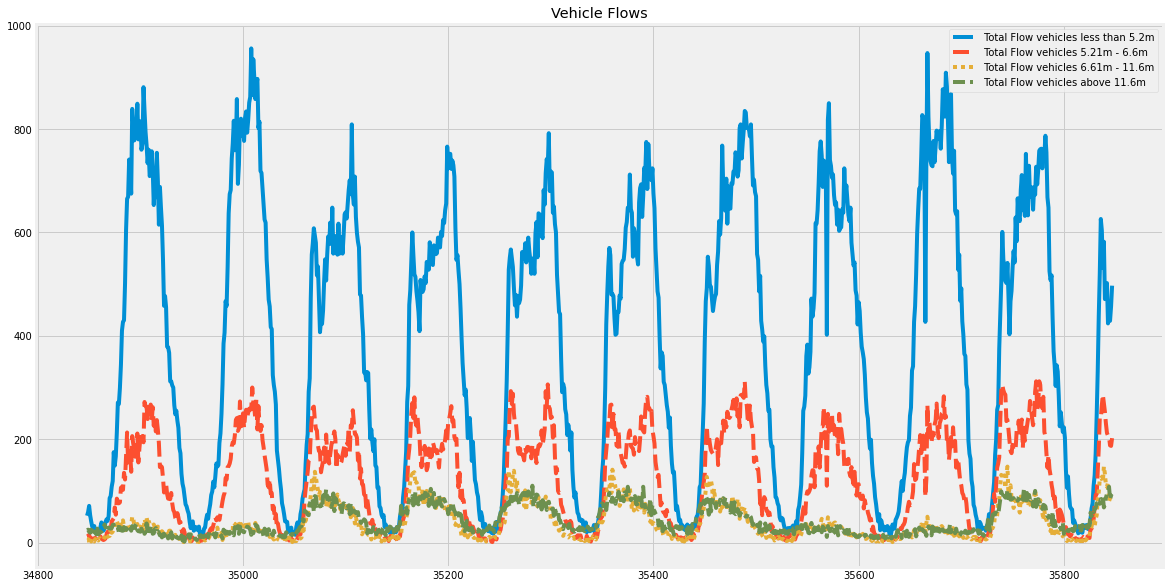

In [78]:
plt.figure(figsize=(18,10))
sns.lineplot( data=bristol_vehicles_df_2020)
plt.title('Vehicle Flows')

In [79]:
# unpivots the DataFrame from wide format to long format
bristol_melt_vechicle_df = pd.melt(bristol_vehicles_df,
                                  id_vars =['datetime']).drop('datetime',axis=1)

bristol_melt_vechicle_df_2019 = pd.melt(bristol_vehicles_df_2019,
                                  id_vars =['datetime']).drop('datetime',axis=1)

bristol_melt_vechicle_df_2020 = pd.melt(bristol_vehicles_df_2020,
                                  id_vars =['datetime']).drop('datetime',axis=1)
# bristol_melt_vechicle_df.head()

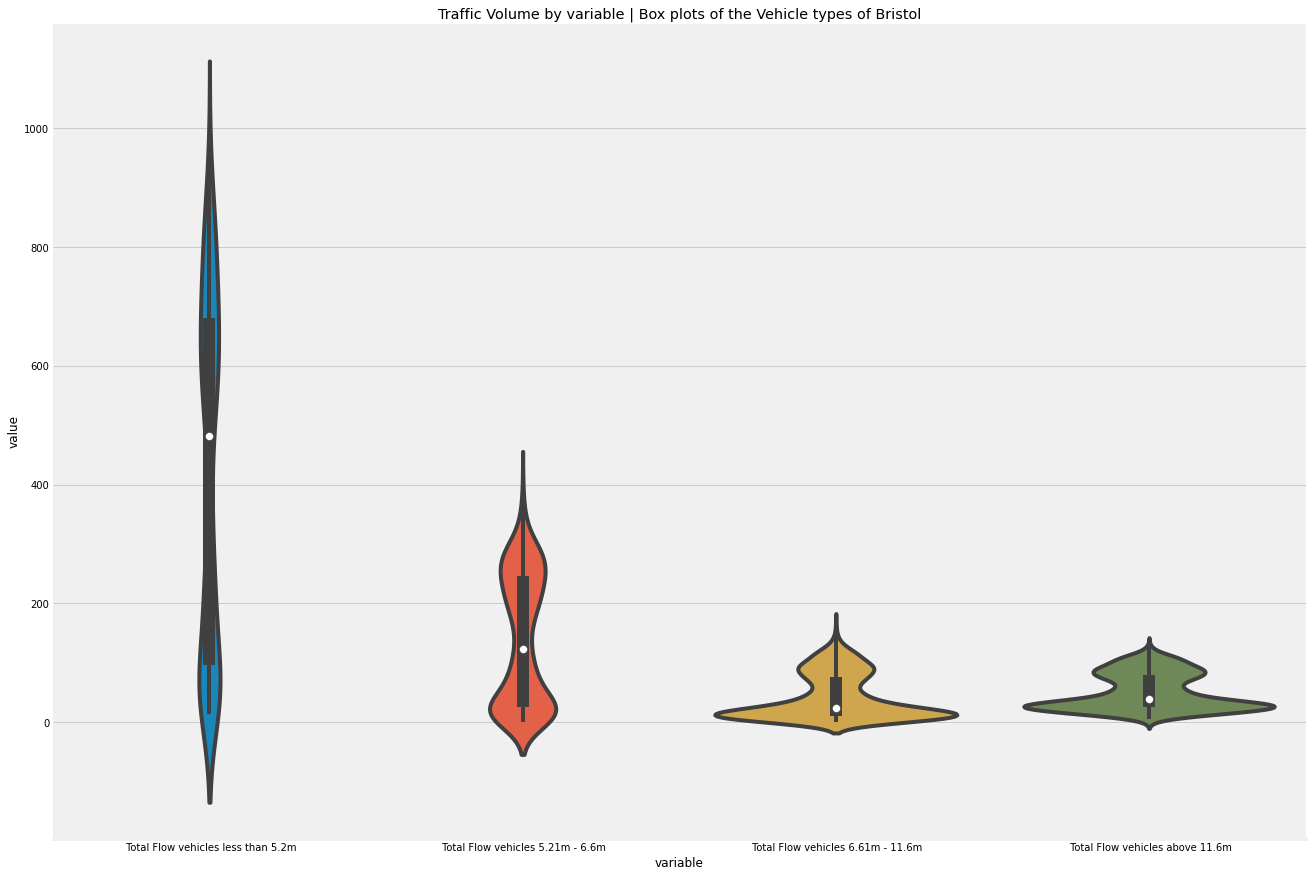

In [80]:
# 2019-2020
plot_violinplot(bristol_melt_vechicle_df,x="variable", y="value",
                title='Box plots of the Vehicle types of Bristol')

`Notes`

- The minimum and maximum values of vehicles shorter than 5.2m have a much wider range than the rest. Furthermore, the first and third quartiles have a wider range of values than the rest of the vehicles.

- When we compare the vehicle 5.21m-6.6m of Bristol to that of London, the range of the minimum and maximum values, as well as the scope of values in the first and third quartiles, is greater in Bristol.


In [81]:
# plt.figure(figsize=(18,10))

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="variable", y="value", data=bristol_melt_vechicle_df)
# plt.title('Box plots of the Vehicle types of Bristol')

# plt.show()

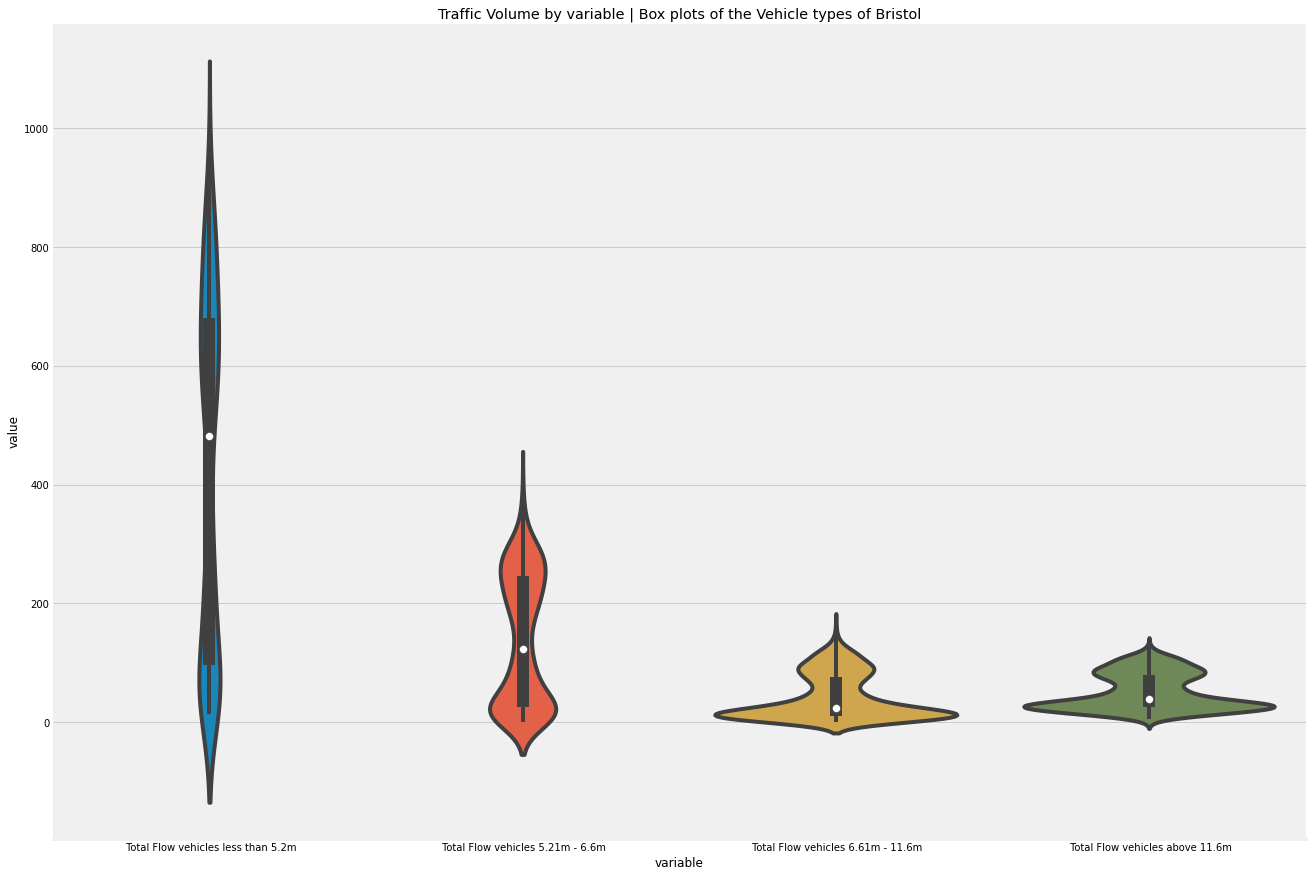

In [82]:
# 2019
plot_violinplot(bristol_melt_vechicle_df_2019,x="variable", y="value",
                title='Box plots of the Vehicle types of Bristol')

`Notes`

- The minimum and maximum values of vehicles shorter than 5.2m have a much wider range than the rest. Furthermore, the first and third quartiles have a wider range of values than the rest of the vehicles.

- When we compare the vehicle 5.21m-6.6m of Bristol to that of London, the range of the minimum and maximum values, as well as the scope of values in the first and third quartiles, is greater in Bristol.


In [83]:
# plt.figure(figsize=(18,10))

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="variable", y="value", data=bristol_melt_vechicle_df_2019)
# plt.title('Box plots of the Vehicle types of Bristol')

# plt.show()

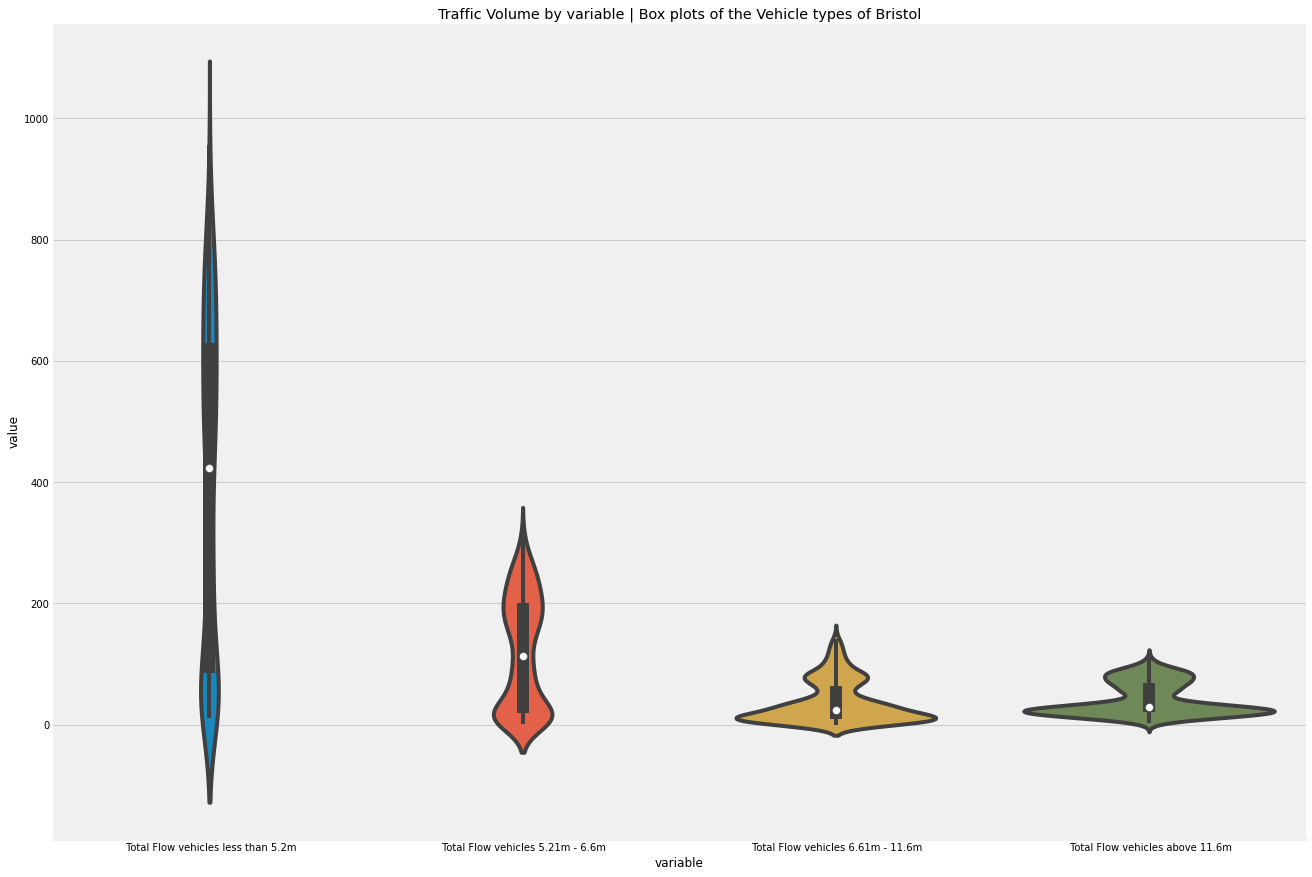

In [84]:
# 2020
plot_violinplot(bristol_melt_vechicle_df_2020,x="variable", y="value",
                title='Box plots of the Vehicle types of Bristol')

In [85]:
# plt.figure(figsize=(18,10))

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="variable", y="value", data=bristol_melt_vechicle_df_2020)
# plt.title('Box plots of the Vehicle types of Bristol')

# plt.show()

## Timeseries analysis for pre-lock, lock, postlock
    for 2019-2020 for bristol and london. 





The carraige flow is lower compared to the working days in the case of Saturdays and Sundays

Lets take of the weekend.

In [86]:
londondf_filtered = london_df.drop(london_df[(london_df['day_name'] == 'Saturday') |( london_df['day_name'] == 'Sunday')].index)#, inplace = True)

londondf_filtered.head(2)


time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
0  00:14:00           4                   218.0    162.0          27.0   
1  00:29:00           4                   166.0    130.0          20.0   

   tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
0           19.0      10.0        88.08            15       199128901   
1           10.0       6.0        86.40            15       199128901   

             datetime day_name  day     month  year weekday  hour  week  \
0 2019-02-01 00:14:00   Friday    1  February  2019  Friday     0     5   
1 2019-02-01 00:29:00   Friday    1  February  2019  Friday     0     5   

     day_time           time_daytime  
0  Late Night  00:14:00 - Late Night  
1  Late Night  00:29:00 - Late Night

In [87]:
bristoldf_filtered = bristol_df.drop(bristol_df[(bristol_df['day_name'] == 'Saturday') |( bristol_df['day_name'] == 'Sunday')].index)#, inplace = True)

bristoldf_filtered.head(2)


time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
96  00:14:00           0                   107.0     50.0          14.0   
97  00:29:00           0                    92.0     54.0          13.0   

    tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
96           10.0      33.0        93.97            15       102003601   
97            5.0      20.0        95.21            15       102003601   

              datetime day_name  day     month  year weekday  hour  week  \
96 2019-12-02 00:14:00   Monday    2  December  2019  Monday     0    49   
97 2019-12-02 00:29:00   Monday    2  December  2019  Monday     0    49   

      day_time           time_daytime  
96  Late Night  00:14:00 - Late Night  
97  Late Night  00:29:00 - Late Night

In [88]:
by_london_week_df = londondf_filtered.groupby(['week'])
by_bristol_week_df = bristoldf_filtered.groupby(['week'])

In [89]:
# by_london_week_df = london_df.groupby(['week'])
# by_bristol_week_df = bristol_df.groupby(['week'])

In [90]:
#  drill down to the sub-table
# london_7thweek_df = by_london_week_df.get_group((7)).set_index('time')
london_7thweek_df = by_london_week_df.get_group((7)).set_index('datetime')
london_13thweek_df = by_london_week_df.get_group((13)).set_index('datetime')
london_26thweek_df = by_london_week_df.get_group((26)).set_index('datetime')



In [91]:
#  drill down to the sub-table
bristol_7thweek_df = by_bristol_week_df.get_group((7)).set_index('datetime')
bristol_13thweek_df = by_bristol_week_df.get_group((13)).set_index('datetime')
bristol_26thweek_df = by_bristol_week_df.get_group((26)).set_index('datetime')


### Analysis of the impact of the covid-19 pandemic on road traffic on selected street routes in London

- 7th week– 11.-17.02.2019;
- 13th week – 25.-31.03.2019;
- 26th week – 24.-30.06.2019.

start time: `04:59:00`

end time: `17:59:00`

2019

In [92]:
# 7th week; 11.-17.02.2019;
london_7thweek_2019_df =  london_7thweek_df.loc['2019-02-11 04:59:00':'2019-02-17 17:59:00']
bristol_7thweek_2019_df =  bristol_7thweek_df.loc['2019-02-11 04:59:00':'2019-02-17 17:59:00']

In [93]:
# 13th week – 25.-31.03.2019;
london_13thweek_2019_df = london_13thweek_df.loc['2019-03-25 04:59:00':'2019-03-31 17:59:00']
bristol_13thweek_2019_df =  bristol_13thweek_df.loc['2019-03-25 04:59:00':'2019-03-31 17:59:00']

In [94]:
# 26th week – 24.-30.06.2019.
london_26thweek_2019_df = london_26thweek_df.loc['2019-06-24 04:59:00':'2019-06-30 17:59:00']
bristol_26thweek_2019_df =  bristol_26thweek_df.loc['2019-06-24 04:59:00':'2019-06-30 17:59:00']


2020

['2019-02-11 04:59:00':'2019-02-11 17:59:00']

In [95]:
# 7th week  11.-17.02.2020;
london_7thweek_2020_df =  london_7thweek_df.loc['2020-02-11 04:59:00':'2020-02-17 17:59:00']
bristol_7thweek_2020_df =  bristol_7thweek_df.loc['2020-02-11 04:59:00':'2020-02-17 17:59:00' ]

In [96]:
# 13th week – 25.-31.03.2020;
london_13thweek_2020_df = london_13thweek_df.loc['2020-03-25 04:59:00':'2020-03-31 17:59:00']
bristol_13thweek_2020_df =  bristol_13thweek_df.loc['2020-03-25 04:59:00':'2020-03-31 17:59:00']

In [97]:
# 26th week – 24.-30.06.2020.
london_26thweek_2020_df = london_26thweek_df.loc['2020-06-24 04:59:00':'2020-06-30 17:59:00']
bristol_26thweek_2020_df =  bristol_26thweek_df.loc['2020-06-24 04:59:00':'2020-06-30 17:59:00']


In [98]:
def switch_index(df_, b):
    '''
    index to b
        b becomes index
    '''
    return df_.set_index(b)
    

In [99]:
# resuable custom code

# for london
def london_traffic_volume_distribution(index=None):
    assert index != None, 'we need an index.'
    
    switch_index(london_26thweek_2019_df, index)['total_carriageway_flow'].plot(style="-k", figsize=(18,8),
                                                                           linewidth=2, label='26th week in 2019');
    switch_index(london_26thweek_2020_df, index)['total_carriageway_flow'].plot(style="--k", figsize=(18,8),
                                        linewidth=2,label='26th week in 2020');


    switch_index(london_7thweek_2019_df, index)['total_carriageway_flow'].plot(style="-y", figsize=(18,8),
                linewidth=2, label='7th week in 2019');
    switch_index(london_7thweek_2020_df, index)['total_carriageway_flow'].plot(style="--y", figsize=(18,8),
                 linewidth=2, label='7th week in 2020');


    switch_index(london_13thweek_2020_df, index)['total_carriageway_flow'].plot(style="--b", figsize=(18,8),
                                        linewidth=2 ,label='13th week in 2020');

    switch_index(london_13thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
                                        linewidth=2, label='13th week in 2019');

    plt.title("Carriageway Flow distribution on London on the 7th, 13th, and 26th weeks in 2019 and 2020",
              weight = "bold", fontsize=14)

    # Add legend
    plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )
#     plt.legend(loc="lower left", ncol = 6 )



    # Show plot
    plt.show()

    

# for bristol
def bristol_traffic_volume_distribution(index=None):
    assert index != None, 'we need an index.'

    switch_index(bristol_26thweek_2019_df, index)['total_carriageway_flow'].plot(style="-k", figsize=(18,8),
                                        linewidth=2, label='26th week in 2019');
    switch_index(bristol_26thweek_2020_df, index)['total_carriageway_flow'].plot(style="--k", figsize=(18,8),
                                        linewidth=2, label='26th week in 2020');


    switch_index(bristol_7thweek_2019_df, index)['total_carriageway_flow'].plot(style="-y", figsize=(18,8),
                                        linewidth=2, label='7th week in 2019');
    switch_index(bristol_7thweek_2020_df, index)['total_carriageway_flow'].plot(style="--y", figsize=(18,8),
                                        linewidth=2, label='7th week in 2020');


    switch_index(bristol_13thweek_2020_df, index)['total_carriageway_flow'].plot(style="--b", figsize=(18,8),
                                        linewidth=2, label='13th week in 2020');

    switch_index(bristol_13thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
                                        linewidth=2, label='13th week  in 2019');

    plt.title("Carriageway Flow distribution on Bristol in the 7th, 13th, and 26th weeks on the 2019 and 2020",
              weight = "bold", fontsize=14)

    # Add legend

    plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )


    # Show plot
    plt.show()


# make line's thinner

#### For london

The overall view

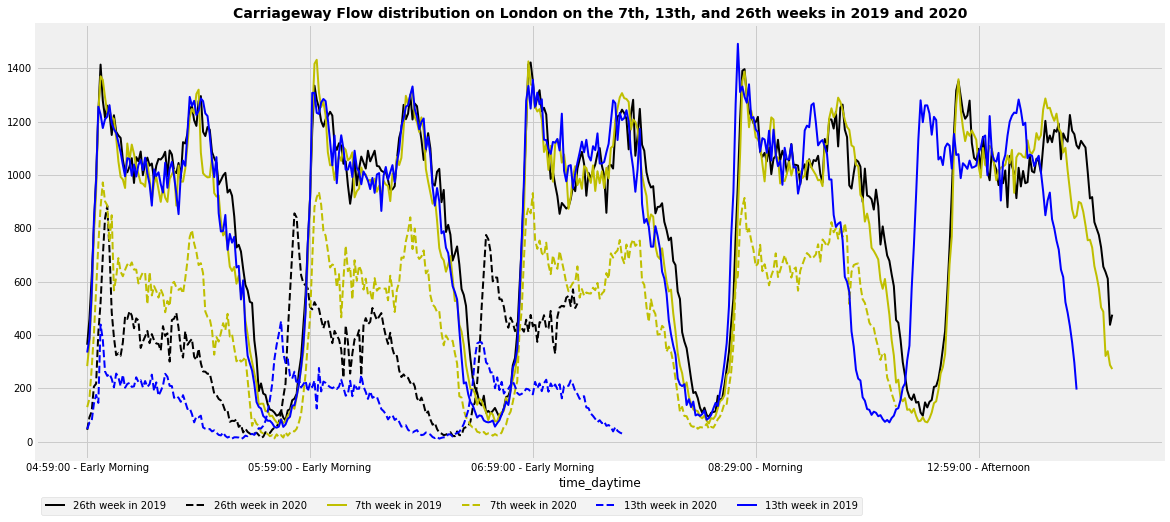

In [100]:
london_traffic_volume_distribution('time_daytime')


`Notes`

- During the Early Morning peaks (05:00-08:30), these values are the highest and the lowest in the Afternoon (12:00-2:00).

- The carriage flow values in the 26th week of 2020 are lower than in 2019, but the difference is not as large as in week 13. Because of the decreasing number of cases, some services were opened. 

- In the 7th week in 2019, the carriage flow values are greater than those in 2020.

- In the 13th week of 2020, a decrease in the carriage flow is already visible compared to 2019. 



each

#### London 7th week 2019 and 2020

In [101]:
index = 'time_daytime'

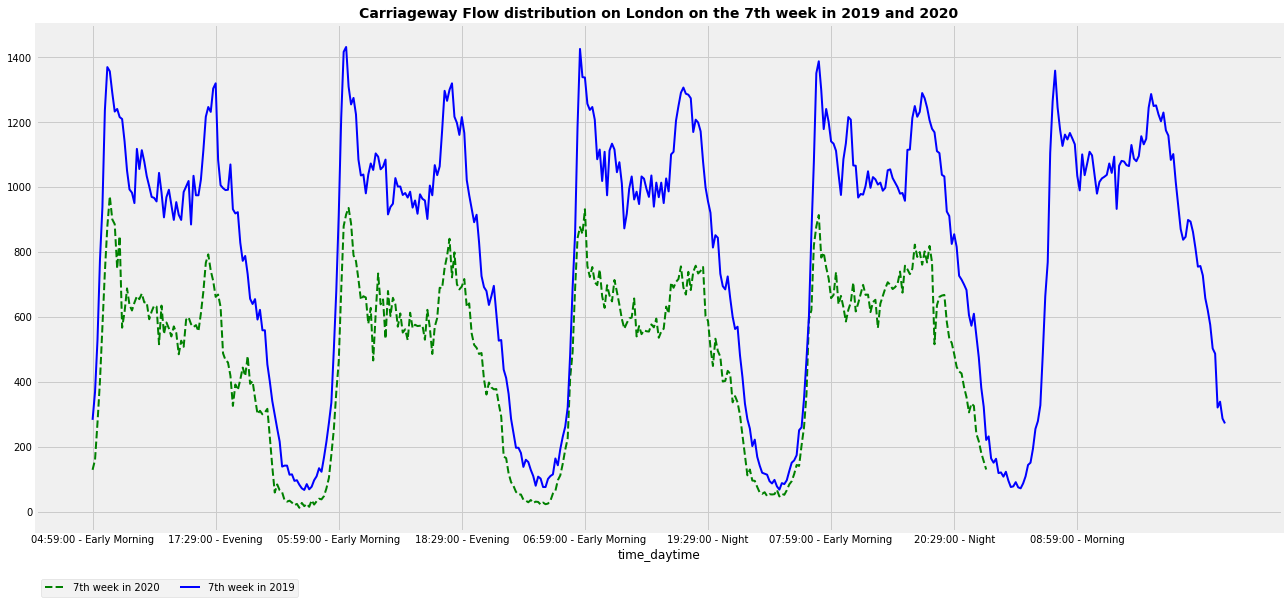

In [102]:

switch_index(london_7thweek_2020_df, index)['total_carriageway_flow'].plot(style="--g", figsize=(18,8),
             linewidth=2, label='7th week in 2020');
switch_index(london_7thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
            linewidth=2, label='7th week in 2019');


plt.title("Carriageway Flow distribution on London on the 7th week in 2019 and 2020",
          weight = "bold", fontsize=14)

plt.tight_layout()
# Add legend
plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )

# Show plot
plt.show()


`Notes`

- During the Early Morning peaks (05:00-06:00), these values are the highest and

- The lowest in the Afternoon (12:00-14:00).

- The 7th week of 2020 saw slightly lower carriage flow values than the 7th week of 2019, which can be attributed to the fact that movement was more frequent earlier in the year when covid was less of a problem.


#### London 13th week 2019 and 2020

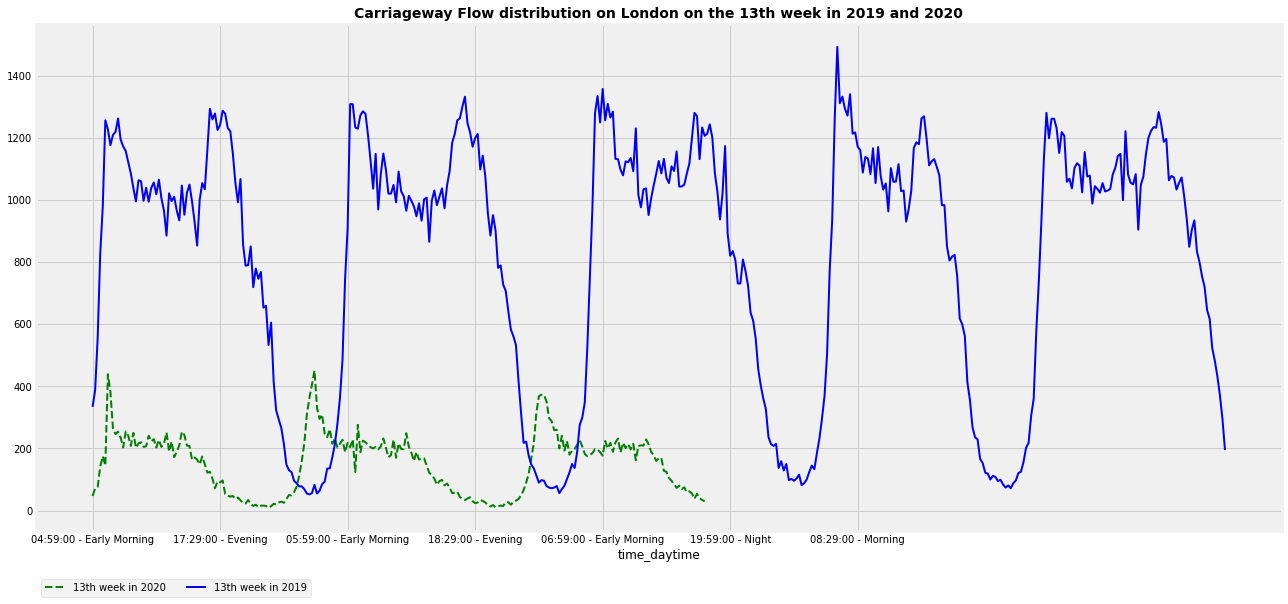

In [103]:

switch_index(london_13thweek_2020_df, index)['total_carriageway_flow'].plot(style="--g", figsize=(18,8),
                                    linewidth=2 ,label='13th week in 2020');
switch_index(london_13thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
                                    linewidth=2, label='13th week in 2019');


plt.title("Carriageway Flow distribution on London on the 13th week in 2019 and 2020",
          weight = "bold", fontsize=14)

plt.tight_layout()
# Add legend
plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )

# Show plot
plt.show()


`Notes`

- These values were the lowest for the Early Morning and Evening peaks for 2019.

- For 2020, this is because Covid restriction policies have been set so that everyone can stay at home.


#### London 26th week 2019 and 2020

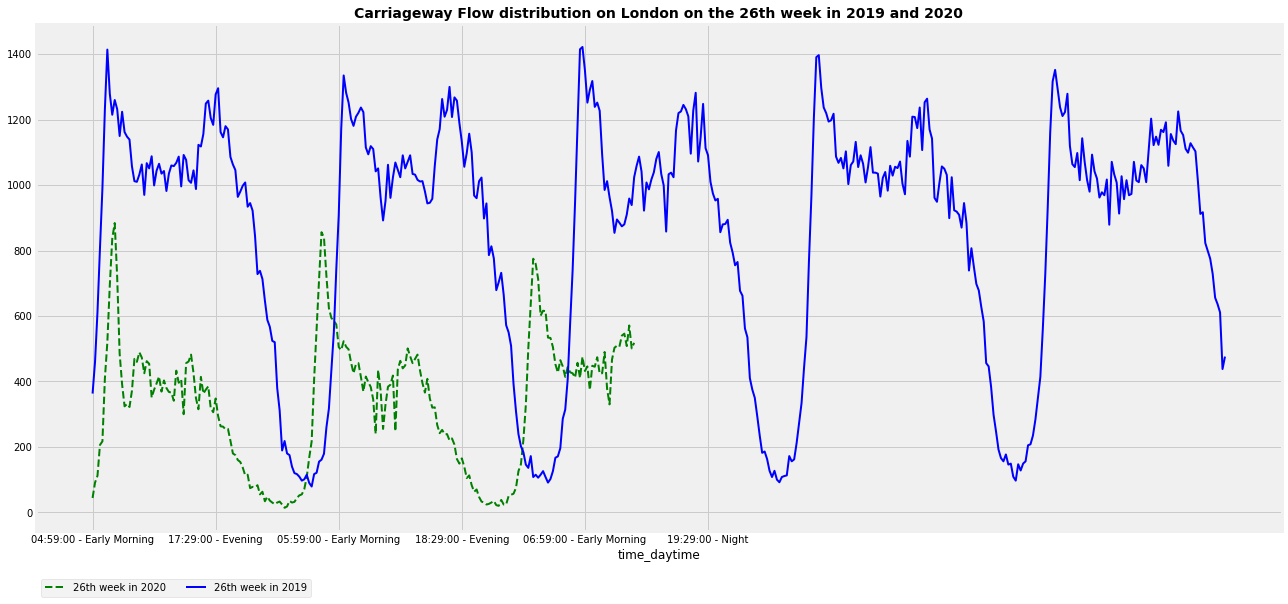

In [104]:

switch_index(london_26thweek_2020_df, index)['total_carriageway_flow'].plot(style="--g", figsize=(18,8),
                                    linewidth=2,label='26th week in 2020');
switch_index(london_26thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
                                                                       linewidth=2, label='26th week in 2019');


plt.title("Carriageway Flow distribution on London on the 26th week in 2019 and 2020",
          weight = "bold", fontsize=14)

plt.tight_layout()

# Add legend
plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )

# Show plot
plt.show()


`Notes`

- During the Early Morning peaks (05:00-07:30), these values are the highest and the lowest in the Afternoon (12:00-14:00).

- The carriage flow values in the 26th week of 2020 are significantly lower than in 2019. Several services were launched as a result of the declining number of cases.


#### for bristol

The overall view.

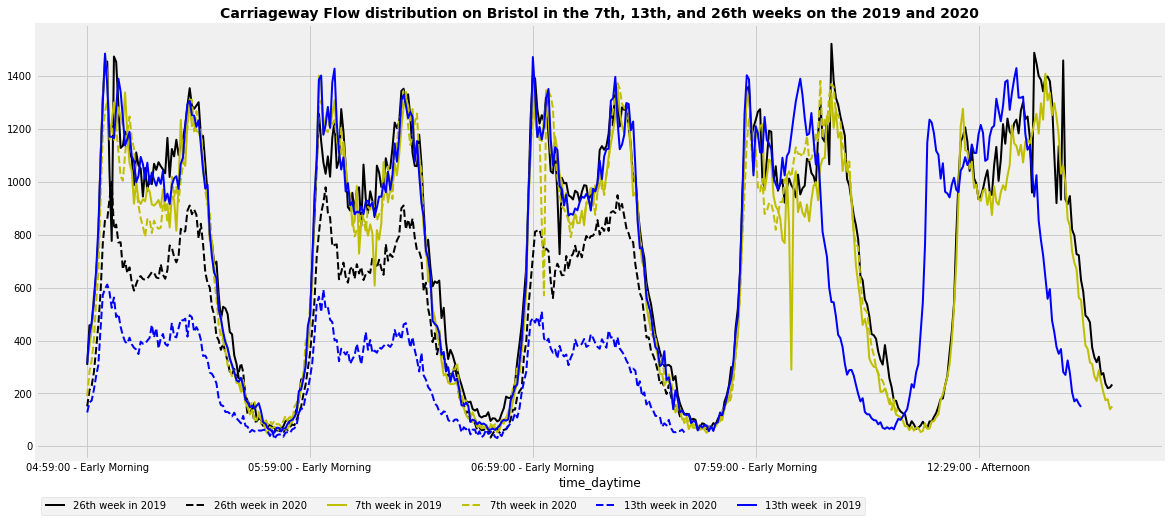

In [105]:
bristol_traffic_volume_distribution('time_daytime')

`Notes`

- During the Early Morning peaks (05:00-08:00), these values are the highest and the lowest in the Afternoon (11:00-12:40).

- In the 26th week of 2020, the  carriage flow values are lower than 2019.

- In the 7th week in 2019, the carriage flow values are same as those in 2020, with some outliers around **(8:20)**.

- In the 13th week of 2020, the carriage flow values are less than those in 2019.



each

#### Bristol 7th week 2019 and 2020

In [106]:
index = 'time_daytime'

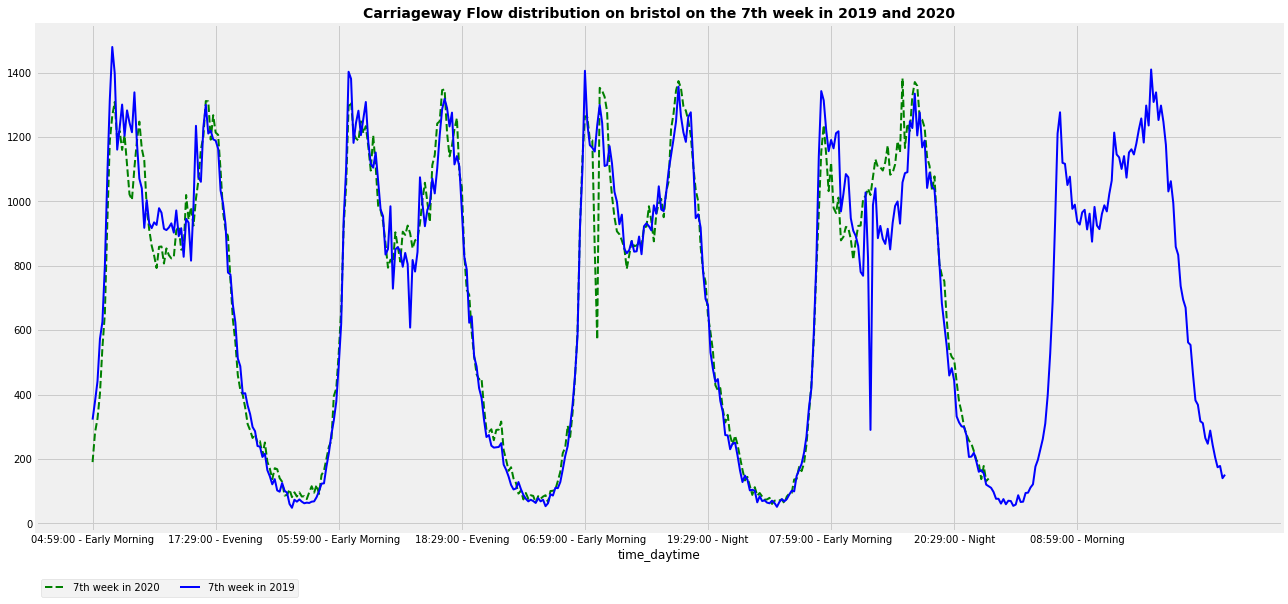

In [107]:

switch_index(bristol_7thweek_2020_df, index)['total_carriageway_flow'].plot(style="--g", figsize=(18,8),
             linewidth=2, label='7th week in 2020');
switch_index(bristol_7thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
            linewidth=2, label='7th week in 2019');


plt.title("Carriageway Flow distribution on bristol on the 7th week in 2019 and 2020",
          weight = "bold", fontsize=14)

plt.tight_layout()
# Add legend
plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )

# Show plot
plt.show()


`Notes`

- During the Early Morning peaks (05:00-07:00), these values are the highest and the lowest in the Afternoon (12:00-14:00).

- Due to earlier movement during the year when covid was absent, the carriage flow values in the 7th week of 2020 are the same as those in 2019.

#### Bristol 13th week 2019 and 2020

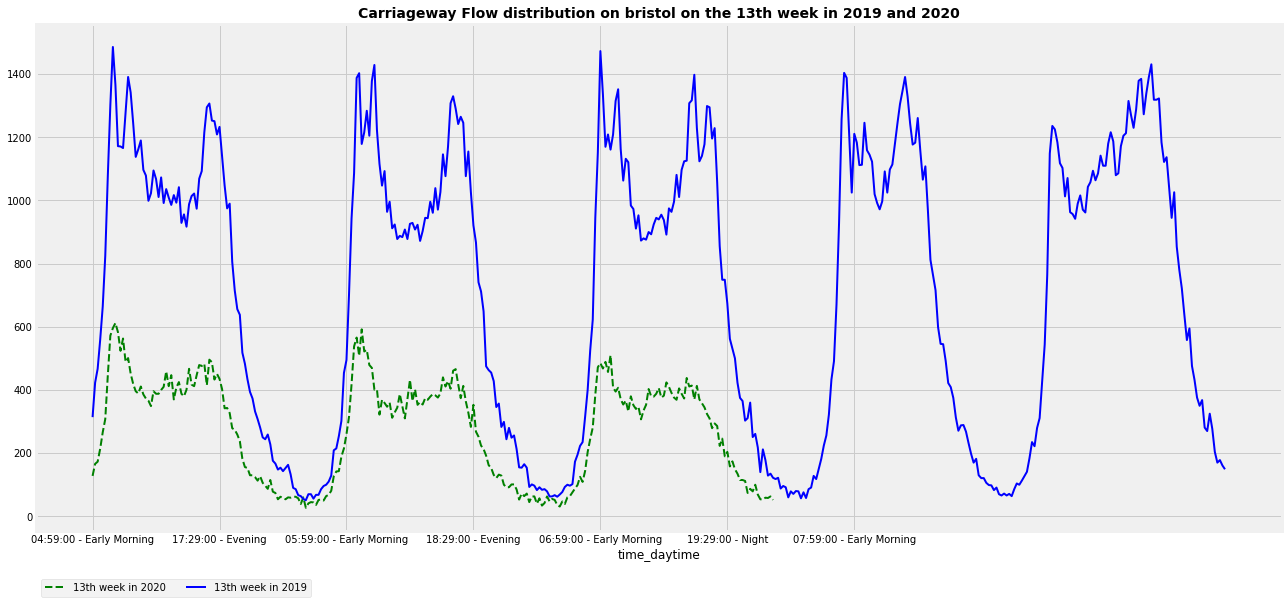

In [108]:

switch_index(bristol_13thweek_2020_df, index)['total_carriageway_flow'].plot(style="--g", figsize=(18,8),
                                    linewidth=2 ,label='13th week in 2020');
switch_index(bristol_13thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
                                    linewidth=2, label='13th week in 2019');


plt.title("Carriageway Flow distribution on bristol on the 13th week in 2019 and 2020",
          weight = "bold", fontsize=14)

plt.tight_layout()
# Add legend
plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )

# Show plot
plt.show()


`Notes`

- During the Early Morning peaks (05:00-08:30), these values are the highest and the lowest in the Afternoon (12:00-15:00).

- The values for the carriage flow in the thirteenth week of 2020 are lower than in 2019, when COVID prohibited people from leaving their homes.


#### Bristol 26th week 2019 and 2020

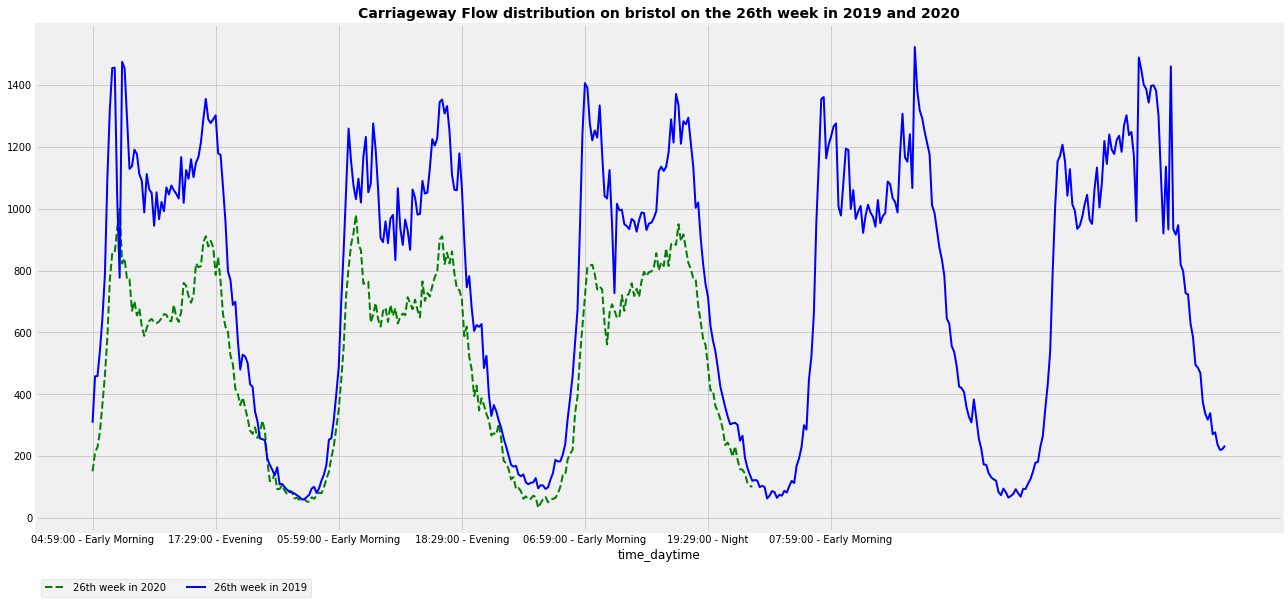

In [109]:

switch_index(bristol_26thweek_2020_df, index)['total_carriageway_flow'].plot(style="--g", figsize=(18,8),
                                    linewidth=2,label='26th week in 2020');
switch_index(bristol_26thweek_2019_df, index)['total_carriageway_flow'].plot(style="-b", figsize=(18,8),
                                                                       linewidth=2, label='26th week in 2019');


plt.title("Carriageway Flow distribution on bristol on the 26th week in 2019 and 2020",
          weight = "bold", fontsize=14)

plt.tight_layout()
# Add legend
plt.legend(bbox_to_anchor=(0, -0.14), loc="lower left", ncol = 6 )

# Show plot
plt.show()


`Notes`

- During the Early Morning peaks (05:00-08:30), these values are the highest and the lowest in the Afternoon (12:00-13:00).

- Although the carriage flow values in week 26 of 2020 are lower than in week 13 of 2019, the difference is not as significant. Several services were launched as a result of the declining number of cases. This is similar to the 26th week of london.

The next stage of the analysis was the development of box plots.

This includes the median, first and third quartiles, as well as the minimum and maximum values.

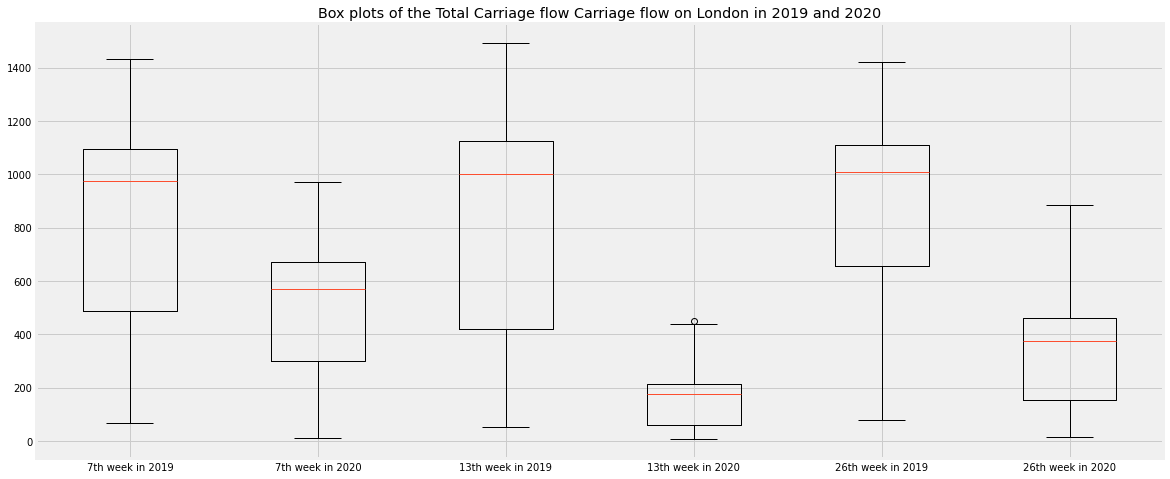

In [110]:

# Plot the dataframe
labels = ('7th week in 2019', '7th week in 2020',
          
         '13th week in 2019', '13th week in 2020',
         
          '26th week in 2019', '26th week in 2020'
         )

v = 'total_carriageway_flow'
london_data = [
    
    # 7th
    london_7thweek_2019_df[v],
    london_7thweek_2020_df[v],
    
    # 13th
    london_13thweek_2019_df[v],
    london_13thweek_2020_df[v],
    
    # 26th
    london_26thweek_2019_df[v],
    london_26thweek_2020_df[v],
]

plt.figure(figsize=(18,8))

plt.title('Box plots of the Total Carriage flow Carriage flow on London in 2019 and 2020')
plt.boxplot(london_data)


plt.xticks(np.arange(len(labels))+1,labels)

# Display the plot
plt.show()

`Notes`

-  The range of minimum and maximum values, as well as the first and third quartiles, in the 7th week of 2020, prior to the covid-19 pandemic, is smaller than that of 2019.

- In the case of the 13th week in 2020, the range of minimum and maximum values, as well as the first and third quartiles, is noticeably narrower than in 2019. London was completely shut down at this point.

- The range of minimum and maximum values, as well as the first and third quartiles, increase in the 26th week of 2020 compared to the 13th week.

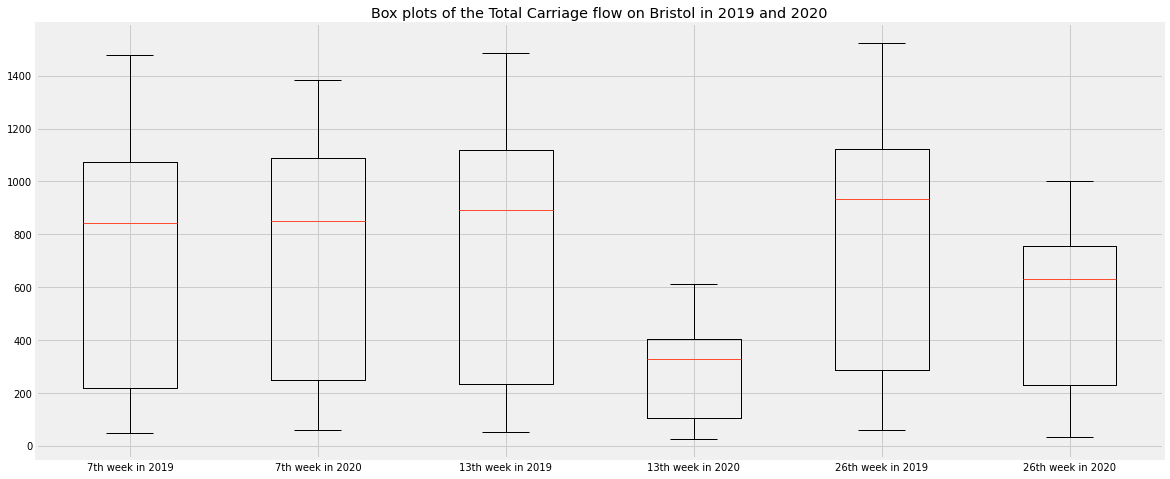

In [111]:

# Plot the dataframe

bristol_data = [
    
    # 7th
    bristol_7thweek_2019_df[v], 
    bristol_7thweek_2020_df[v],
    
    # 13th
    bristol_13thweek_2019_df[v],
    bristol_13thweek_2020_df[v],
    
    # 26th
    bristol_26thweek_2019_df[v],
    bristol_26thweek_2020_df[v],
]

plt.figure(figsize=(18,8))
plt.title('Box plots of the Total Carriage flow on Bristol in 2019 and 2020')

plt.boxplot(bristol_data)

plt.xticks(np.arange(len(labels))+1,labels)

# Display the plot
plt.show()

`Notes`

-  The range of minimum and maximum values, as well as the first and third quartiles, is slightly wider in the seventh week of 2019 than in 2020.

- The values of the range of minimum and maximum values, as well as the first and third quartiles, decrease in the 13th week of 2020 compared to 2019.

- The range of minimum and maximum values in the 26th week of 2019 is much wider than in 2020.

- The highest values were found in the 13th and 26th weeks of 2019. While the 7th week of 2019 and the 7th week of 2020 were both close.


# analyze 2018 and 2021

#### For london

2018

In [112]:
london_2018_p = 'data/transport-data/j4-to-j3-london/M4 eastbound between J4 and J3 (199128901) Monthly Summary (2018).csv'

london_2018_df = pd.read_csv(london_2018_p)
london_2018_df.head()


month   ADT - 24h   ADT % of vehicles>6.6m - 24h   AWT - 24h  \
0   January       38185                              9       39109   
1  February       39892                             10       40619   
2     March       50873                             10       51512   
3     April       76120                             10       60161   
4       May       76355                              9       63989   

    AWT % of vehicles>6.6m - 24h   ADT - 18h   ADT % of vehicles>6.6m - 18h  \
0                             11       35934                              6   
1                             11       37496                              7   
2                             11       49802                              7   
3                             11       71262                              7   
4                             10       71222                              7   

    AWT - 18h   AWT % of vehicles>6.6m - 18h   ADT - 16h  \
0       36729                              8       34175   
1       38165                              8       35728   
2       51111                              8       47322   
3       72662                              8       67075   
4       72303                              8       66811   

    ADT % of vehicles>6.6m - 16h   AWT - 16h   AWT % of vehicles>6.6m - 16h  \
0                              6       35022                              8   
1                              7       36430                              9   
2                              7       48647                              8   
3                              7       68579                              9   
4                              7       68011                              8   

    ADT - 12h   ADT % of vehicles>6.6m - 12h   AWT - 12h  \
0       26873                              7       27213   
1       27932                              8       28187   
2       36883                              8       37650   
3       52215                              8       52771   
4       51749                              7       52368   

    AWT % of vehicles>6.6m - 12h   Number Of Days  
0                              9               29  
1                              9               27  
2                              9               24  
3                              9               26  
4                              9               28

#### 2021

In [113]:
london_2021_p = 'data/transport-data/j4-to-j3-london/M4 eastbound between J4 and J3 (199128901) Monthly Summary.(2021)csv.csv'

london_2021_df = pd.read_csv(london_2021_p)
london_2021_df.head()


month   ADT - 24h   ADT % of vehicles>6.6m - 24h   AWT - 24h  \
0   January       34749                              0       38422   
1  February       38312                              0       43233   
2     March       43292                              0       47931   
3     April       51800                              0       45580   
4       May       54783                              0       45288   

    AWT % of vehicles>6.6m - 24h   ADT - 18h   ADT % of vehicles>6.6m - 18h  \
0                              0       33448                              0   
1                              0       36826                              0   
2                              0       41697                              0   
3                              0       49990                              0   
4                              0       52447                              0   

    AWT - 18h   AWT % of vehicles>6.6m - 18h   ADT - 16h  \
0       36991                              0       32468   
1       41592                              0       35776   
2       46219                              0       40434   
3       52352                              0       48180   
4       54840                              0       50241   

    ADT % of vehicles>6.6m - 16h   AWT - 16h   AWT % of vehicles>6.6m - 16h  \
0                              0       36074                              0   
1                              0       40542                              0   
2                              0       45000                              0   
3                              0       50624                              0   
4                              0       52745                              0   

    ADT - 12h   ADT % of vehicles>6.6m - 12h   AWT - 12h  \
0       26779                              0       29679   
1       29487                              0       33375   
2       32782                              0       36285   
3       38601                              0       40474   
4       40141                              0       41648   

    AWT % of vehicles>6.6m - 12h   Number Of Days  
0                              0               28  
1                              0               28  
2                              0               24  
3                              0               29  
4                              0               29

There is no record on the vehicles types in 2021.

In [114]:
daily_adt_total_cols=[' ADT - 24h', ' ADT - 18h',' ADT - 16h', ' ADT - 12h']

In [115]:
daily_adt_cols = [' ADT % of vehicles>6.6m - 24h',
' ADT % of vehicles>6.6m - 18h', 
' ADT % of vehicles>6.6m - 16h', 
' ADT % of vehicles>6.6m - 12h', ]

<AxesSubplot:title={'center':'london 2021'}>

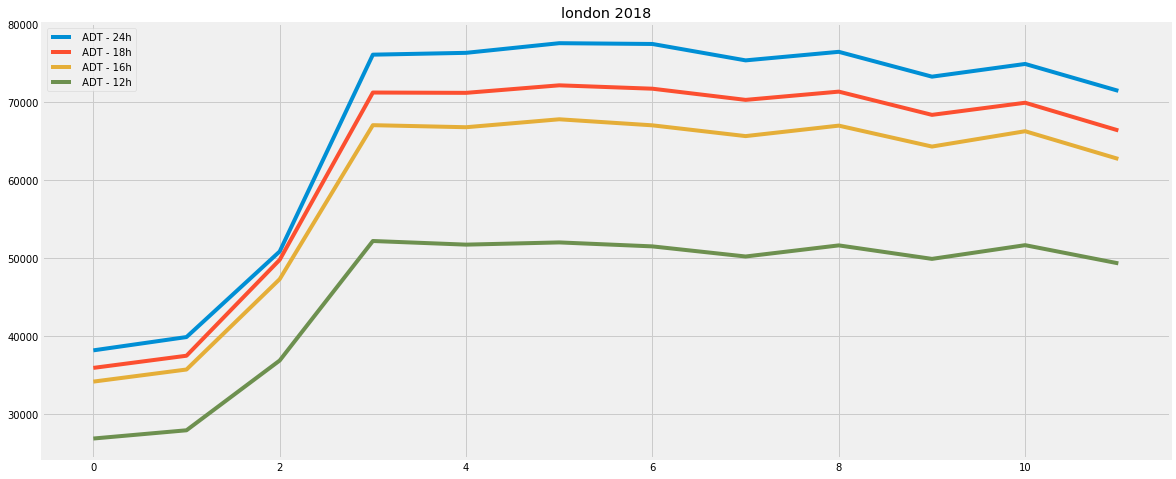

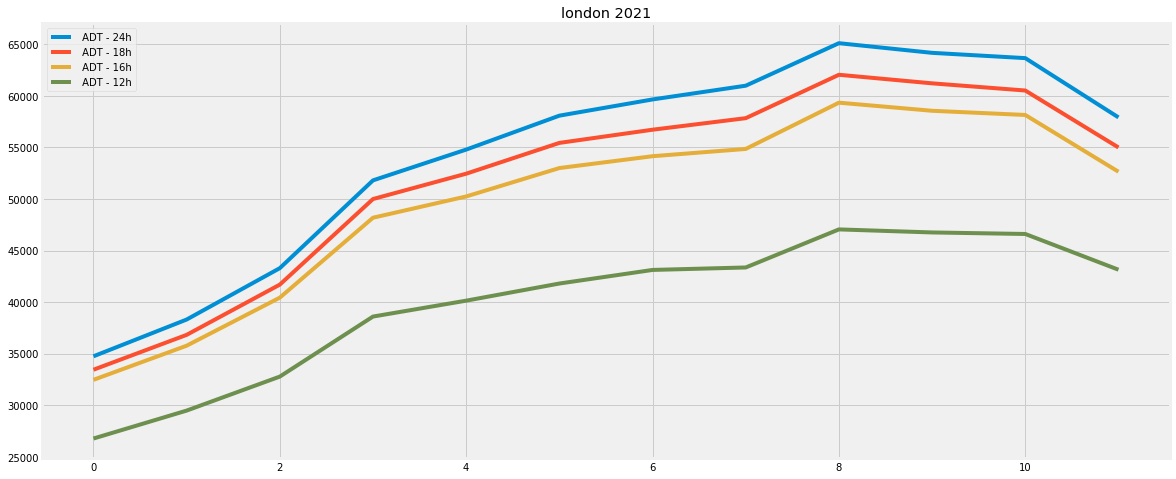

In [116]:
# plt.figure(figsize=(18,8))

london_2018_df[daily_adt_total_cols].plot(figsize=(18,8),title='london 2018')
london_2021_df[daily_adt_total_cols].plot(figsize=(18,8),title='london 2021')


<AxesSubplot:>

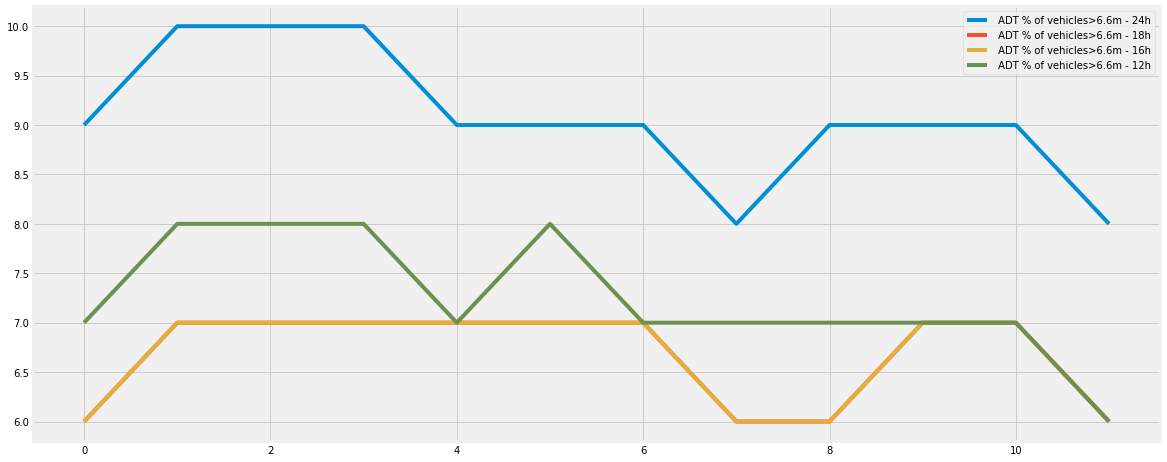

In [117]:
london_2018_df[daily_adt_cols].plot(figsize=(18,8))

In [118]:
london_2018_df['total_carriageway_flow'] = london_2018_df[daily_adt_cols].sum(axis=1)
london_2021_df['total_carriageway_flow'] = london_2021_df[daily_adt_cols].sum(axis=1)

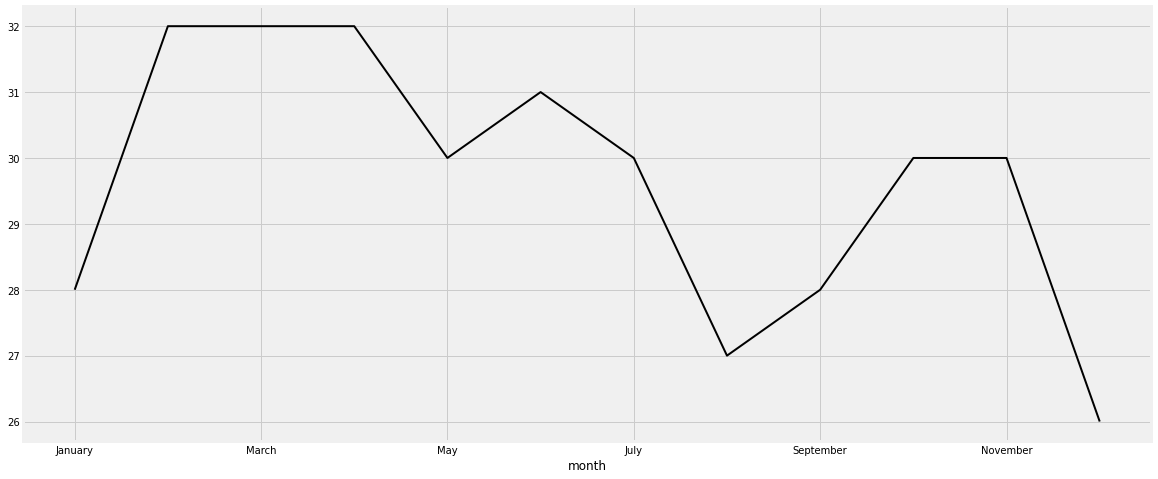

In [119]:
switch_index(london_2018_df, 'month')['total_carriageway_flow'].plot(style="-k", figsize=(18,8),
                                        linewidth=2, label=' week in 2019');

`Note`

- We can see the carriage flow from january increases and became stable till it dropped after appril.
- August had the lowest steep compared to may.


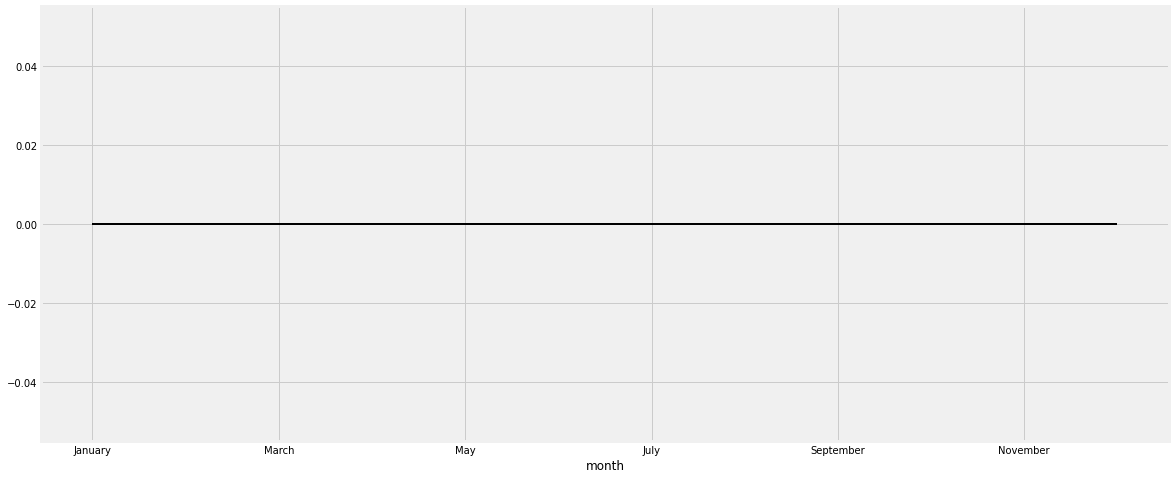

In [120]:
switch_index(london_2021_df, 'month')['total_carriageway_flow'].plot(style="-k", figsize=(18,8),
                                        linewidth=2, label=' week in 2019');

`Note`

- There is no trends due to lack of data points.

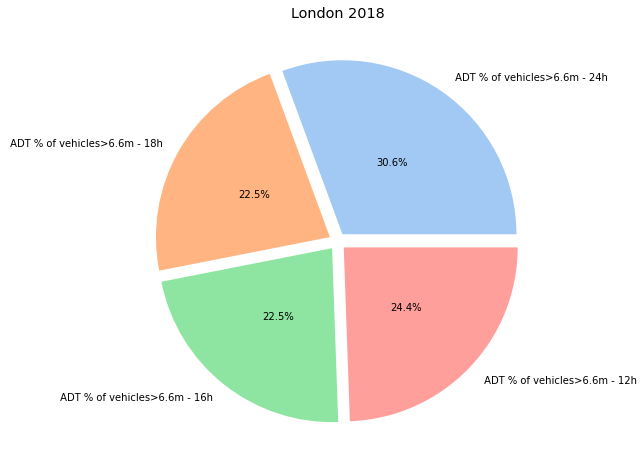

In [121]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
data = london_2018_df[daily_adt_cols].sum()
labels = data.keys()

plt.figure(figsize=(18,8))
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5,colors = colors)
plt.title('London 2018')

plt.show();



`Notes`

- The pie chart depicts the proportions of vehicle types recorded daily by average daily traffic. The highest proportion is ADT % of vehicles>6.6m - 24h, followed by ADT % of vehicles>6.6m - 12h. The proportions of ADT % of vehicles >6.6m - 18h and ADT % of vehicles >6.6m - 16h are roughly equal.

#### For Bristol

2018

In [122]:
bristol_2018_p = 'data/transport-data/j20-to-j19-Bristol/M4 eastbound between J20 and J19 (102003601) Monthly Summary.(2018)csv.csv'

bristol_2018_df = pd.read_csv(bristol_2018_p)
bristol_2018_df.head()


month   ADT - 24h   ADT % of vehicles>6.6m - 24h   AWT - 24h  \
0   January       57437                             20       60903   
1  February       60225                             20       64241   
2     March       61298                             20       65760   
3     April       61354                             19       52777   
4       May       64236                             19       56926   

    AWT % of vehicles>6.6m - 24h   ADT - 18h   ADT % of vehicles>6.6m - 18h  \
0                             22       54644                             13   
1                             22       57389                             13   
2                             23       58382                             13   
3                             22       60790                             12   
4                             22       61138                             13   

    AWT - 18h   AWT % of vehicles>6.6m - 18h   ADT - 16h  \
0       57827                             15       53244   
1       61064                             15       55884   
2       62473                             16       56819   
3       64158                             14       59026   
4       64389                             14       59361   

    ADT % of vehicles>6.6m - 16h   AWT - 16h   AWT % of vehicles>6.6m - 16h  \
0                             13       56446                             15   
1                             12       59606                             15   
2                             12       60973                             15   
3                             12       62454                             14   
4                             12       62644                             14   

    ADT - 12h   ADT % of vehicles>6.6m - 12h   AWT - 12h  \
0       45530                             12       48221   
1       47512                             12       50657   
2       48418                             12       51838   
3       49936                             12       52856   
4       50029                             12       52622   

    AWT % of vehicles>6.6m - 12h   Number Of Days  
0                             14               27  
1                             15               26  
2                             16               27  
3                             14               27  
4                             14               28

#### 2021

In [123]:
bristol_2021_p = 'data/transport-data/j20-to-j19-Bristol/M4 eastbound between J20 and J19 (102003601) Monthly Summary (2021).csv'
bristol_2021_df = pd.read_csv(bristol_2021_p)
bristol_2021_df.head()


month   ADT - 24h   ADT % of vehicles>6.6m - 24h   AWT - 24h  \
0   January       29469                             27       35676   
1  February       34938                             28       40631   
2     March       40870                             28       45850   
3     April       50106                              2       44328   
4       May       55426                              0       46783   

    AWT % of vehicles>6.6m - 24h   ADT - 18h   ADT % of vehicles>6.6m - 18h  \
0                             30       27750                             20   
1                             31       33001                             20   
2                             30       38587                             20   
3                              2       48095                              1   
4                              0       53256                              0   

    AWT - 18h   AWT % of vehicles>6.6m - 18h   ADT - 16h  \
0       33599                             23       27028   
1       38394                             24       32239   
2       43279                             23       37566   
3       51350                              2       46866   
4       56625                              0       51776   

    ADT % of vehicles>6.6m - 16h   AWT - 16h   AWT % of vehicles>6.6m - 16h  \
0                             18       32847                             22   
1                             19       37624                             22   
2                             18       42209                             21   
3                              1       50144                              2   
4                              0       55166                              0   

    ADT - 12h   ADT % of vehicles>6.6m - 12h   AWT - 12h  \
0       23202                             18       28246   
1       27683                             19       32436   
2       32202                             18       36254   
3       39951                              1       42943   
4       44141                              0       46972   

    AWT % of vehicles>6.6m - 12h   Number Of Days  
0                             22               20  
1                             23               22  
2                             21               26  
3                              2               27  
4                              0               29

There is no record on the vehicles types in 2021.

<AxesSubplot:title={'center':'bristol 2021'}>

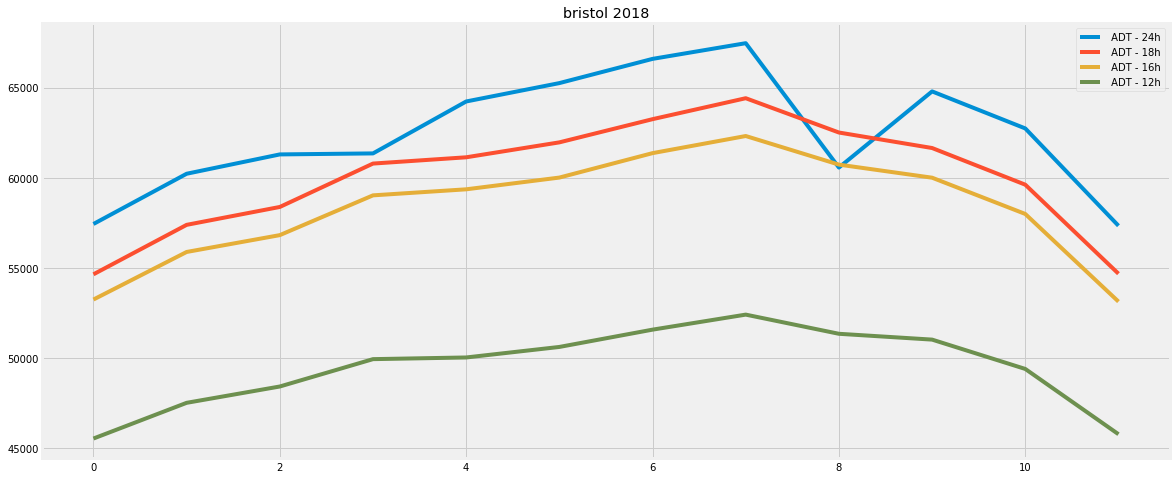

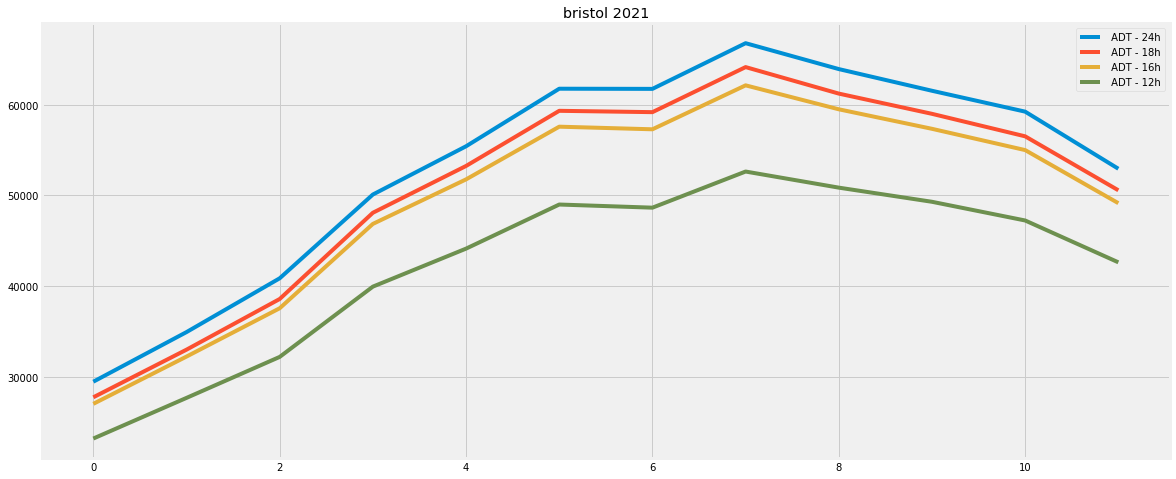

In [124]:
# plt.figure(figsize=(18,8))

bristol_2018_df[daily_adt_total_cols].plot(figsize=(18,8),title='bristol 2018')
bristol_2021_df[daily_adt_total_cols].plot(figsize=(18,8),title='bristol 2021')


In [125]:
bristol_2018_df['total_carriageway_flow'] = bristol_2018_df[daily_adt_cols].sum(axis=1)
bristol_2021_df['total_carriageway_flow'] = bristol_2021_df[daily_adt_cols].sum(axis=1)

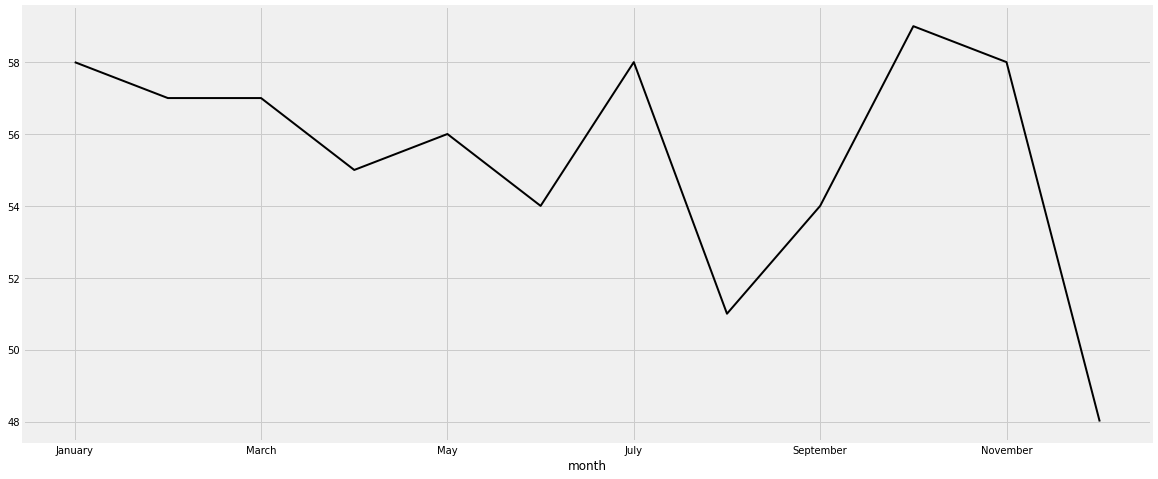

In [126]:
switch_index(bristol_2018_df, 'month')['total_carriageway_flow'].plot(style="-k", figsize=(18,8),
                                        linewidth=2, label=' week in 2019');


`Note`

- October had the highest peak.
- The lowest peak was in august.


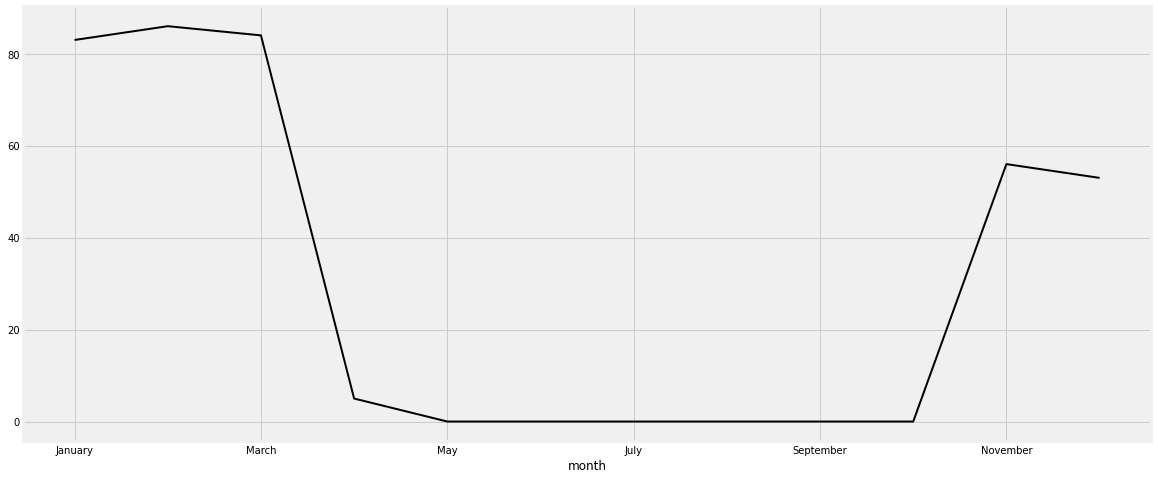

In [127]:
switch_index(bristol_2021_df, 'month')['total_carriageway_flow'].plot(style="-k", figsize=(18,8),
                                        linewidth=2, label=' week in 2019');


`Note`

- February had the highest peak.
- The lowest peak was from march to October.


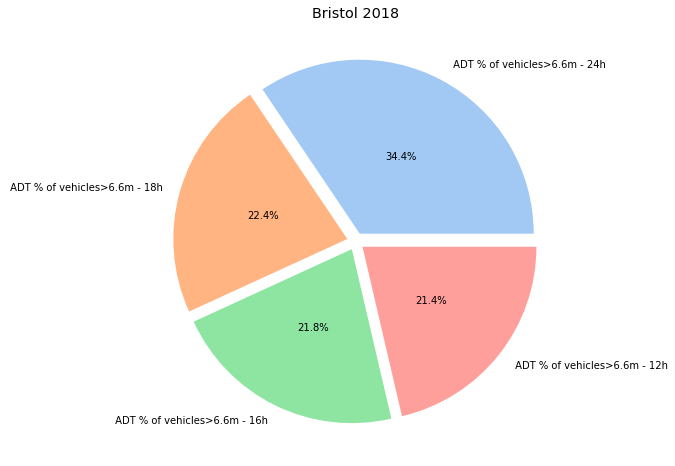

In [128]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
data = bristol_2018_df[daily_adt_cols].sum()
labels = data.keys()

plt.figure(figsize=(18,8))
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5,colors = colors)
plt.title('Bristol 2018')

plt.show();



`Notes`

- The pie chart depicts the proportions of vehicle types recorded daily by average daily traffic. 
- The highest proportion is ADT % of vehicles>6.6m in 24h, followed by ADT % of vehicles >6.6m at the 18th hour.
- The proportions of  ADT % of vehicles>6.6 at the 16th hour and ADT % of vehicles >6.6m at 12h are roughly equal.

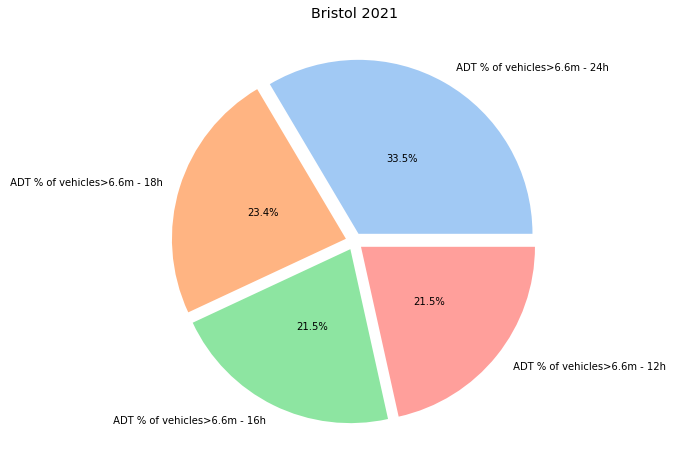

In [129]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
data = bristol_2021_df[daily_adt_cols].sum()
labels = data.keys()

plt.figure(figsize=(18,8))
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5,colors = colors)
plt.title('Bristol 2021')
plt.show();



`Notes`

- The pie chart depicts the proportions of vehicle types recorded daily by average daily traffic. The highest proportion is ADT % of vehicles>6.6m in 24h, followed by ADT % of vehicles >6.6m at the 18th hour. The proportions of  ADT % of vehicles>6.6 at the 16th hour and ADT % of vehicles >6.6m at 12h are roughly equal.

Analysis 2

Weekly Prices time series (from 2003)									
ULSP = Ultra low sulphur unleaded petrol									
ULSD = Ultra low sulphur diesel									
Duty rates over time can be found in the duty rates over time table in the methodology tab.   									
Empty cells represent weeks where differences on previous week or year are not available. 									
An 'r' next to a value indicates it has been revised.									
Freeze panes are turned on. To turn off freeze panes select the 'View' ribbon then 'Freeze Panes' then 'Unfreeze Panes' or use [Alt,W,F]									

In [130]:
fuel_prices_df = pd.read_csv('data/weekly-fuel-prices-formatted.csv')
fuel_prices_df.head()

Date   ULSP:  Pump price (p/litre)  \
0   9/6/2003                         74.59   
1  16/6/2003                         74.47   
2  23/6/2003                         74.42   
3  30/6/2003                         74.35   
4   7/7/2003                         74.28   

   ULSP:  Diff on previous WEEK (p/litre)  \
0                                     NaN   
1                                    -0.1   
2                                     0.0   
3                                    -0.1   
4                                    -0.1   

    ULSP: Diff on previous  YEAR (p/litre)  Duty rate ULSP (p/litre)  \
0                                      NaN                     45.82   
1                                      NaN                     45.82   
2                                      NaN                     45.82   
3                                      NaN                     45.82   
4                                      NaN                     45.82   

   VAT (% rate) ULSP  ULSD: Pump price (p/litre)  \
0               17.5                       76.77   
1               17.5                       76.69   
2               17.5                       76.62   
3               17.5                       76.51   
4               17.5                       76.46   

   ULSD: Diff on previous WEEK (p/litre)  \
0                                    NaN   
1                                   -0.1   
2                                   -0.1   
3                                   -0.1   
4                                    0.0   

   ULSD: Diff on previous  YEAR (p/litre)  Duty rate ULSD (p/litre)  \
0                                     NaN                     45.82   
1                                     NaN                     45.82   
2                                     NaN                     45.82   
3                                     NaN                     45.82   
4                                     NaN                     45.82   

   VAT (% rate) ULSD  
0               17.5  
1               17.5  
2               17.5  
3               17.5  
4               17.5

In [131]:
fuel_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     999 non-null    object 
 1    ULSP:  Pump price (p/litre)             999 non-null    float64
 2   ULSP:  Diff on previous WEEK (p/litre)   998 non-null    float64
 3    ULSP: Diff on previous  YEAR (p/litre)  887 non-null    float64
 4   Duty rate ULSP (p/litre)                 999 non-null    float64
 5   VAT (% rate) ULSP                        999 non-null    float64
 6   ULSD: Pump price (p/litre)               999 non-null    float64
 7   ULSD: Diff on previous WEEK (p/litre)    998 non-null    float64
 8   ULSD: Diff on previous  YEAR (p/litre)   887 non-null    float64
 9   Duty rate ULSD (p/litre)                 999 non-null    float64
 10  VAT (% rate) ULSD                        999 non-n

In [132]:
fuel_prices_df.columns

Index(['Date', ' ULSP:  Pump price (p/litre)',
       'ULSP:  Diff on previous WEEK (p/litre)',
       ' ULSP: Diff on previous  YEAR (p/litre)', 'Duty rate ULSP (p/litre)',
       'VAT (% rate) ULSP', 'ULSD: Pump price (p/litre)',
       'ULSD: Diff on previous WEEK (p/litre)',
       'ULSD: Diff on previous  YEAR (p/litre)', 'Duty rate ULSD (p/litre)',
       'VAT (% rate) ULSD'],
      dtype='object')

In [133]:
fuel_custom_headers= {
    'Date': 'date',
    ' ULSP:  Pump price (p/litre)': 'pump_price_ulsp',
    'ULSP:  Diff on previous WEEK (p/litre)':'diff_on_previous_week_ulsp',
    ' ULSP: Diff on previous  YEAR (p/litre)':'diff_on_previous_year_ulsp',
    'Duty rate ULSP (p/litre)': 'duty_rate_ulsp',
    'VAT (% rate) ULSP': 'vat_ulsp', 
    
    'ULSD: Pump price (p/litre)':'pump_price_ulsd',
       'ULSD: Diff on previous WEEK (p/litre)': 'diff_on_previous_week_ulsd',
       'ULSD: Diff on previous  YEAR (p/litre)':'diff_on_previous_year_ulsd',
    'Duty rate ULSD (p/litre)':'duty_rate_ulsd',
       'VAT (% rate) ULSD':'vat_ulsd'
    
}

In [134]:
# change header
fuel_prices_df.columns = fuel_custom_headers.values()

In [135]:
# show df
fuel_prices_df.head()

date  pump_price_ulsp  diff_on_previous_week_ulsp  \
0   9/6/2003            74.59                         NaN   
1  16/6/2003            74.47                        -0.1   
2  23/6/2003            74.42                         0.0   
3  30/6/2003            74.35                        -0.1   
4   7/7/2003            74.28                        -0.1   

   diff_on_previous_year_ulsp  duty_rate_ulsp  vat_ulsp  pump_price_ulsd  \
0                         NaN           45.82      17.5            76.77   
1                         NaN           45.82      17.5            76.69   
2                         NaN           45.82      17.5            76.62   
3                         NaN           45.82      17.5            76.51   
4                         NaN           45.82      17.5            76.46   

   diff_on_previous_week_ulsd  diff_on_previous_year_ulsd  duty_rate_ulsd  \
0                         NaN                         NaN           45.82   
1                        -0.1                         NaN           45.82   
2                        -0.1                         NaN           45.82   
3                        -0.1                         NaN           45.82   
4                         0.0                         NaN           45.82   

   vat_ulsd  
0      17.5  
1      17.5  
2      17.5  
3      17.5  
4      17.5

In [136]:
# Shape of training data (num_rows, num_columns)
print(fuel_prices_df.shape)

# Number of missing values in each column 
fuel_prices_df.isna().sum()

(999, 11)


date                            0
pump_price_ulsp                 0
diff_on_previous_week_ulsp      1
diff_on_previous_year_ulsp    112
duty_rate_ulsp                  0
vat_ulsp                        0
pump_price_ulsd                 0
diff_on_previous_week_ulsd      1
diff_on_previous_year_ulsd    112
duty_rate_ulsd                  0
vat_ulsd                        0
dtype: int64

In [137]:
fuel_prices_df.date.unique()

array(['9/6/2003', '16/6/2003', '23/6/2003', '30/6/2003', '7/7/2003',
       '14/7/2003', '21/7/2003', '28/7/2003', '4/8/2003', '11/8/2003',
       '18/8/2003', '26/8/2003', '1/9/2003', '8/9/2003', '15/9/2003',
       '22/9/2003', '29/9/2003', '6/10/2003', '13/10/2003', '20/10/2003',
       '27/10/2003', '3/11/2003', '10/11/2003', '17/11/2003',
       '24/11/2003', '1/12/2003', '8/12/2003', '15/12/2003', '22/12/2003',
       '29/12/2003', '5/1/2004', '12/1/2004', '19/1/2004', '26/1/2004',
       '2/2/2004', '9/2/2004', '16/2/2004', '23/2/2004', '1/3/2004',
       '8/3/2004', '15/3/2004', '22/3/2004', '29/3/2004', '5/4/2004',
       '12/4/2004', '19/4/2004', '26/4/2004', '4/5/2004', '10/5/2004',
       '17/5/2004', '24/5/2004', '31/5/2004', '7/6/2004', '14/6/2004',
       '21/6/2004', '28/6/2004', '5/7/2004', '12/7/2004', '19/7/2004',
       '26/7/2004', '2/8/2004', '9/8/2004', '16/8/2004', '23/8/2004',
       '31/8/2004', '6/9/2004', '13/9/2004', '20/9/2004', '27/9/2004',
       '4/10/

In [138]:
fuel_prices_df.date

0       9/6/2003
1      16/6/2003
2      23/6/2003
3      30/6/2003
4       7/7/2003
         ...    
994    27/6/2022
995     4/7/2022
996    11/7/2022
997    18/7/2022
998    25/7/2022
Name: date, Length: 999, dtype: object

In [139]:
# group 2019 and 2020 fuel prices
fuel_prices_2019 = fuel_prices_df.query("date.str.contains('2019')")
fuel_prices_2020 = fuel_prices_df.query("date.str.contains('2020')")

fuel_prices_2019_2020_df = pd.concat([fuel_prices_2019, fuel_prices_2020],)

fuel_prices_2019_2020_df

date  pump_price_ulsp  diff_on_previous_week_ulsp  \
813    7/1/2019           120.27                         0.1   
814   14/1/2019           119.53                        -0.7   
815   21/1/2019           119.12                        -0.4   
816   28/1/2019           119.29                         0.2   
817    4/2/2019           119.13                        -0.2   
..          ...              ...                         ...   
912  30/11/2020           112.61                         0.2   
913   7/12/2020           113.17                         0.6   
914  14/12/2020           113.82                         0.7   
915  21/12/2020           114.43                         0.6   
916  28/12/2020           114.91                         0.5   

     diff_on_previous_year_ulsp  duty_rate_ulsp  vat_ulsp  pump_price_ulsd  \
813                        -0.2           57.95      20.0           130.33   
814                        -1.4           57.95      20.0           129.47   
815                        -2.4           57.95      20.0           128.92   
816                        -2.4           57.95      20.0           129.10   
817                        -2.6           57.95      20.0           129.13   
..                          ...             ...       ...              ...   
912                       -12.2           57.95      20.0           117.41   
913                       -11.6           57.95      20.0           117.99   
914                       -10.5           57.95      20.0           118.57   
915                        -9.7           57.95      20.0           119.17   
916                       -10.1           57.95      20.0           119.65   

     diff_on_previous_week_ulsd  diff_on_previous_year_ulsd  duty_rate_ulsd  \
813                         0.1                         6.4           57.95   
814                        -0.9                         4.9           57.95   
815                        -0.5                         3.9           57.95   
816                         0.2                         3.8           57.95   
817                         0.0                         3.8           57.95   
..                          ...                         ...             ...   
912                         0.3                       -12.4           57.95   
913                         0.6                       -11.8           57.95   
914                         0.6                       -11.0           57.95   
915                         0.6                       -10.6           57.95   
916                         0.5                       -10.9           57.95   

     vat_ulsd  
813      20.0  
814      20.0  
815      20.0  
816      20.0  
817      20.0  
..        ...  
912      20.0  
913      20.0  
914      20.0  
915      20.0  
916      20.0  

[104 rows x 11 columns]

In [140]:
fuel_prices_2019_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 813 to 916
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        104 non-null    object 
 1   pump_price_ulsp             104 non-null    float64
 2   diff_on_previous_week_ulsp  104 non-null    float64
 3   diff_on_previous_year_ulsp  104 non-null    float64
 4   duty_rate_ulsp              104 non-null    float64
 5   vat_ulsp                    104 non-null    float64
 6   pump_price_ulsd             104 non-null    float64
 7   diff_on_previous_week_ulsd  104 non-null    float64
 8   diff_on_previous_year_ulsd  104 non-null    float64
 9   duty_rate_ulsd              104 non-null    float64
 10  vat_ulsd                    104 non-null    float64
dtypes: float64(10), object(1)
memory usage: 9.8+ KB


In [141]:
# Shape of training data (num_rows, num_columns)
print(fuel_prices_2019_2020_df.shape)

# Number of missing values in each column 
fuel_prices_2019_2020_df.isna().sum()

(104, 11)


date                          0
pump_price_ulsp               0
diff_on_previous_week_ulsp    0
diff_on_previous_year_ulsp    0
duty_rate_ulsp                0
vat_ulsp                      0
pump_price_ulsd               0
diff_on_previous_week_ulsd    0
diff_on_previous_year_ulsd    0
duty_rate_ulsd                0
vat_ulsd                      0
dtype: int64

There are no mission values in any of the columns.



In [142]:
# format date
fuel_prices_2019_2020_df.head()

date  pump_price_ulsp  diff_on_previous_week_ulsp  \
813   7/1/2019           120.27                         0.1   
814  14/1/2019           119.53                        -0.7   
815  21/1/2019           119.12                        -0.4   
816  28/1/2019           119.29                         0.2   
817   4/2/2019           119.13                        -0.2   

     diff_on_previous_year_ulsp  duty_rate_ulsp  vat_ulsp  pump_price_ulsd  \
813                        -0.2           57.95      20.0           130.33   
814                        -1.4           57.95      20.0           129.47   
815                        -2.4           57.95      20.0           128.92   
816                        -2.4           57.95      20.0           129.10   
817                        -2.6           57.95      20.0           129.13   

     diff_on_previous_week_ulsd  diff_on_previous_year_ulsd  duty_rate_ulsd  \
813                         0.1                         6.4           57.95   
814                        -0.9                         4.9           57.95   
815                        -0.5                         3.9           57.95   
816                         0.2                         3.8           57.95   
817                         0.0                         3.8           57.95   

     vat_ulsd  
813      20.0  
814      20.0  
815      20.0  
816      20.0  
817      20.0

In [143]:
def formate_date(date):
    split = date.split('/')
    year = split[-1]
    month = split[1]
    day = split[0]
    
    return '-'.join([year, month, day])

In [144]:
fuel_prices_2019_2020_df['date'] = pd.to_datetime(fuel_prices_2019_2020_df.date.apply(lambda x: formate_date(x)))

In [145]:
fuel_prices_2019_2020_df.set_index('date', inplace=True)

In [146]:
fuel_prices_2019_2020_df.head()

pump_price_ulsp  diff_on_previous_week_ulsp  \
date                                                      
2019-01-07           120.27                         0.1   
2019-01-14           119.53                        -0.7   
2019-01-21           119.12                        -0.4   
2019-01-28           119.29                         0.2   
2019-02-04           119.13                        -0.2   

            diff_on_previous_year_ulsp  duty_rate_ulsp  vat_ulsp  \
date                                                               
2019-01-07                        -0.2           57.95      20.0   
2019-01-14                        -1.4           57.95      20.0   
2019-01-21                        -2.4           57.95      20.0   
2019-01-28                        -2.4           57.95      20.0   
2019-02-04                        -2.6           57.95      20.0   

            pump_price_ulsd  diff_on_previous_week_ulsd  \
date                                                      
2019-01-07           130.33                         0.1   
2019-01-14           129.47                        -0.9   
2019-01-21           128.92                        -0.5   
2019-01-28           129.10                         0.2   
2019-02-04           129.13                         0.0   

            diff_on_previous_year_ulsd  duty_rate_ulsd  vat_ulsd  
date                                                              
2019-01-07                         6.4           57.95      20.0  
2019-01-14                         4.9           57.95      20.0  
2019-01-21                         3.9           57.95      20.0  
2019-01-28                         3.8           57.95      20.0  
2019-02-04                         3.8           57.95      20.0

do for 2019

In [147]:
fuel_prices_2019['date'] = pd.to_datetime(fuel_prices_2019.date.apply(lambda x: formate_date(x)))

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_961/2006128151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_prices_2019['date'] = pd.to_datetime(fuel_prices_2019.date.apply(lambda x: formate_date(x)))


In [148]:
fuel_prices_2019.set_index('date', inplace=True)

do for 2020

In [149]:
fuel_prices_2020['date'] = pd.to_datetime(fuel_prices_2020.date.apply(lambda x: formate_date(x)))

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_961/792349841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_prices_2020['date'] = pd.to_datetime(fuel_prices_2020.date.apply(lambda x: formate_date(x)))


In [150]:
fuel_prices_2020.set_index('date', inplace=True)

Inspect the data

Weekly Prices time series (from 2003)									
ULSP = Ultra low sulphur unleaded petrol									
ULSD = Ultra low sulphur diesel									
Duty rates over time can be found in the duty rates over time table in the methodology tab.   									
Empty cells represent weeks where differences on previous week or year are not available. 									
An 'r' next to a value indicates it has been revised.									
Freeze panes are turned on. To turn off freeze panes select the 'View' ribbon then 'Freeze Panes' then 'Unfreeze Panes' or use [Alt,W,F]									

In [151]:
fuel_prices_2019_2020_df.columns

Index(['pump_price_ulsp', 'diff_on_previous_week_ulsp',
       'diff_on_previous_year_ulsp', 'duty_rate_ulsp', 'vat_ulsp',
       'pump_price_ulsd', 'diff_on_previous_week_ulsd',
       'diff_on_previous_year_ulsd', 'duty_rate_ulsd', 'vat_ulsd'],
      dtype='object')

Data analysis

In [152]:
needed_cols = ["pump_price_ulsp", "pump_price_ulsd","diff_on_previous_week_ulsd","diff_on_previous_week_ulsp"]


<AxesSubplot:>

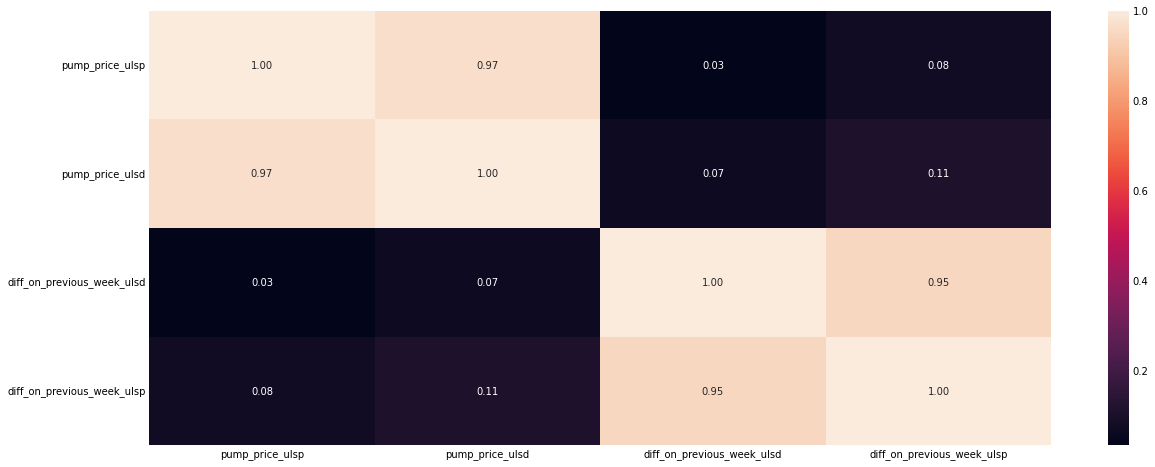

In [153]:
plt.figure(figsize=(18,8))

sns.heatmap(fuel_prices_2019_2020_df[needed_cols].corr(), annot=True, fmt='.2f')

`Notes`

- We could see that pump_price_ulsp correlates with pump_price_ulsd. 
- Also see that diff_on_previous_week_ulsd and diff_on_previous_week_ulsp do not correlate with pump_price_ulsd and pump_price_ulsp.

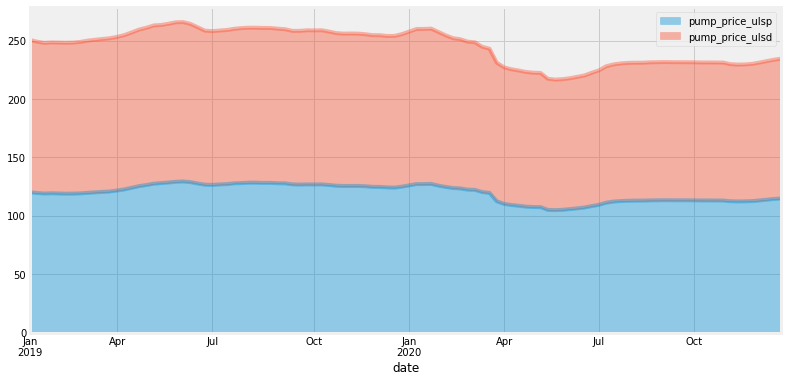

In [154]:
# plot area
fuel_prices_2019_2020_df.plot.area(y=['pump_price_ulsp','pump_price_ulsd'],
                                   alpha=0.4,figsize=(12, 6));

`Notes`

- This graph displays the two-year average fuel prices for petrol and diesel (2019 - 2020).
- Petrol pump prices make up the largest portion of two pump prices.
- Diesel pump prices are less of a factor.
- we can see the steep in 2020 after march.


In [155]:
# needed_cols = ["pump_price_ulsp", "pump_price_ulsd","diff_on_previous_week_ulsd","diff_on_previous_week_ulsp"]
# sns.pairplot(fuel_prices_2019_2020_df[needed_cols], diag_kind="kde",
#             height=4.5, aspect=0.6,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},)

She said we should only use the fuel data which will be plotted against the carriage flow for each month to see the trend for 2019 and 2020. To see when the price dropped or when it increased. For this u can use the monthly data

#### 2019 London

In [156]:
# get fuel prices
fuel_prices_2019_by_month_df = fuel_prices_2019.resample('M').mean()

fuel_prices_2019_by_month_df.head()

pump_price_ulsp  diff_on_previous_week_ulsp  \
date                                                      
2019-01-31         119.5525                      -0.200   
2019-02-28         119.0925                      -0.025   
2019-03-31         120.2825                       0.425   
2019-04-30         124.0420                       1.120   
2019-05-31         128.2800                       0.675   

            diff_on_previous_year_ulsp  duty_rate_ulsp  vat_ulsp  \
date                                                               
2019-01-31                      -1.600           57.95      20.0   
2019-02-28                      -1.750           57.95      20.0   
2019-03-31                       1.075           57.95      20.0   
2019-04-30                       3.320           57.95      20.0   
2019-05-31                       3.025           57.95      20.0   

            pump_price_ulsd  diff_on_previous_week_ulsd  \
date                                                      
2019-01-31         129.4550                      -0.275   
2019-02-28         129.2975                       0.125   
2019-03-31         130.7100                       0.375   
2019-04-30         133.0220                       0.680   
2019-05-31         135.7600                       0.475   

            diff_on_previous_year_ulsd  duty_rate_ulsd  vat_ulsd  
date                                                              
2019-01-31                       4.750           57.95      20.0  
2019-02-28                       4.925           57.95      20.0  
2019-03-31                       7.800           57.95      20.0  
2019-04-30                       8.560           57.95      20.0  
2019-05-31                       6.525           57.95      20.0

In [157]:
# get carriage flow
london_df_2019_month = london_df_2019.set_index('datetime')


In [158]:
# resample to month mean
by_london_df_2019_month = london_df_2019_month.resample('M').mean()


/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_961/1709900919.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


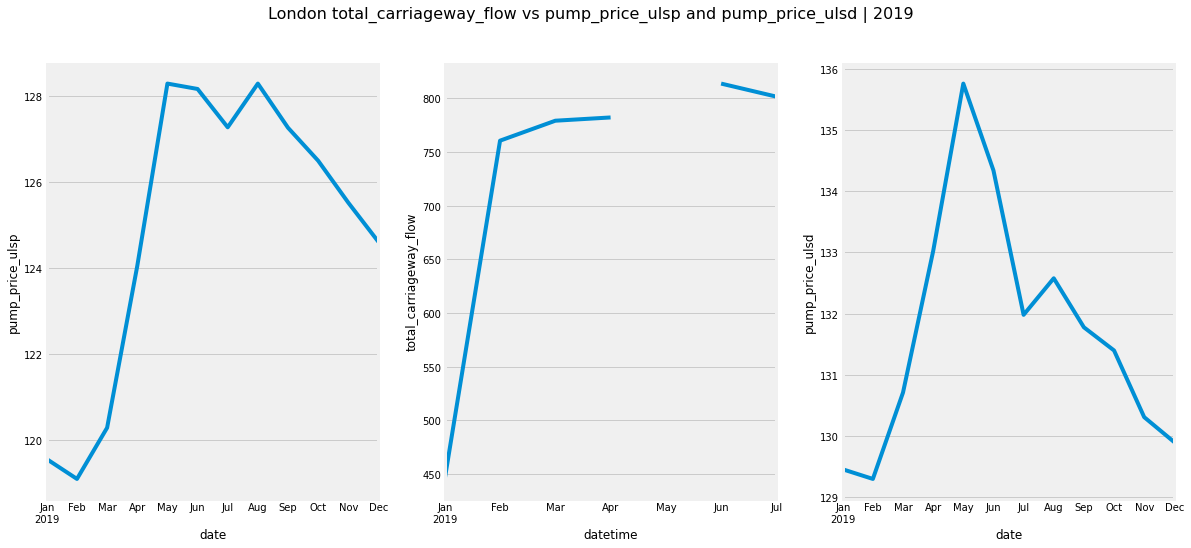

In [159]:

fig, ax =plt.subplots(1,3, figsize=(18, 8))

fig.suptitle('London total_carriageway_flow vs pump_price_ulsp and pump_price_ulsd | 2019', fontsize=16)

fuel_prices_2019_by_month_df['pump_price_ulsp'].plot(ax=ax[0], ylabel='pump_price_ulsp')
by_london_df_2019_month['total_carriageway_flow'].plot(ax=ax[1], ylabel='total_carriageway_flow')
fuel_prices_2019_by_month_df['pump_price_ulsd'].plot(ax=ax[2], ylabel='pump_price_ulsd')


fig.show();

`Notes`

- The highest peaks of both the pump prices were between April and May.
- Pump prices for diesel and petrol in May were high and did not correspond to the volume of traffic on all London's carriageways.

### 2019 Bristol

In [160]:
# get carriage flow
bristol_df_2019_month = bristol_df_2019.set_index('datetime')
bristol_df_2019_month.head()

time day_type_id  total_carriageway_flow  tfv_52m  \
datetime                                                                     
2019-12-01 00:14:00  00:14:00           6                   175.0    129.0   
2019-12-01 00:29:00  00:29:00           6                   140.0    110.0   
2019-12-01 00:44:00  00:44:00           6                   115.0     85.0   
2019-12-01 00:59:00  00:59:00           6                   114.0     89.0   
2019-12-01 01:14:00  01:14:00           6                   102.0     70.0   

                     tfv_521m_66m  tfv_661m_116m  tfv_116m  speed_value  \
datetime                                                                  
2019-12-01 00:14:00          19.0            8.0      19.0        97.04   
2019-12-01 00:29:00          16.0            2.0      12.0        97.67   
2019-12-01 00:44:00          15.0            3.0      12.0        97.65   
2019-12-01 00:59:00          12.0            5.0       8.0        96.23   
2019-12-01 01:14:00          16.0            4.0      12.0        98.95   

                    quality_index network_link_id day_name  day     month  \
datetime                                                                    
2019-12-01 00:14:00            15       102003601   Sunday    1  December   
2019-12-01 00:29:00            15       102003601   Sunday    1  December   
2019-12-01 00:44:00            15       102003601   Sunday    1  December   
2019-12-01 00:59:00            15       102003601   Sunday    1  December   
2019-12-01 01:14:00            15       102003601   Sunday    1  December   

                     year weekday  hour  week    day_time  \
datetime                                                    
2019-12-01 00:14:00  2019  Sunday     0    48  Late Night   
2019-12-01 00:29:00  2019  Sunday     0    48  Late Night   
2019-12-01 00:44:00  2019  Sunday     0    48  Late Night   
2019-12-01 00:59:00  2019  Sunday     0    48  Late Night   
2019-12-01 01:14:00  2019  Sunday     1    48  Late Night   

                              time_daytime  
datetime                                    
2019-12-01 00:14:00  00:14:00 - Late Night  
2019-12-01 00:29:00  00:29:00 - Late Night  
2019-12-01 00:44:00  00:44:00 - Late Night  
2019-12-01 00:59:00  00:59:00 - Late Night  
2019-12-01 01:14:00  01:14:00 - Late Night

In [161]:
# resample to month mean
by_bristol_df_2019_month = bristol_df_2019_month.resample('M').mean()


/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_961/3660261893.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


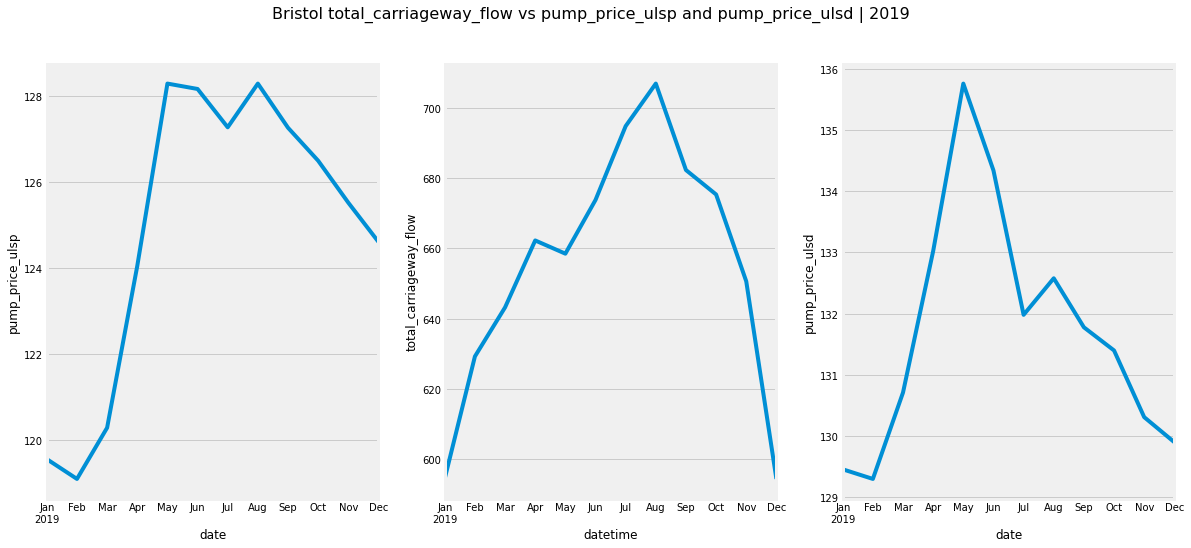

In [162]:

fig, ax =plt.subplots(1,3, figsize=(18, 8))

fig.suptitle('Bristol total_carriageway_flow vs pump_price_ulsp and pump_price_ulsd | 2019', fontsize=16)

fuel_prices_2019_by_month_df['pump_price_ulsp'].plot(ax=ax[0], ylabel='pump_price_ulsp')
by_bristol_df_2019_month['total_carriageway_flow'].plot(ax=ax[1], ylabel='total_carriageway_flow')
fuel_prices_2019_by_month_df['pump_price_ulsd'].plot(ax=ax[2], ylabel='pump_price_ulsd')


fig.show()

`Notes`

- The pump price of disel is higher compared to that of petrol.
- The highest peaks of both the pump prices were between April and May.
- Pump prices for diesel and gasoline in May were high and did not correspond to the total volume of traffic on Bristol's carriageways. because the overall carriageway flow increased in August after declining in May.

### 2020

2020 London

In [163]:
# get fuel prices
# fuel_prices_2020_by_month_df = fue.loc['2020-01-31':'2020-12-31'].resample('M').sum()
fuel_prices_2020_by_month_df = fuel_prices_2020.resample('M').mean()

fuel_prices_2020_by_month_df.head()

pump_price_ulsp  diff_on_previous_week_ulsp  \
date                                                      
2020-01-31         126.9425                        0.60   
2020-02-29         124.4575                       -0.95   
2020-03-31         119.4180                       -2.20   
2020-04-30         109.0025                       -1.15   
2020-05-31         106.2425                       -0.75   

            diff_on_previous_year_ulsp  duty_rate_ulsp  vat_ulsp  \
date                                                               
2020-01-31                       7.375           57.95      20.0   
2020-02-29                       5.350           57.95      20.0   
2020-03-31                      -1.160           57.95      20.0   
2020-04-30                     -15.625           57.95      20.0   
2020-05-31                     -22.025           57.95      20.0   

            pump_price_ulsd  diff_on_previous_week_ulsd  \
date                                                      
2020-01-31         132.4675                       0.575   
2020-02-29         129.2625                      -1.300   
2020-03-31         123.8480                      -1.840   
2020-04-30         115.9825                      -0.850   
2020-05-31         113.4225                      -0.875   

            diff_on_previous_year_ulsd  duty_rate_ulsd  vat_ulsd  
date                                                              
2020-01-31                       3.000           57.95      20.0  
2020-02-29                      -0.050           57.95      20.0  
2020-03-31                      -7.000           57.95      20.0  
2020-04-30                     -17.450           57.95      20.0  
2020-05-31                     -22.325           57.95      20.0

In [164]:
# get carriage flow
london_df_2020_month = london_df_2020.set_index('datetime')


In [165]:
# resample to month mean
by_london_df_2020_month = london_df_2020_month.resample('M').mean()


/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_961/3052734301.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


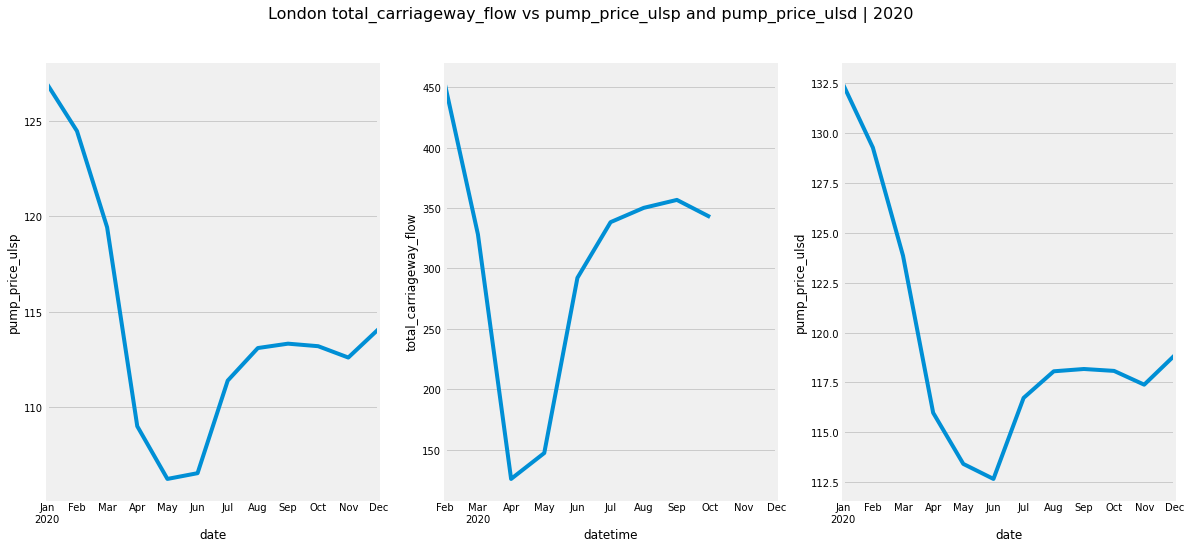

In [166]:
fig, ax =plt.subplots(1,3, figsize=(18, 8))

fig.suptitle('London total_carriageway_flow vs pump_price_ulsp and pump_price_ulsd | 2020', fontsize=16)

fuel_prices_2020_by_month_df['pump_price_ulsp'].plot(ax=ax[0], ylabel='pump_price_ulsp')
by_london_df_2020_month['total_carriageway_flow'].plot(ax=ax[1], ylabel='total_carriageway_flow')
fuel_prices_2020_by_month_df['pump_price_ulsd'].plot(ax=ax[2], ylabel='pump_price_ulsd')

fig.show()

`Notes`

- After February, both diesel and petrol prices at the pump decreased. Furthermore, it is related to the overall carriageway flow.
- After the Covid restrictions were lifted in July, both pump prices reached their highest peaks. And it is related to the entire carriageway, as we can see.

#### 2020 Bristol

In [167]:
# get carriage flow
bristol_df_2020_month = bristol_df_2020.set_index('datetime')
bristol_df_2020_month.head()

time day_type_id  total_carriageway_flow  tfv_52m  \
datetime                                                                     
2020-08-01 00:14:00  00:14:00          11                    92.0     52.0   
2020-08-01 00:29:00  00:29:00          11                   101.0     59.0   
2020-08-01 00:44:00  00:44:00          11                   115.0     71.0   
2020-08-01 00:59:00  00:59:00          11                    91.0     53.0   
2020-08-01 01:14:00  01:14:00           5                    76.0     41.0   

                     tfv_521m_66m  tfv_661m_116m  tfv_116m  speed_value  \
datetime                                                                  
2020-08-01 00:14:00          12.0            4.0      24.0        96.69   
2020-08-01 00:29:00          13.0            4.0      25.0        95.58   
2020-08-01 00:44:00          15.0            8.0      21.0        96.92   
2020-08-01 00:59:00           8.0           11.0      19.0        94.19   
2020-08-01 01:14:00           8.0            2.0      25.0        94.90   

                    quality_index network_link_id  day_name  day   month  \
datetime                                                                   
2020-08-01 00:14:00            15       102003601  Saturday    1  August   
2020-08-01 00:29:00            15       102003601  Saturday    1  August   
2020-08-01 00:44:00            15       102003601  Saturday    1  August   
2020-08-01 00:59:00            15       102003601  Saturday    1  August   
2020-08-01 01:14:00            15       102003601  Saturday    1  August   

                     year   weekday  hour  week    day_time  \
datetime                                                      
2020-08-01 00:14:00  2020  Saturday     0    31  Late Night   
2020-08-01 00:29:00  2020  Saturday     0    31  Late Night   
2020-08-01 00:44:00  2020  Saturday     0    31  Late Night   
2020-08-01 00:59:00  2020  Saturday     0    31  Late Night   
2020-08-01 01:14:00  2020  Saturday     1    31  Late Night   

                              time_daytime  
datetime                                    
2020-08-01 00:14:00  00:14:00 - Late Night  
2020-08-01 00:29:00  00:29:00 - Late Night  
2020-08-01 00:44:00  00:44:00 - Late Night  
2020-08-01 00:59:00  00:59:00 - Late Night  
2020-08-01 01:14:00  01:14:00 - Late Night

In [168]:
# resample to month mean
by_bristol_df_2020_month = bristol_df_2020_month.resample('M').mean()


/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_961/1222935089.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


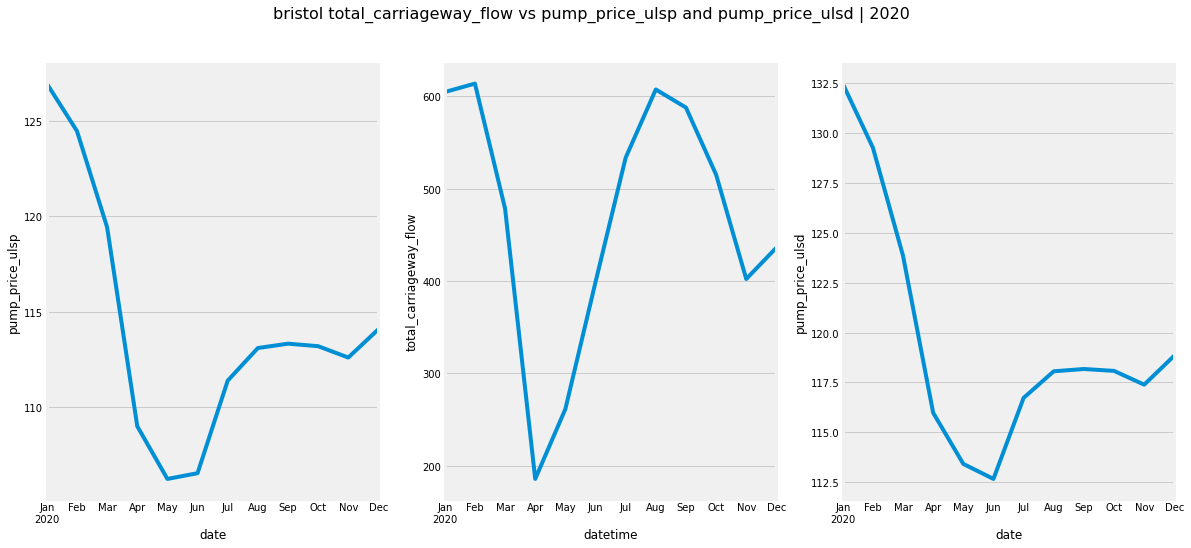

In [169]:
# plot graph

fig, ax =plt.subplots(1,3, figsize=(18, 8))

fig.suptitle('bristol total_carriageway_flow vs pump_price_ulsp and pump_price_ulsd | 2020', fontsize=16)

fuel_prices_2020_by_month_df['pump_price_ulsp'].plot(ax=ax[0], ylabel='pump_price_ulsp')
by_bristol_df_2020_month['total_carriageway_flow'].plot(ax=ax[1], ylabel='total_carriageway_flow')
fuel_prices_2020_by_month_df['pump_price_ulsd'].plot(ax=ax[2], ylabel='pump_price_ulsd')


fig.show()

`Notes`

- After February, both petrol and diesel prices at the pump decreased. Furthermore, it is related to the overall carriageway flow.
- We can see a sharp decline in April, which tells us that everyone was instructed to stay at home during that time.
- After the Covid restrictions were lifted in June, both pump prices reached their highest peaks. And it is related to the carriageway flow, as we can see.

We have also been told to do a chi square test to see if there is a difference in average daily count in 2019 and 2020for London and Bristol. You can pick the lock down period for this.

## The chi-test

Aim of this is to perform a chi-square test to check whether two variables are independent or not.

We would be looking at indepedence testing for these two scenarios:

total carriageway flow and covid impact

If there is a different impact caused by total carriageway flow  and covid.

In [198]:
from scipy.stats import chisquare, chi2_contingency, chi2


Aim of this is to perform a chi-square test to check whether bristol and london total carriage flow in 2019 are independent or not.

get the months where covid started.

The first lockdown was implemented across the UK in January 2020 and ended on July 19.

But we are interested on when it got intense, thus from april to july.

In [579]:
covid_months_london_df = london_df.set_index('month').loc[['April','May','June','July']]
# covid_months_london_df = london_df.set_index('month').loc[['January','February', 'March','April','May','June','July']]
# covid_months_london_df = london_df.set_index('month').loc[['March','April','May','June','July']]
covid_months_london_df.head(1)

time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
month                                                                        
April  00:14:00           6                   167.0    148.0          10.0   

       tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
month                                                                       
April            4.0       5.0        94.17            15       199128901   

                 datetime day_name  day  year weekday  hour  week    day_time  \
month                                                                           
April 2019-04-01 00:14:00   Monday    1  2019  Monday     0    14  Late Night   

                time_daytime  
month                         
April  00:14:00 - Late Night

In [580]:
covid_months_bristol_df = bristol_df.set_index('month').loc[[ 'April','May','June','July']]
# covid_months_bristol_df = bristol_df.set_index('month').loc[['January','February','March', 'April','May','June','July']]
# covid_months_bristol_df = bristol_df.set_index('month').loc[['March', 'April','May','June','July']]
covid_months_bristol_df.head(1)

time day_type_id  total_carriageway_flow  tfv_52m  tfv_521m_66m  \
month                                                                        
April  00:14:00           6                   129.0     82.0          15.0   

       tfv_661m_116m  tfv_116m  speed_value quality_index network_link_id  \
month                                                                       
April            6.0      26.0        98.73            15       102003601   

                 datetime day_name  day  year weekday  hour  week    day_time  \
month                                                                           
April 2019-04-01 00:14:00   Monday    1  2019  Monday     0    14  Late Night   

                time_daytime  
month                         
April  00:14:00 - Late Night

In [581]:
london_df.month.unique()

array(['February', 'April', 'June', 'July', 'March', 'January', 'May',
       'December', 'October', 'August', 'September'], dtype=object)

In [582]:
# get dataframe for london years
london_2019_df = covid_months_london_df.query("year == 2019")
london_2020_df = covid_months_london_df.query("year == 2020")

In [583]:
# get dataframe for bristol years
bristol_2019_df = covid_months_bristol_df.query("year == 2019")
bristol_2020_df = covid_months_bristol_df.query("year == 2020")

get the daily 

In [584]:
def do_chi_test(table, H0=None, Ha=None, prob=0.95):

    stat, p, dof, expected = chi2_contingency(table)    
    
    print('dof=%d' % dof)
    print(expected)
    print()
    
    # interpret test-statistic
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    print()
    
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        
    # interpret p-value
    alpha = 1.0 - prob
    print()
    print('significance=%.3f, p=%.3f' % (alpha, p))
    print()
    
    # Use the p-value to come to a conclusion.
    if p > alpha:
        print(f"{p} > {alpha}. Is Independent.\nWe fail to reject Null Hypothesis for {H0}. \n\n[Conclusion] There is insufficient evidence to conclude that there is a significant linear relationship between `{H0} and {Ha}`, because the correlation coefficient is NOT significantly different from zero.")
    else:
        print(f"{p} <= {alpha}. Is Dependent.\nWe reject Null Hypothesis for {Ha}.  \n\n[Conclusion] There is sufficient evidence to conclude that there is a significant linear relationship between `{H0} and {Ha}`, because the correlation coefficient is significantly different from zero. If the p-value is NOT less than the significance level (α = 0.05)")


#     if p <= alpha:
#         print('Dependent (reject H0)')
#     else:
#         print('Independent (fail to reject H0)')


In [585]:
# get daily count
london_table_2019 = london_2019_df.weekday.value_counts()
london_table_2019

Tuesday      1340
Monday       1252
Saturday     1248
Sunday       1248
Wednesday    1239
Friday       1150
Thursday     1147
Name: weekday, dtype: int64

In [586]:
# get daily count
london_table_2020 = london_2020_df.weekday.value_counts()
london_table_2020

Thursday     1589
Wednesday    1526
Friday       1450
Sunday       1319
Saturday     1315
Monday       1309
Tuesday      1303
Name: weekday, dtype: int64

In [587]:
london_table = [london_table_2019, london_table_2020]

In [588]:
# perform chi test
do_chi_test(london_table, 'london 2019', 'london 2020')

dof=6
[[1370.20320043 1299.564524   1262.14005967 1200.85749932 1194.77602387
  1150.33447247 1146.12422023]
 [1558.79679957 1478.435476   1435.85994033 1366.14250068 1359.22397613
  1308.66552753 1303.87577977]]

probability=0.950, critical=12.592, stat=11.374

Independent (fail to reject H0)

significance=0.050, p=0.077

0.07746918344189423 > 0.050000000000000044. Is Independent.
We fail to reject Null Hypothesis for london 2019. 

[Conclusion] There is insufficient evidence to conclude that there is a significant linear relationship between `london 2019 and london 2020`, because the correlation coefficient is NOT significantly different from zero.


For bristol

In [589]:
bristol_table_2019 = bristol_2019_df.weekday.value_counts()
bristol_table_2019

Tuesday      1724
Wednesday    1685
Monday       1636
Saturday     1632
Friday       1630
Sunday       1625
Thursday     1610
Name: weekday, dtype: int64

In [590]:
bristol_table_2020 = bristol_2020_df.weekday.value_counts()
bristol_table_2020

Wednesday    1728
Friday       1726
Thursday     1704
Saturday     1632
Sunday       1632
Monday       1630
Tuesday      1626
Name: weekday, dtype: int64

In [591]:
bristol_table = [bristol_table_2019, bristol_table_2020]

In [592]:
# perform chi test
do_chi_test(bristol_table, 'bristol 2019', 'bristol 2020')

dof=6
[[1715.89078381 1695.51085271 1660.21877692 1622.44134367 1621.44720069
  1617.96770026 1608.52334195]
 [1736.10921619 1715.48914729 1679.78122308 1641.55865633 1640.55279931
  1637.03229974 1627.47665805]]

probability=0.950, critical=12.592, stat=1.173

Independent (fail to reject H0)

significance=0.050, p=0.978

0.9781788573589707 > 0.050000000000000044. Is Independent.
We fail to reject Null Hypothesis for bristol 2019. 

[Conclusion] There is insufficient evidence to conclude that there is a significant linear relationship between `bristol 2019 and bristol 2020`, because the correlation coefficient is NOT significantly different from zero.


compare london and bristol 2019

In [593]:
london_bristol_2019_table = [london_table_2019, bristol_table_2019]

In [594]:
# perform chi test
do_chi_test(london_bristol_2019_table, 'london 2019', 'bristol 2019')

dof=6
[[1310.32113458 1256.00952098 1233.34404443 1231.63344243 1226.92928692
  1186.73013984 1179.03243082]
 [1753.67886542 1680.99047902 1650.65595557 1648.36655757 1642.07071308
  1588.26986016 1577.96756918]]

probability=0.950, critical=12.592, stat=5.595

Independent (fail to reject H0)

significance=0.050, p=0.470

0.47000294287455047 > 0.050000000000000044. Is Independent.
We fail to reject Null Hypothesis for london 2019. 

[Conclusion] There is insufficient evidence to conclude that there is a significant linear relationship between `london 2019 and bristol 2019`, because the correlation coefficient is NOT significantly different from zero.


compare london and bristol 2019

In [595]:
london_bristol_2020_table = [london_table_2020,  bristol_table_2020]

In [596]:
# perform chi test
do_chi_test(london_bristol_2020_table, 'london 2020', 'bristol 2020')

dof=6
[[1514.40676625 1484.73042021 1439.98762157 1347.3061101  1345.47987342
  1341.82740007 1337.26180837]
 [1802.59323375 1767.26957979 1714.01237843 1603.6938899  1601.52012658
  1597.17259993 1591.73819163]]

probability=0.950, critical=12.592, stat=14.458

Dependent (reject H0)

significance=0.050, p=0.025

0.024919448795107477 <= 0.050000000000000044. Is Dependent.
We reject Null Hypothesis for bristol 2020.  

[Conclusion] There is sufficient evidence to conclude that there is a significant linear relationship between `london 2020 and bristol 2020`, because the correlation coefficient is significantly different from zero. If the p-value is NOT less than the significance level (α = 0.05)
